In [2]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 MOET CHANDON BELGIAN GRAND PRIX 2025
The Belgian Grand Prix (French: Grand Prix de Belgique; Dutch: Grote Prijs van België; German: Großer Preis von Belgien) is a motor racing event which forms part of the Formula One World Championship. The first national race of Belgium was held in 1925 at the Spa region's race course, an area of the country that had been associated with motor sport since the very early years of racing. To accommodate Grand Prix motor racing, the Circuit de Spa-Francorchamps race course was built in 1921 but until 1924 it was used only for motorcycle racing. After the 1923 success of the new 24 hours of Le Mans in France, the Spa 24 Hours, a similar 24-hour endurance race, was run at the Spa track.

Since its inception, Spa-Francorchamps has been known for its unpredictable weather. At one stage in its history it had rained at the Belgian Grand Prix for twenty years in a row. Frequently drivers confront a part of the course that is clear and bright while another stretch is rainy and slippery.

The Belgian Grand Prix was designated the European Grand Prix six times between 1925 and 1973, when this title was an honorary designation given each year to one Grand Prix race in Europe. It is one of the most popular races on the Formula One calendar, due to the scenic and historical Spa-Francorchamps circuit being a favourite of drivers and fans.
Source: Wikipedia
Analyzed by Franccy del Piero Sambrano Ganoza

## Obtain session information

In [3]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='BEL')

meeting_key  session_key           location                 date_start  \
0         1265         9929  Spa-Francorchamps  2025-07-25T10:30:00+00:00   
1         1265         9930  Spa-Francorchamps  2025-07-25T14:30:00+00:00   
2         1265         9934  Spa-Francorchamps  2025-07-26T10:00:00+00:00   
3         1265         9935  Spa-Francorchamps  2025-07-26T14:00:00+00:00   

                    date_end session_type       session_name  country_key  \
0  2025-07-25T11:30:00+00:00     Practice         Practice 1           16   
1  2025-07-25T15:14:00+00:00   Qualifying  Sprint Qualifying           16   
2  2025-07-26T11:00:00+00:00         Race             Sprint           16   
3  2025-07-26T15:00:00+00:00   Qualifying         Qualifying           16   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          BEL      Belgium            7  Spa-Francorchamps   02:00:00  2025  
1          BEL      Belgium            7  Spa-Francorchamps   02:00:00  2025  
2          BEL      Belgium            7  Spa-Francorchamps   02:00:00  2025  
3          BEL      Belgium            7  Spa-Francorchamps   02:00:00  2025

## Free Practice 1
### Obtain setup

In [23]:
practice = libraryDataF1.obtain_information('laps',session_key=9929)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9929)
drivers = libraryDataF1.obtain_information('drivers',session_key=9929)

In [24]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Red Bull is the fastest on the straights being remarkable in sector 1 and 3. Sauber and Mercedes did the same strategy.

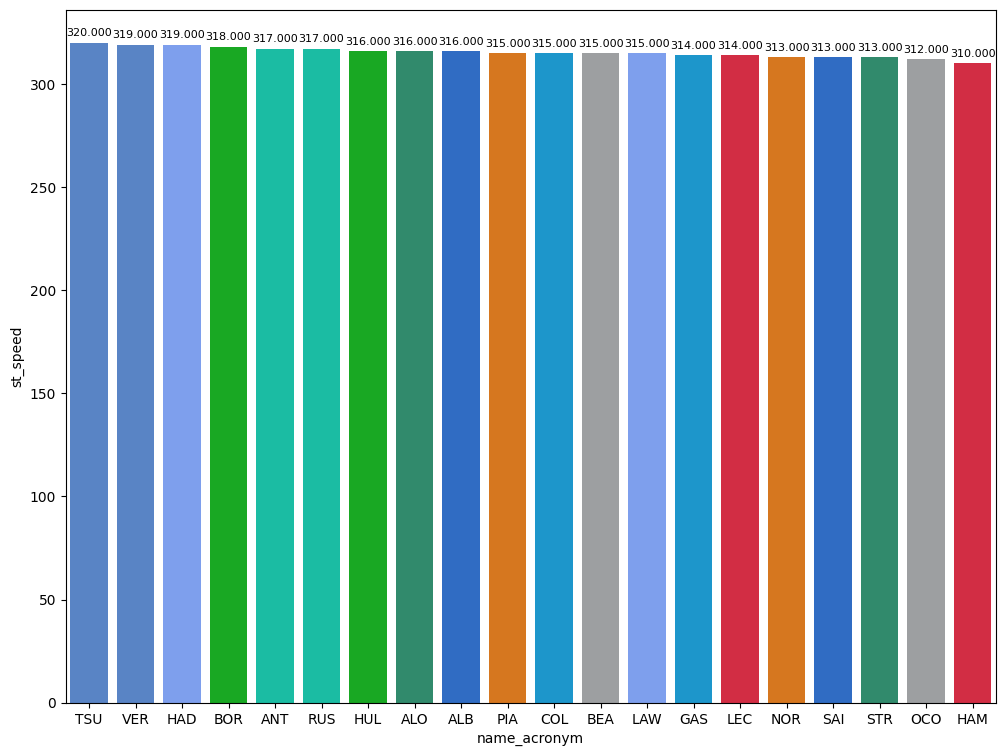

In [25]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

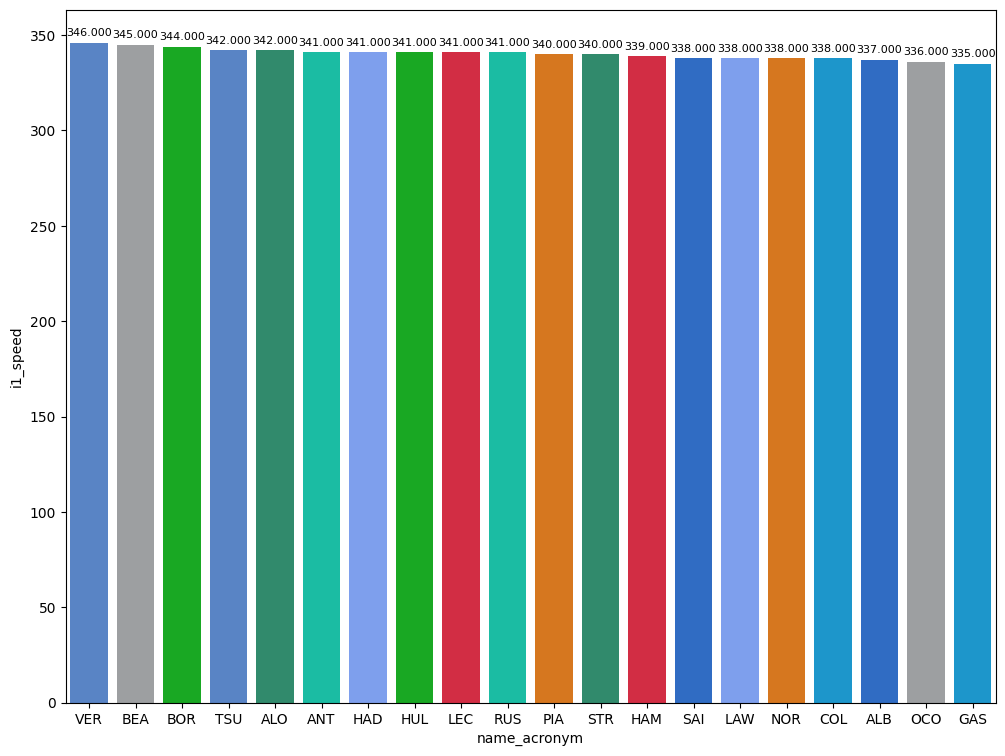

In [26]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

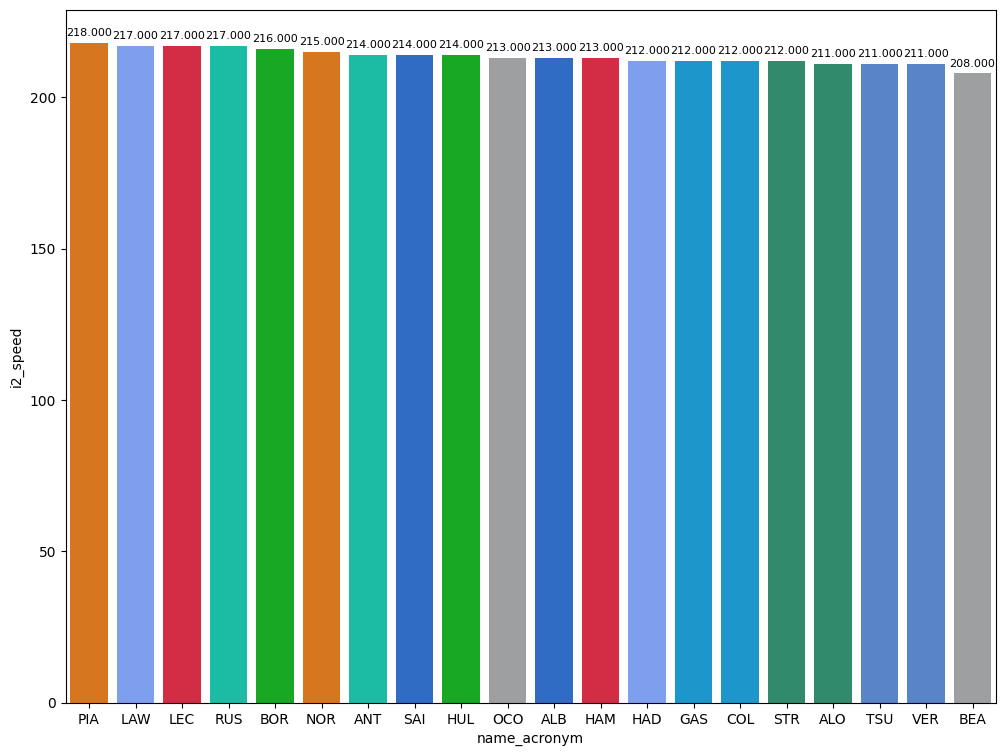

In [27]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [28]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
146  Charles LECLERC     HARD             30.534             45.231   
355   George RUSSELL   MEDIUM             30.038             44.544   
393    Oscar PIASTRI     SOFT             30.207             43.604   

     duration_sector_3  lap_duration  
146             28.383       104.148  
355             28.016       102.598  
393             28.211       102.022

### Deltas
Everyone, except Colapinto, did their fastest lap attemp at the final of the session. BEA had a problem in sector 2 and TSU were unable to improve his fastest attemp.
If it does not rain, McLaren could take advantage of their strong second sector for fighting for pole. Alpine will suffer here due to lack of engine power and entering in Q2 will be very difficult.

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


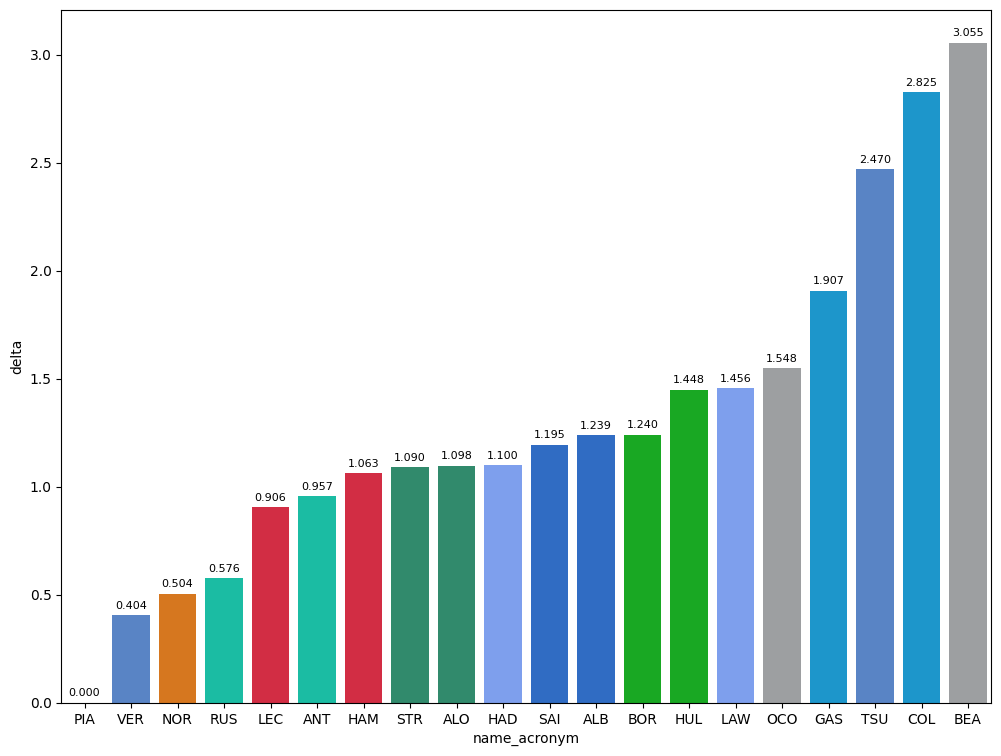

In [30]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
S1: As we watched in Speed Track session, Red Bull is the fastest here. Sauber and Mercedes have to take advantage at maximum this sector because is the strongest for the setup. On the other hand, McLaren and Williams are in the midfield. Setup is crucial because RB with the same engine are the 17th and 19th.
S2: This is the McLaren sector where they dominated. RB and Ferrari stand out in this sector while the teams that standed out in S1 suffer in S2.
S3: This sector is a long straight where teams that standed out in S1 will be in the same situation.

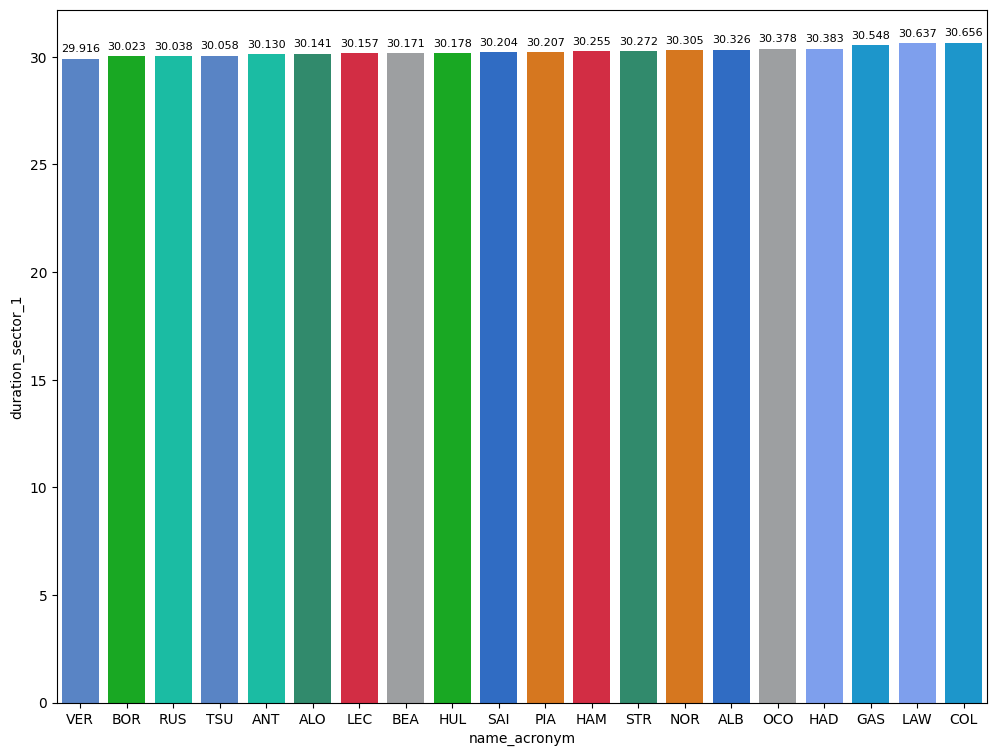

In [31]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

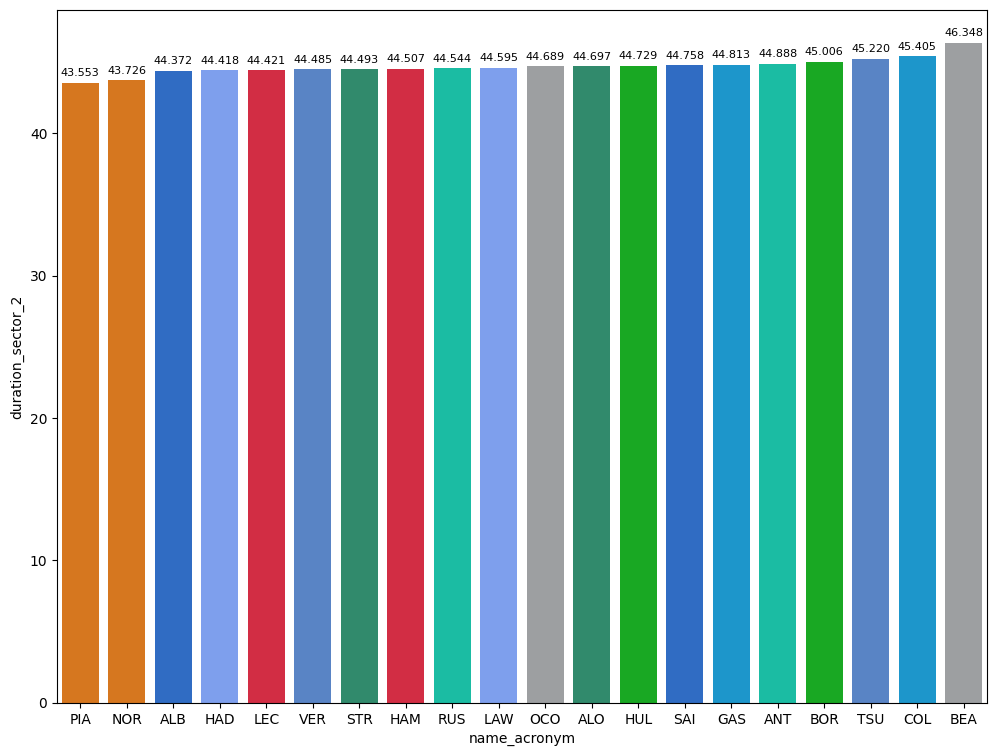

In [32]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

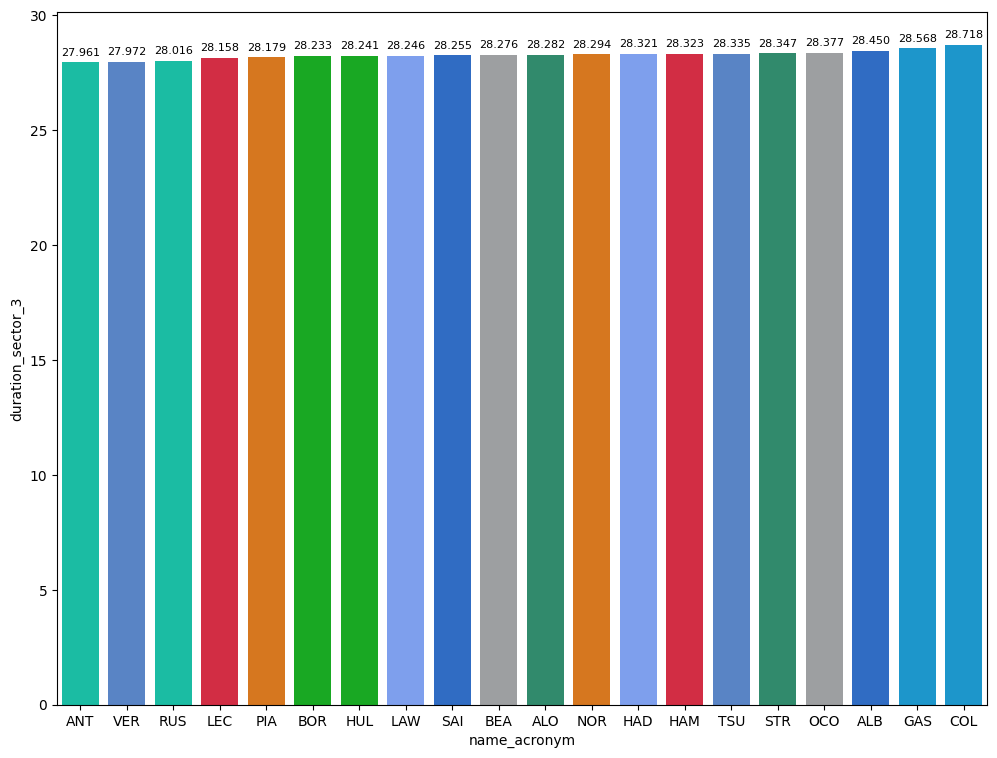

In [33]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [34]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration >108  and lap_duration <=112.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
MEDIUM      108.783643
HARD        109.888304
SOFT        110.058000

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [101]:
qualy_session = list(libraryDataF1.obtain_information('race_control',session_key=9930).query('message.str.contains("GREEN")').date.str.split())
qualy_session


[['2025-07-25T14:30:00+00:00'],
 ['2025-07-25T14:55:00+00:00'],
 ['2025-07-25T15:18:00+00:00']]

In [67]:
libraryDataF1.obtain_information('race_control',session_key=9930).query('message.str.contains("DELETED")')

meeting_key  session_key                       date driver_number  \
2          1265         9930  2025-07-25T14:35:19+00:00          None   
4          1265         9930  2025-07-25T14:36:35+00:00          None   
16         1265         9930  2025-07-25T14:43:33+00:00          None   
38         1265         9930  2025-07-25T15:00:03+00:00          None   

   lap_number category  flag scope  sector  \
2        None    Other  None  None     NaN   
4        None    Other  None  None     NaN   
16       None    Other  None  None     NaN   
38       None    Other  None  None     NaN   

                                              message  
2   CAR 87 (BEA) TIME 1:42.943 DELETED - TRACK LIM...  
4   CAR 12 (ANT) TIME 2:04.851 DELETED - TRACK LIM...  
16  CAR 22 (TSU) TIME 1:42.890 DELETED - TRACK LIM...  
38  CAR 81 (PIA) TIME 1:41.736 DELETED - TRACK LIM...

### Obtain setup

In [64]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9930)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9930)
drivers = libraryDataF1.obtain_information('drivers',session_key=9930)
libraryDataF1.obtain_drivers_colours(drivers)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted were deleted from dataset in order to obtain only the valid laps for the analysis.

In [68]:
laptimes_deleted = [102.943,124.851,102.890,101.736]
driver_number_lap_deleted = [87,12,22,81]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [69]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

The fastest lap  is 100.510 seconds (1.40.510= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (107.54 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [70]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 107.54")

In [71]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
Hamilton spun at the exit of the chicane spoiling some laps. ALB and HUL had good times but due to the yellow flag they were unable to pass to Q2 and ANT had a problem in his fastest lap damaging his tyres.
SQ2 was a madness with both Aston being knocked-out when in FP they showed a good pace. Incredible performance of OCO and GAS entering in SQ3 thanks to hte track improvement.
Max was able to fight versus McLaren being NOR

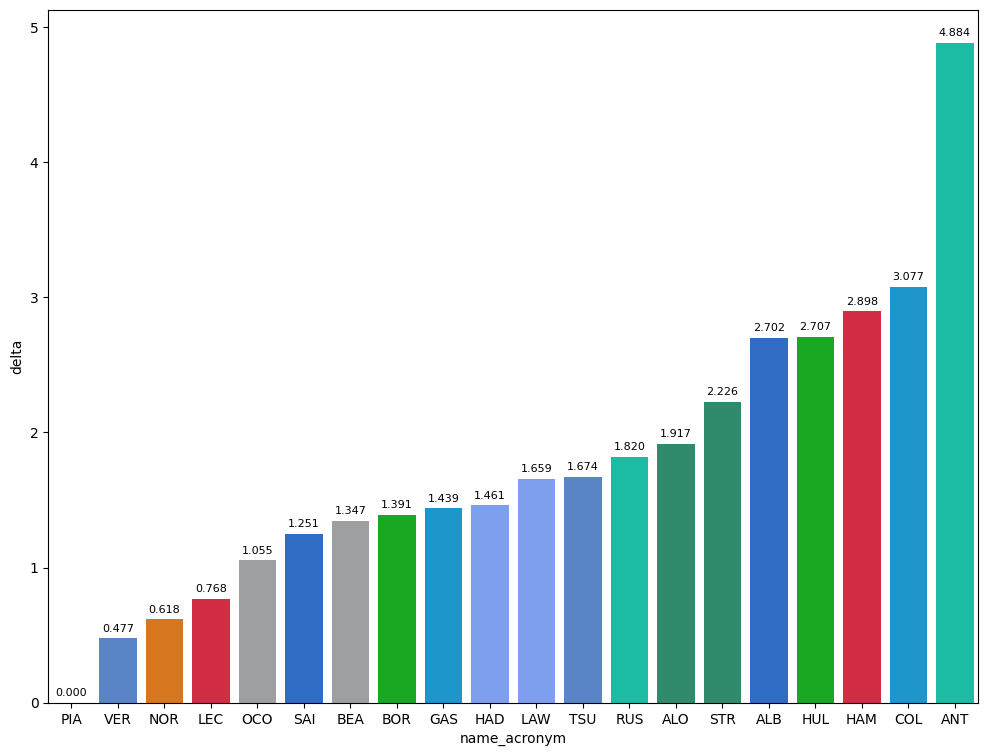

In [72]:
dt = jointables.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

In [81]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [108]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start < '2025-07-25T14:55:00+00:00'"
maximumDateQ2 = "date_start < '2025-07-25T15:18:00+00:00' and date_start >= '2025-07-25T14:55:00+00:00'"
maximumDateQ3 = "date_start > '2025-07-25T15:18:00+00:00'"

### Speed trap
As we watched in FP, Red Bull had a good setup in straights, Aston and Sauber followed the same way. With this setup, you are faster on straights (S1 and S3) but suffer in S2

#### Maximum speed per drivers

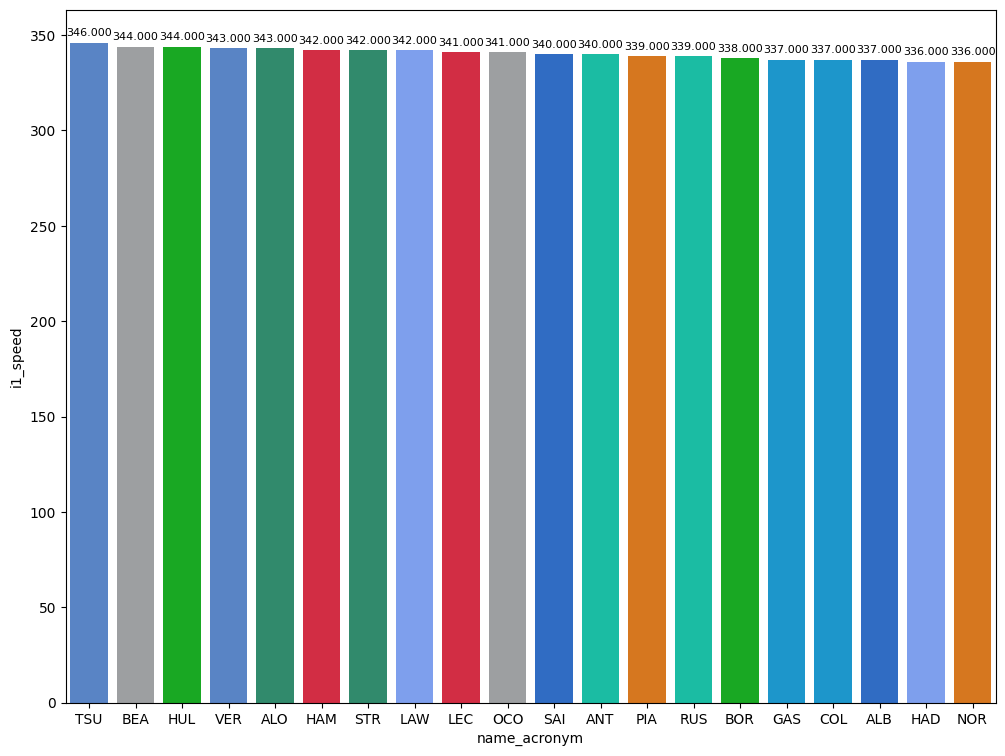

In [86]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

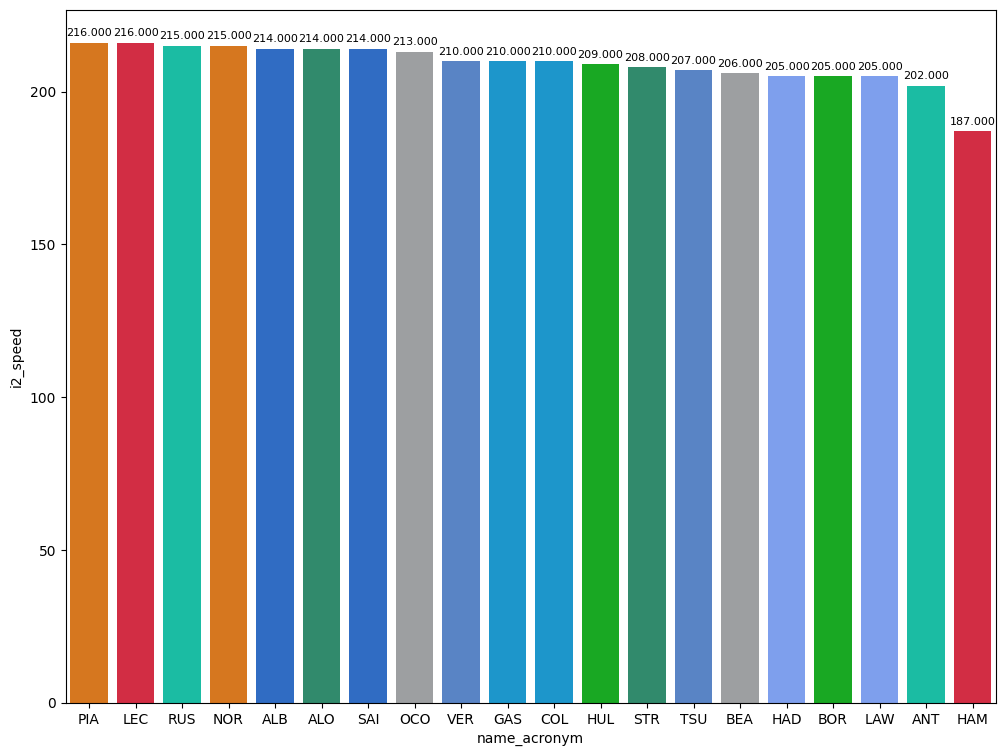

In [87]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

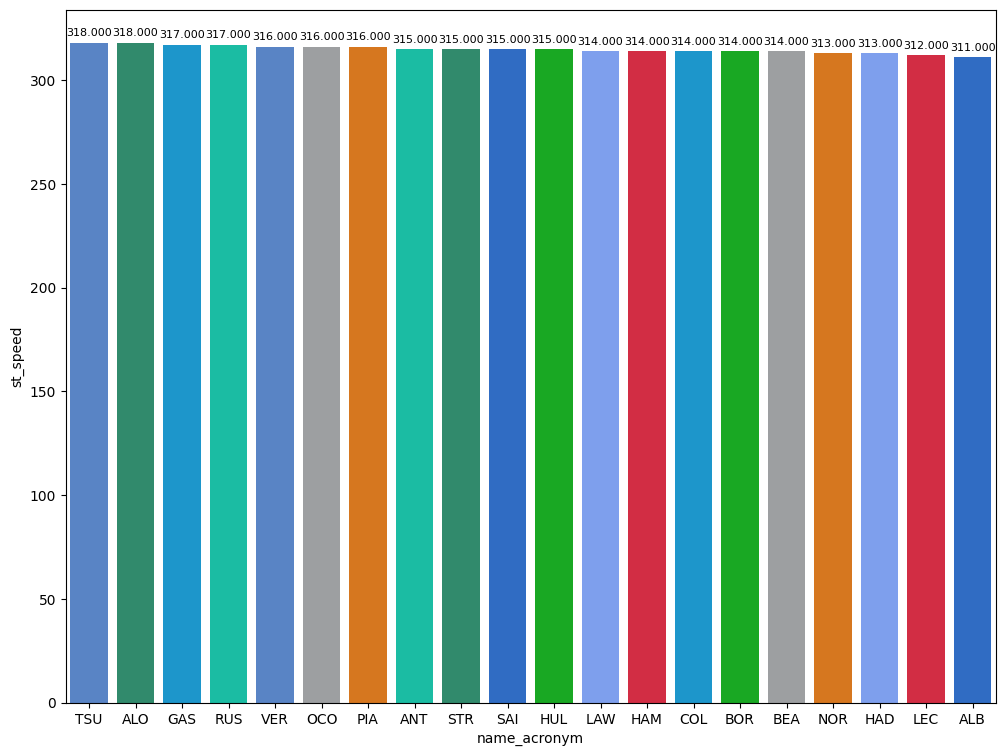

In [88]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Sprint Qualyfing 1

In [109]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Alpine gave Gasly a setup centered on the straights in order to try to compensate lack of power of Reanult engine. This helped him in sector 1 where only Hamilton were faster than Pierre. On the other hand, he suffered a lot in sector 2 being 19th slowest of the session. Thanks to the setup and Hamilton's mistake, he was able to pass to Q2 being the 5th fastest

In [110]:
#Reference
P15 = q1Data[14:15]

In [111]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Pierre GASLY Sector 1:  30.062 Sector 2:  44.908 Sector 3:  28.201


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.

In [112]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             23         0.041                0.258               -0.586   
1             27         0.046                0.028               -0.206   
2             44         0.237               -0.042               -0.343   
3             43         0.416                0.206               -0.153   
4             12         2.223                0.293                1.650   

   difference_sector_3 name_acronym  
0                0.369          ALB  
1                0.224          HUL  
2                0.622          HAM  
3                0.363          COL  
4                0.280          ANT

In [113]:
#libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [114]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              81        -1.402                0.015               -1.367   
1               1        -1.128               -0.036               -1.106   
2               4        -1.103                0.042               -1.162   
3              14        -0.744               -0.019               -0.568   
4              63        -0.521               -0.044               -0.624   
5               6        -0.460                0.260               -0.783   
6              18        -0.435               -0.076               -0.361   
7              16        -0.408                0.062               -0.590   
8              55        -0.395                0.072               -0.677   
9               5        -0.365                0.032               -0.423   
10             31        -0.349               -0.088               -0.196   
11             30        -0.274                0.207               -0.638   
12             22        -0.259               -0.022               -0.234   
13             87        -0.147               -0.040               -0.203   

    difference_sector_3 name_acronym  
0                -0.050          PIA  
1                 0.014          VER  
2                 0.017          NOR  
3                -0.157          ALO  
4                 0.147          RUS  
5                 0.063          HAD  
6                 0.002          STR  
7                 0.120          LEC  
8                 0.210          SAI  
9                 0.026          BOR  
10               -0.065          OCO  
11                0.157          LAW  
12               -0.003          TSU  
13                0.096          BEA

#### Best sector per driver

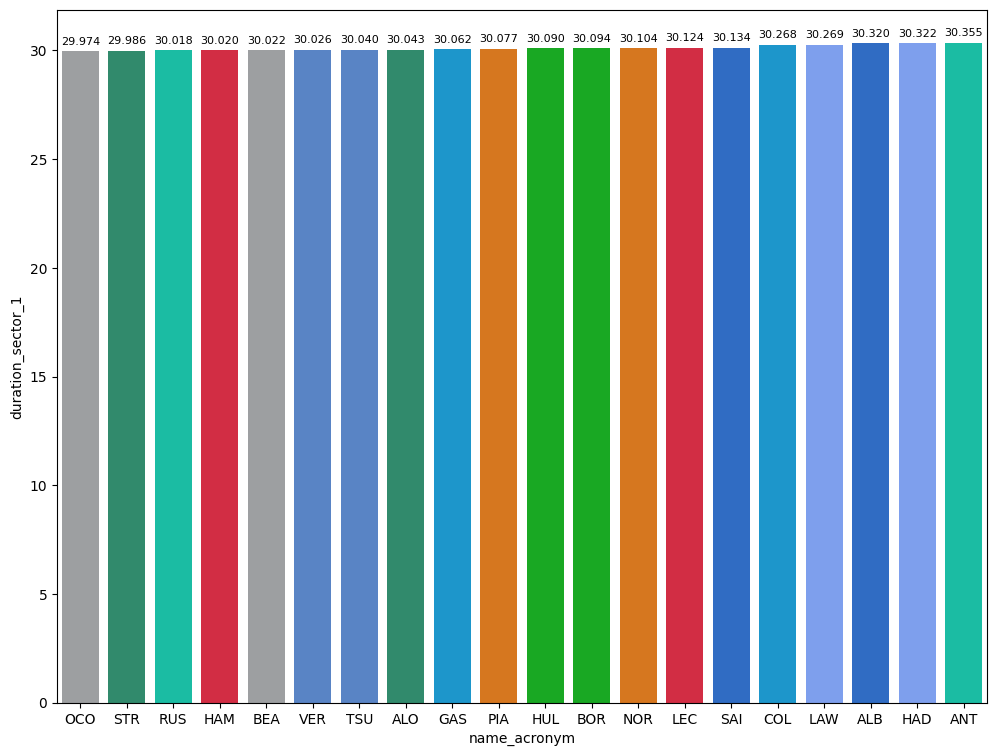

In [115]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

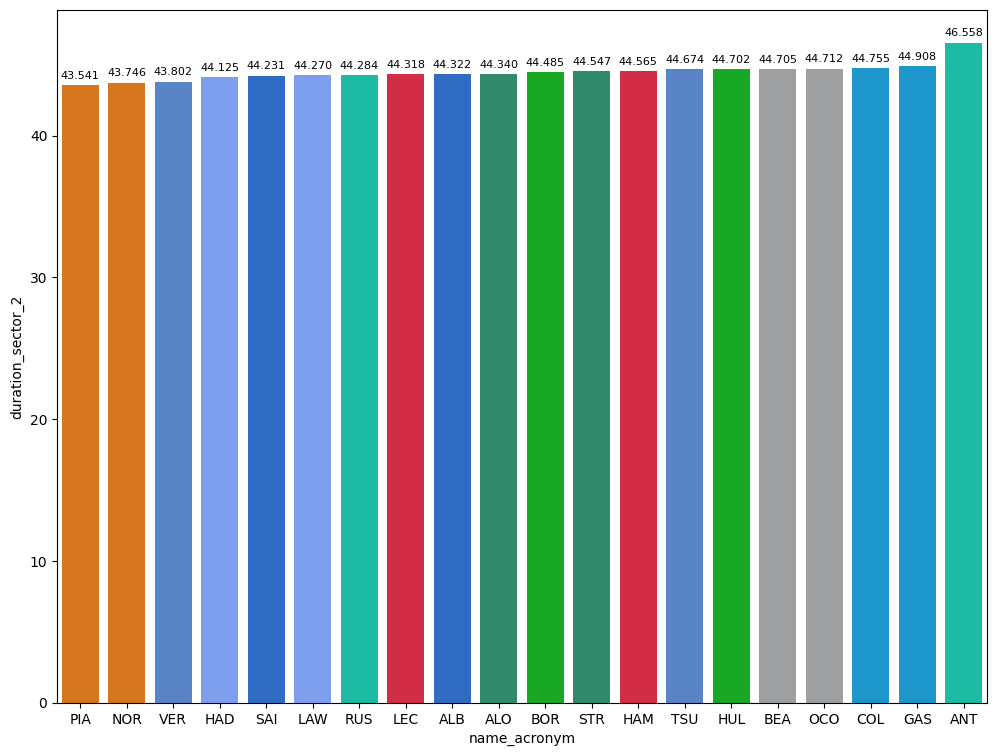

In [116]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

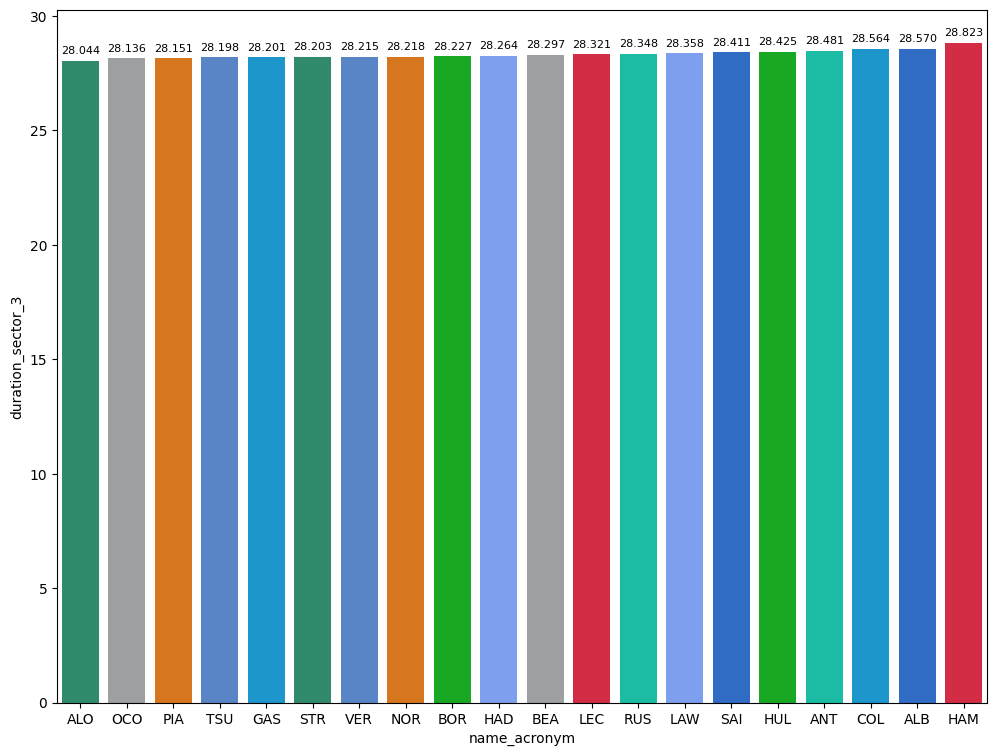

In [117]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [118]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.
Piastri laptime was deleted for tracks limits and this forced him to do a security lap. In this session, his second sector was crucial to pass to Q3. TSU was close to pass but the second sector helps Piastri but in case of LAW, he was going to pass but his sector 1 was 14th slowest and sector being the slowest.

In [119]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  30.076 Sector 2:  43.858 Sector 3:  28.194


In [120]:
#libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

In [121]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             30         0.041                0.166               -0.211   
1             22         0.056               -0.245                0.369   
2             63         0.202                0.090                0.116   
3             14         0.325               -0.163                0.485   
4             18         0.704                0.080                0.613   

   difference_sector_3 name_acronym  
0                0.086          LAW  
1               -0.068          TSU  
2               -0.004          RUS  
3                0.003          ALO  
4                0.011          STR

##### Analysis with the drivers that finished better than the driver at risk


In [135]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4        -0.716               -0.001               -0.637   
1              1        -0.545               -0.203               -0.211   
2             16        -0.342               -0.057               -0.145   
3             31        -0.327               -0.275                0.050   
4              5        -0.227               -0.073               -0.203   
5             10        -0.179               -0.086                0.081   
6             87        -0.109               -0.222                0.185   
7             55        -0.077               -0.082                0.033   
8              6        -0.040                0.207               -0.274   

   difference_sector_3 name_acronym  
0               -0.078          NOR  
1               -0.131          VER  
2               -0.140          LEC  
3               -0.102          OCO  
4                0.049          BOR  
5               -0.174          GAS  
6               -0.072          BEA  
7               -0.028          SAI  
8                0.027          HAD

#### Best sector per driver

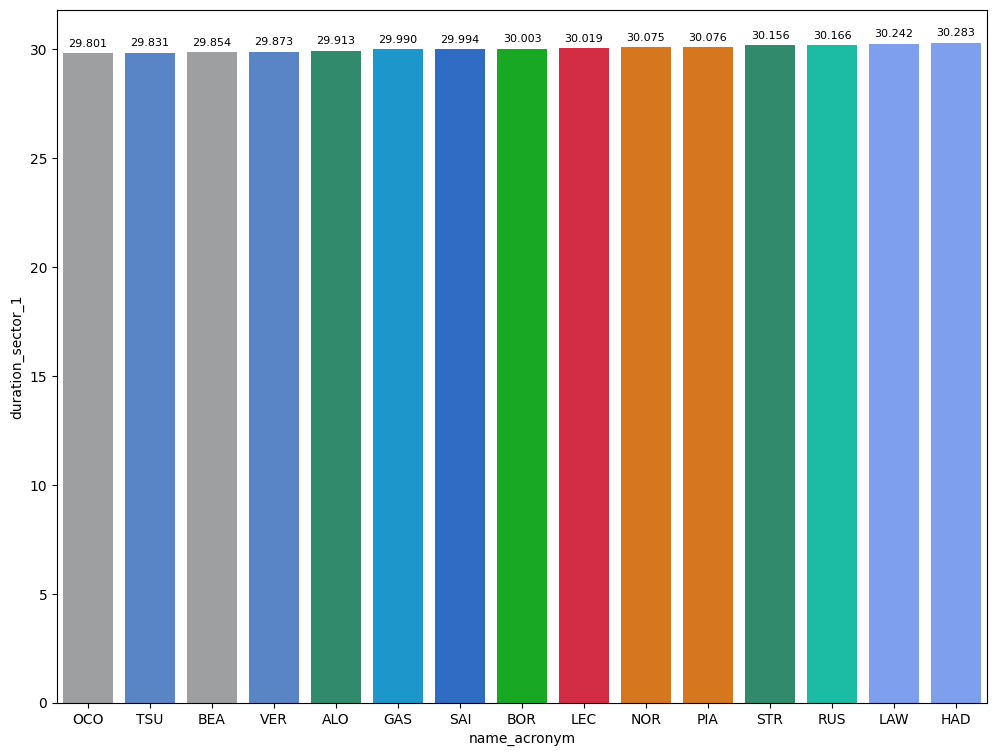

In [122]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

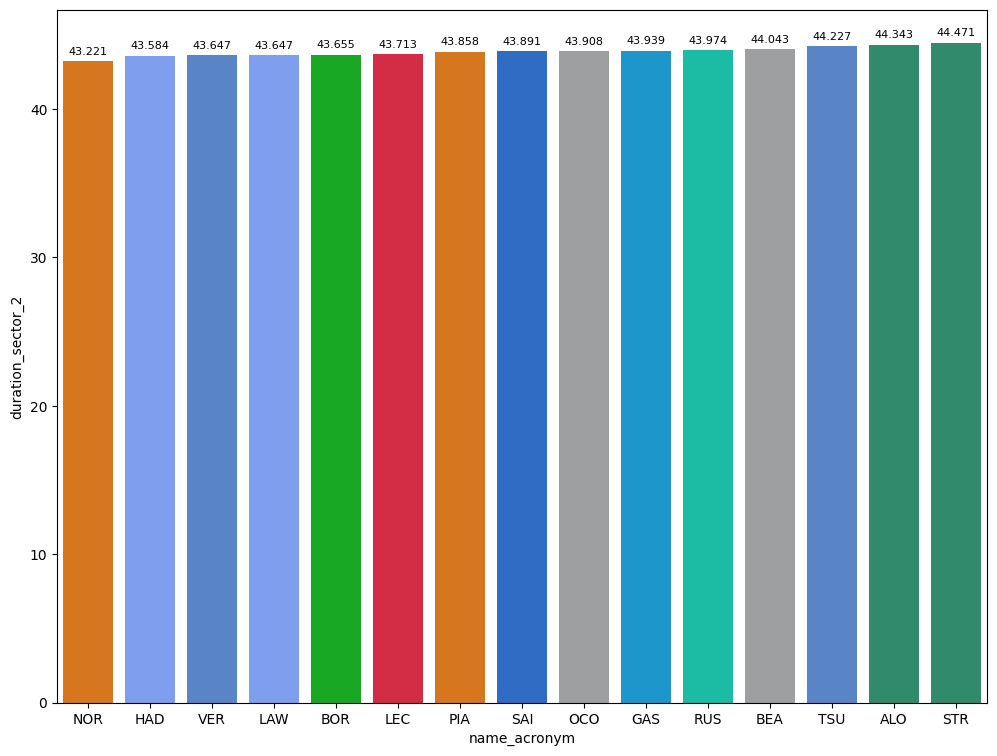

In [123]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

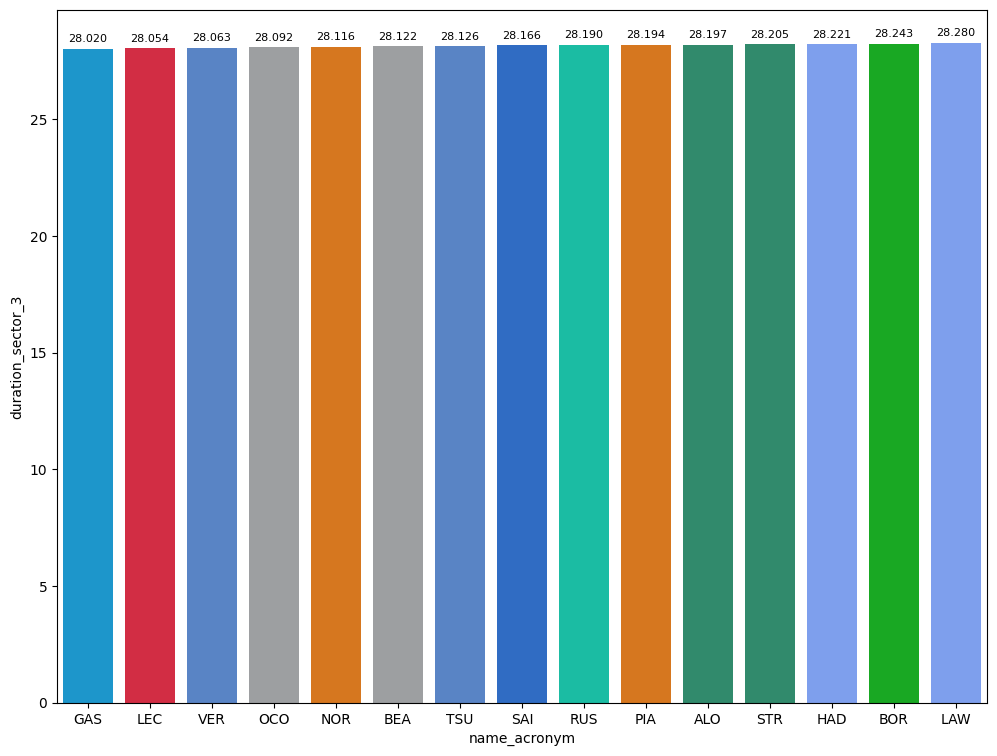

In [124]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [125]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [126]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  29.964 Sector 2:  42.723 Sector 3:  27.823


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.
Piastri forgot his SQ2 and he smashed taking the pole. As we watched in FP, McLaren centered on sector 2 so this is the reason why they are slow in straights. Second sector was crucial were just NOR were able to be 3 tenths behind in this sector. Next driver is VER being 0.45 tenths slower. Lando lost P2 in sector 1 (9th fastest) where he was 2 tenths slower and he almost lost P3 but S2 avoided it.

In [127]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              1         0.477               -0.095                0.447   
1              4         0.618                0.142                0.298   
2             16         0.768                0.051                0.510   
3             31         1.055               -0.216                1.131   
4             55         1.251                0.021                0.853   
5             87         1.347               -0.162                1.205   
6             10         1.449               -0.001                1.161   
7              6         1.461                0.171                0.794   
8              5         1.666                0.072                1.219   

   difference_sector_3 name_acronym  
0                0.125          VER  
1                0.178          NOR  
2                0.207          LEC  
3                0.140          OCO  
4                0.377          SAI  
5                0.304          BEA  
6                0.289          GAS  
7                0.496          HAD  
8                0.375          BOR

#### Best sector per driver

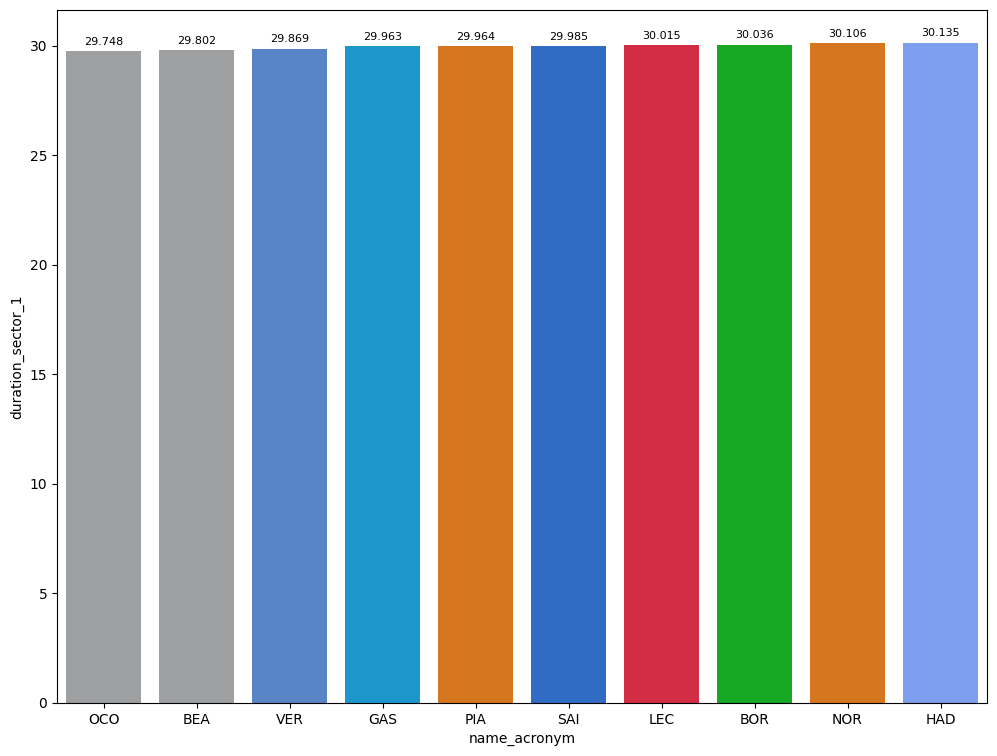

In [128]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

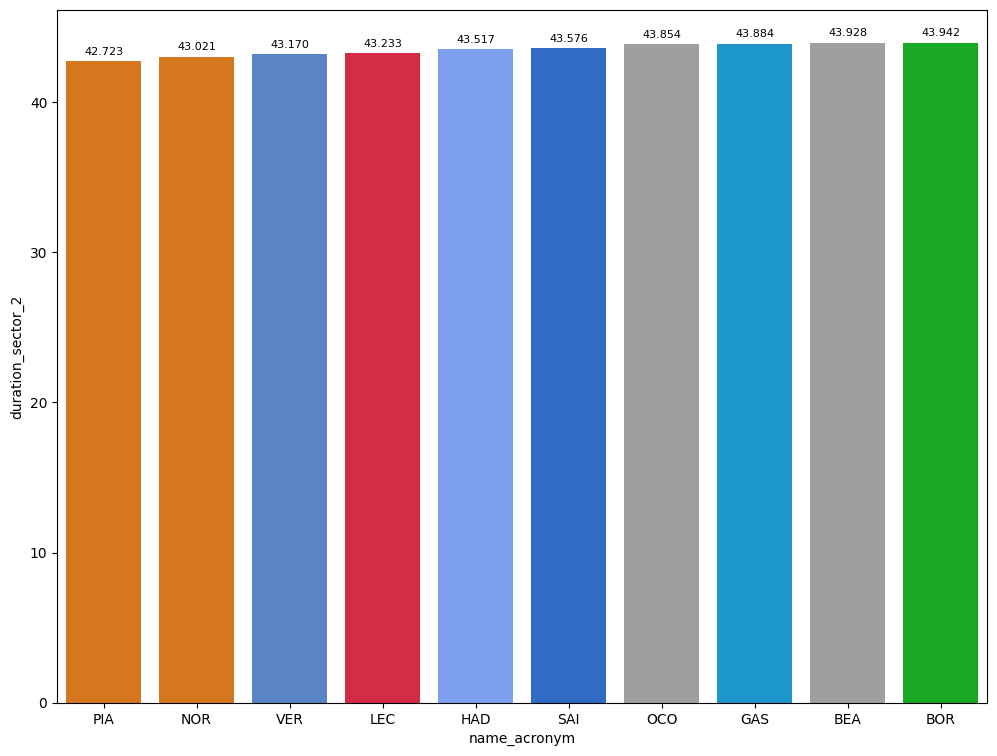

In [129]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

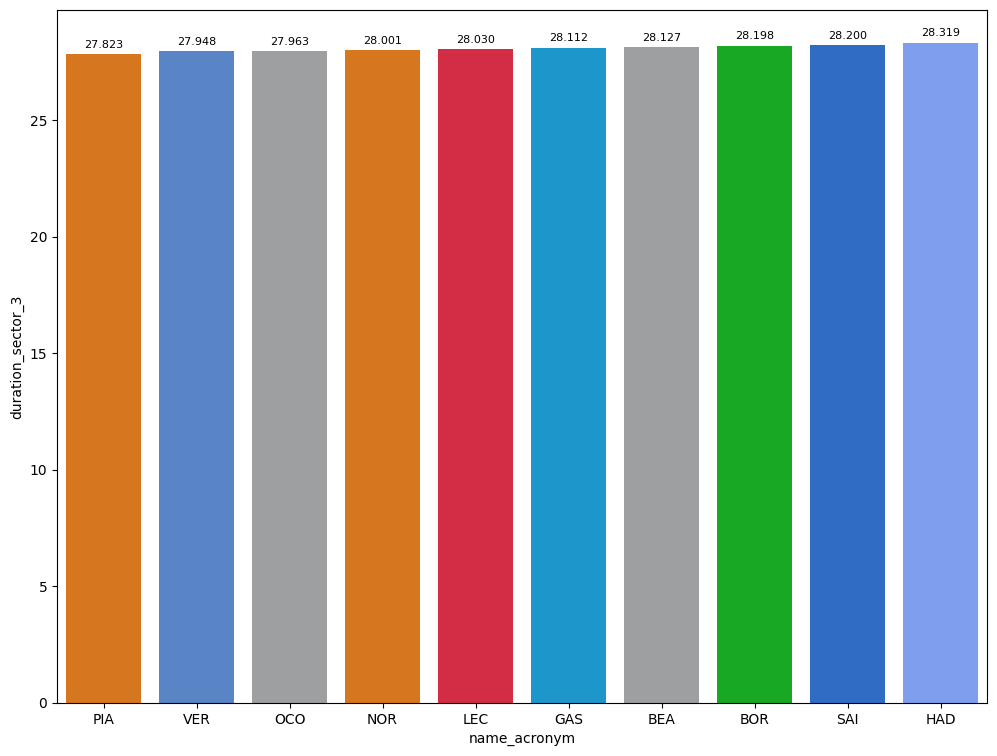

In [130]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

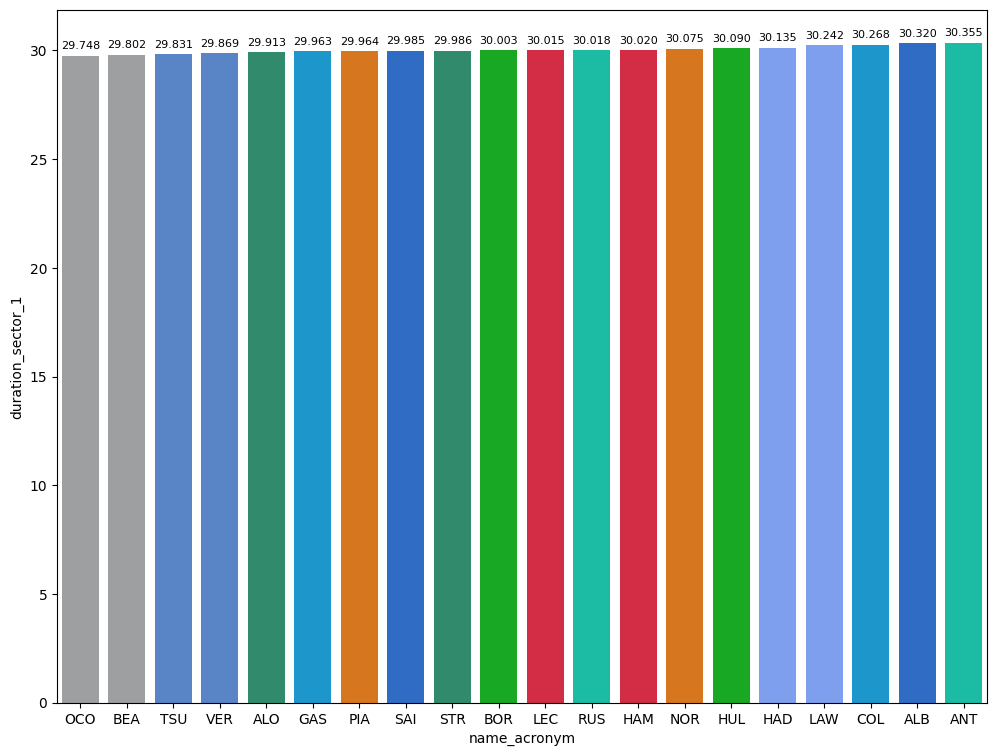

In [131]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

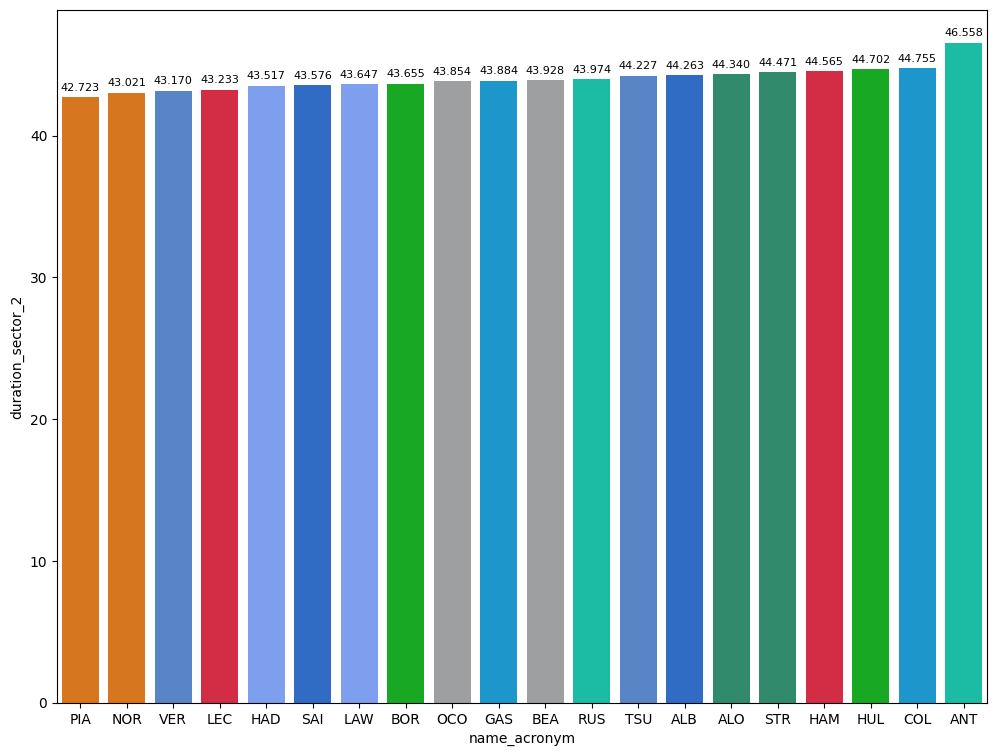

In [132]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

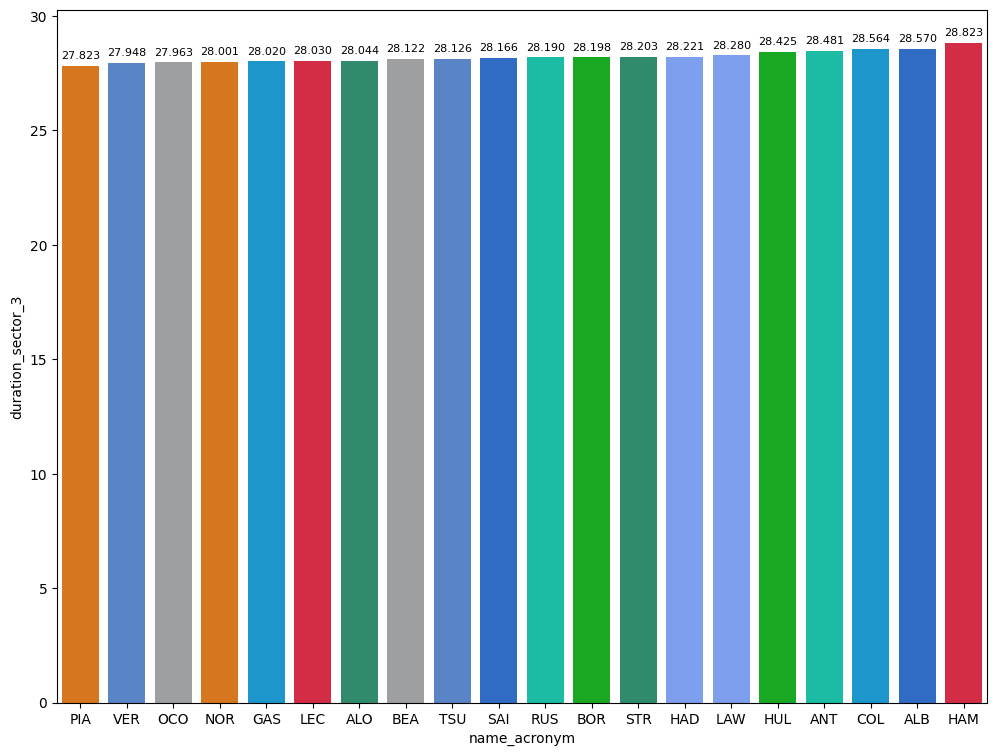

In [133]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9567)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9567)
drivers = libraryDataF1.obtain_information('drivers',session_key=9567)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9568)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9568)
drivers = libraryDataF1.obtain_information('drivers',session_key=9568)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice2],drivers,0.1,0.12,0.1)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,108,111)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Sprint

In [4]:
race = libraryDataF1.obtain_information('laps',session_key=9934)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9934)
drivers = libraryDataF1.obtain_information('drivers',session_key=9934)
libraryDataF1.obtain_drivers_colours(drivers)

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])

### Top speed captured in the speed trap

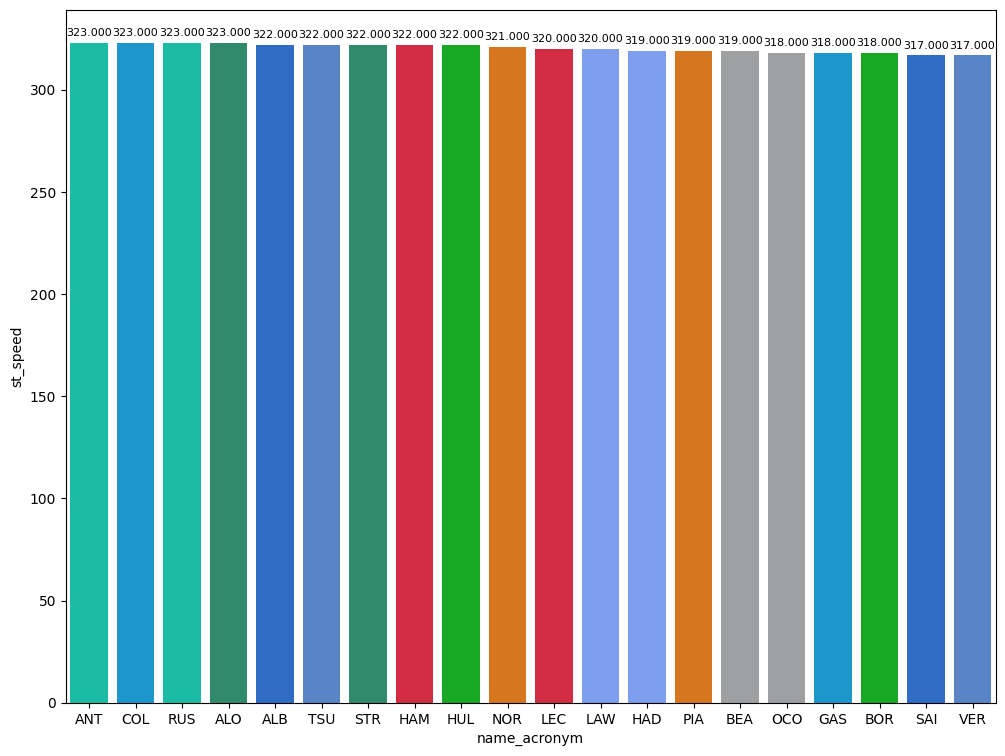

In [6]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

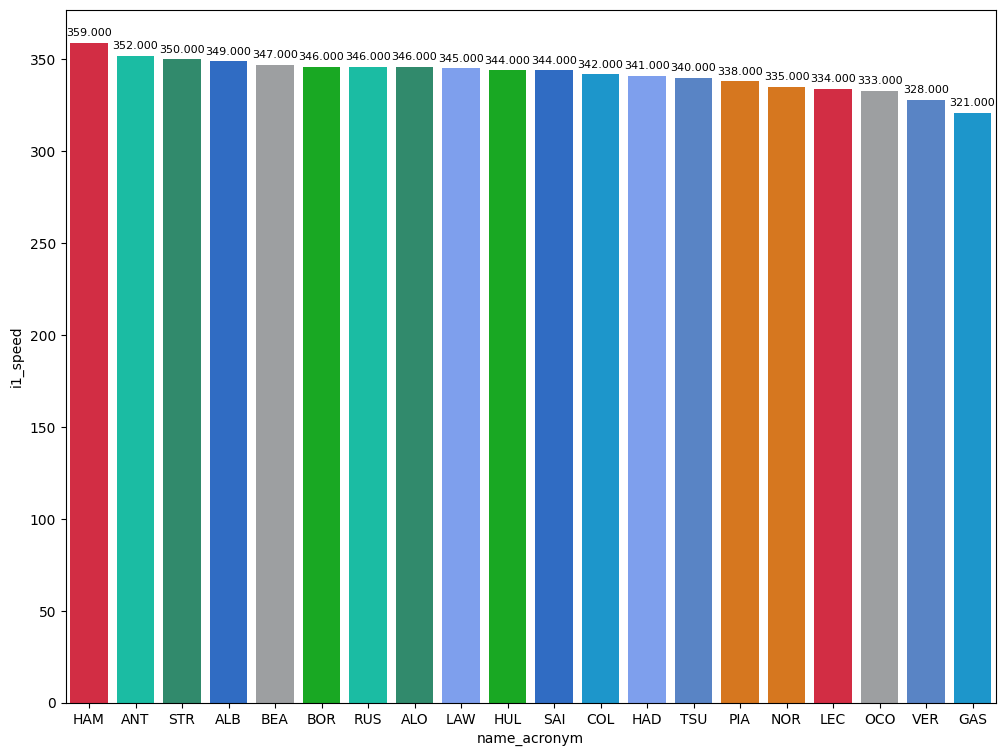

In [7]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

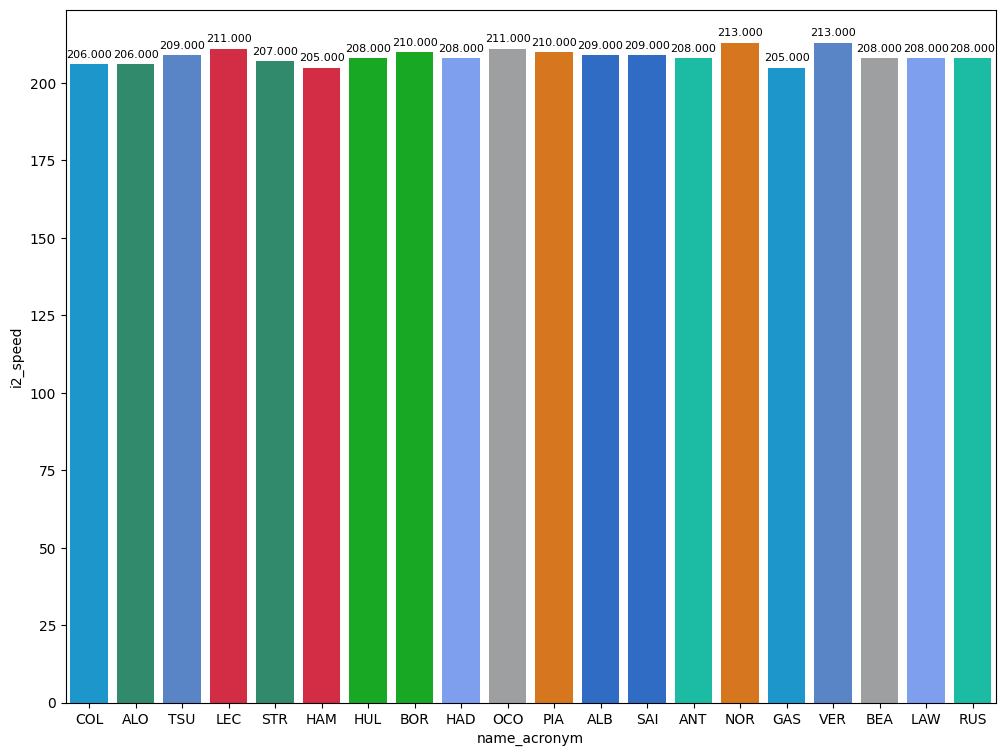

In [8]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [14]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=121").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
team_name                    
McLaren            106.352769
Red Bull Racing    107.109833
Haas F1 Team       107.267933
Racing Bulls       107.461059
Ferrari            107.549000
Williams           107.702500
Aston Martin       107.860522
Mercedes           107.964045
Kick Sauber        107.977737
Alpine             108.267286

### Race pace per teams

In [15]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=121").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

duration_sector_1
team_name                         
Aston Martin             30.603348
Mercedes                 30.617773
McLaren                  30.743538
Haas F1 Team             30.812200
Red Bull Racing          30.812667
Williams                 30.847278
Ferrari                  30.858150
Racing Bulls             30.867412
Kick Sauber              30.927316
Alpine                   31.079786

In [16]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=121").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

duration_sector_2
team_name                         
McLaren                  47.012923
Red Bull Racing          47.658444
Haas F1 Team             47.747200
Racing Bulls             47.839412
Ferrari                  47.867000
Williams                 47.986556
Kick Sauber              48.101632
Alpine                   48.267500
Aston Martin             48.523652
Mercedes                 48.614636

In [17]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=121").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

duration_sector_3
team_name                         
McLaren                  28.596308
Red Bull Racing          28.638722
Haas F1 Team             28.708533
Mercedes                 28.731636
Aston Martin             28.733522
Racing Bulls             28.754235
Ferrari                  28.823850
Williams                 28.868667
Alpine                   28.920000
Kick Sauber              28.948789

### Race pace
General explanation
Explanation per teams

In [19]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 121").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
team_name                    
McLaren            106.352769
Red Bull Racing    107.109833
Haas F1 Team       107.267933
Racing Bulls       107.461059
Ferrari            107.549000
Williams           107.702500
Aston Martin       107.860522
Mercedes           107.964045
Kick Sauber        107.977737
Alpine             108.267286

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [20]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 121").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

duration_sector_1
team_name                         
Aston Martin             30.603348
Mercedes                 30.617773
McLaren                  30.743538
Haas F1 Team             30.812200
Red Bull Racing          30.812667
Williams                 30.847278
Ferrari                  30.858150
Racing Bulls             30.867412
Kick Sauber              30.927316
Alpine                   31.079786

#### Sector 2
General explanation

In [21]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 121").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

duration_sector_2
team_name                         
McLaren                  47.012923
Red Bull Racing          47.658444
Haas F1 Team             47.747200
Racing Bulls             47.839412
Ferrari                  47.867000
Williams                 47.986556
Kick Sauber              48.101632
Alpine                   48.267500
Aston Martin             48.523652
Mercedes                 48.614636

#### Sector 3
General explanation

In [22]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 121").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

duration_sector_3
team_name                         
McLaren                  28.596308
Red Bull Racing          28.638722
Haas F1 Team             28.708533
Mercedes                 28.731636
Aston Martin             28.733522
Racing Bulls             28.754235
Ferrari                  28.823850
Williams                 28.868667
Alpine                   28.920000
Kick Sauber              28.948789

### Long runs

In [23]:
MINIMUN_SECONDS = 95
MAXIMUM_SECONDS = 121

#### Red Bull Racing

In [24]:
stintInformation.query('driver_number == 1 or driver_number == 30')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1265         9934             1              1          1       15   
12         1265         9934             1             30          1       15   

   compound  tyre_age_at_start  
1    MEDIUM                  3  
12   MEDIUM                  3

In [25]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
0    Max VERSTAPPEN   MEDIUM  2025-07-26T10:05:40.549000+00:00           2   
19   Max VERSTAPPEN   MEDIUM  2025-07-26T10:07:26.728000+00:00           3   
38   Max VERSTAPPEN   MEDIUM  2025-07-26T10:09:12.970000+00:00           4   
58   Max VERSTAPPEN   MEDIUM  2025-07-26T10:10:59.197000+00:00           5   
78   Max VERSTAPPEN   MEDIUM  2025-07-26T10:12:45.698000+00:00           6   
98   Max VERSTAPPEN   MEDIUM  2025-07-26T10:14:31.641000+00:00           7   
118  Max VERSTAPPEN   MEDIUM  2025-07-26T10:16:18.117000+00:00           8   
138  Max VERSTAPPEN   MEDIUM  2025-07-26T10:18:04.542000+00:00           9   
158  Max VERSTAPPEN   MEDIUM  2025-07-26T10:19:51.017000+00:00          10   
178  Max VERSTAPPEN   MEDIUM  2025-07-26T10:21:37.625000+00:00          11   
198  Max VERSTAPPEN   MEDIUM  2025-07-26T10:23:24.158000+00:00          12   
218  Max VERSTAPPEN   MEDIUM  2025-07-26T10:25:10.447000+00:00          13   
238  Max VERSTAPPEN   MEDIUM  2025-07-26T10:26:57.083000+00:00          14   
258  Max VERSTAPPEN   MEDIUM  2025-07-26T10:28:43.751000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
0               30.851             46.870             28.548       106.269  
19              30.968             46.691             28.591       106.250  
38              30.900             46.704             28.587       106.191  
58              31.078             46.645             28.699       106.422  
78              30.906             46.538             28.608       106.052  
98              30.971             46.784             28.624       106.379  
118             31.031             46.827             28.536       106.394  
138             30.976             46.775             28.755       106.506  
158             30.949             46.814             28.888       106.651  
178             30.945             46.865             28.602       106.412  
198             31.092             46.739             28.587       106.418  
218             31.115             46.799             28.664       106.578  
238             31.158             46.866             28.683       106.707  
258             31.022             46.915             28.661       106.598

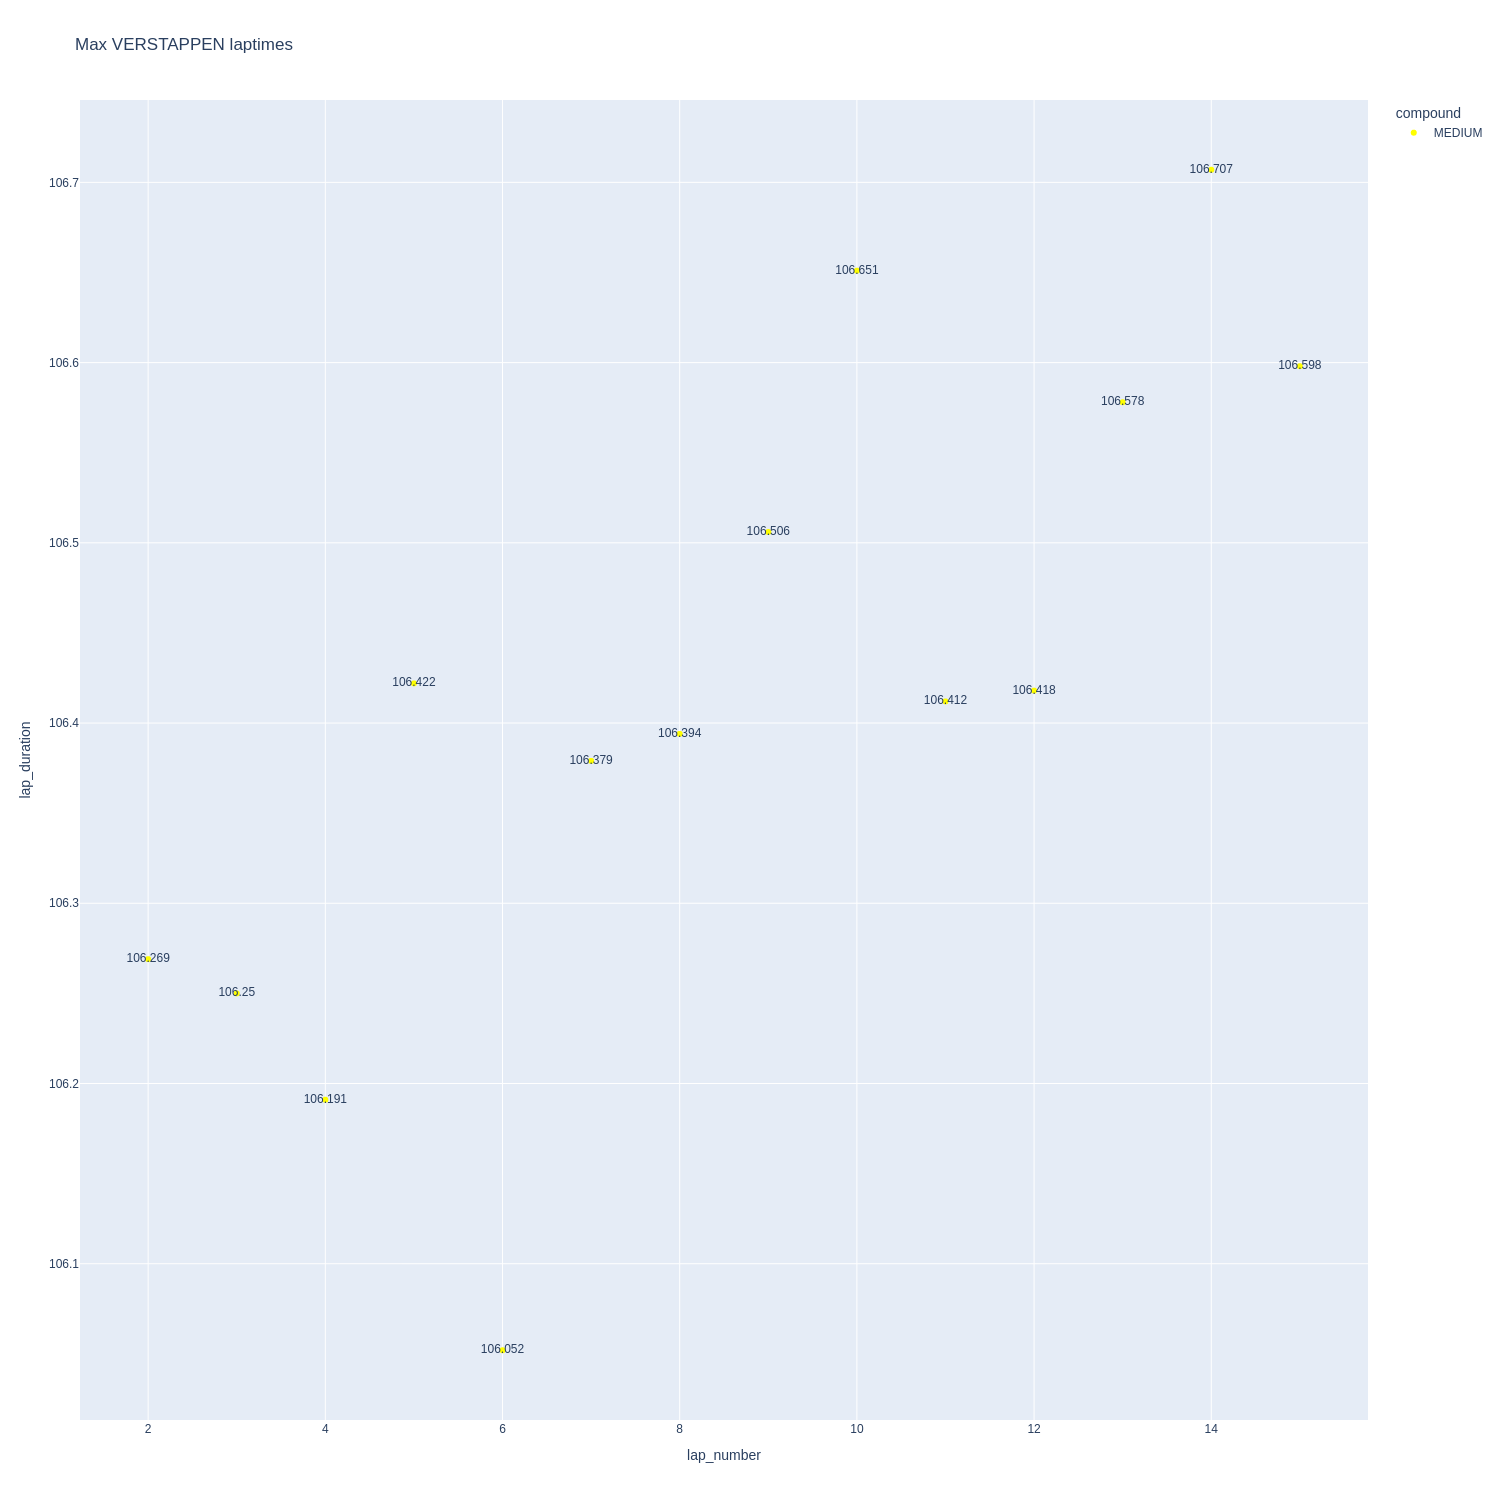

In [26]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

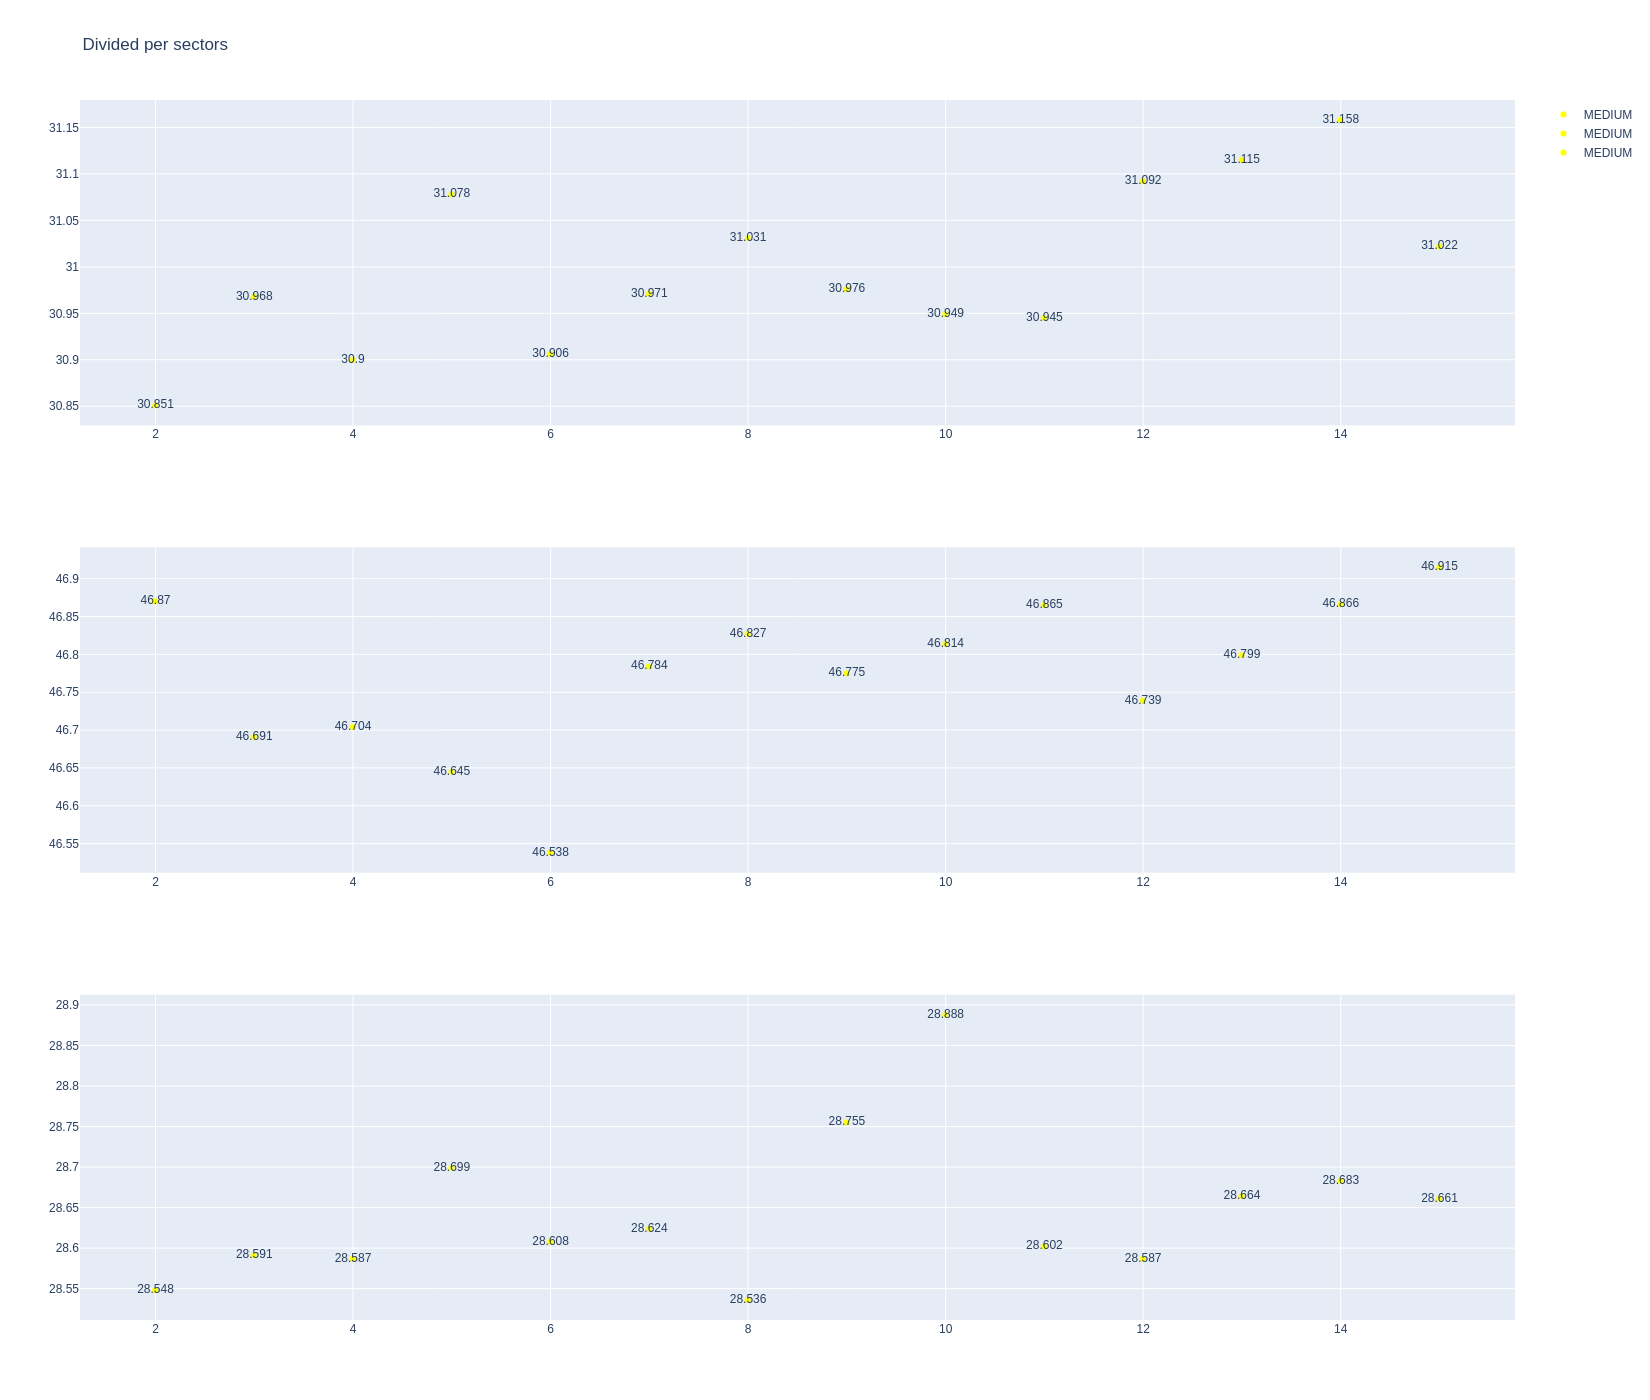

In [27]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [28]:
data = libraryDataF1.getinfolongruns(jointables,30,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [29]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [30]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [31]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1265         9934             1             16          1       15   
15         1265         9934             1             44          1       15   

   compound  tyre_age_at_start  
7    MEDIUM                  3  
15   MEDIUM                  0

In [32]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
2    Charles LECLERC   MEDIUM  2025-07-26T10:05:41.986000+00:00           2   
21   Charles LECLERC   MEDIUM  2025-07-26T10:07:28.420000+00:00           3   
40   Charles LECLERC   MEDIUM  2025-07-26T10:09:14.941000+00:00           4   
61   Charles LECLERC   MEDIUM  2025-07-26T10:11:03.072000+00:00           5   
81   Charles LECLERC   MEDIUM  2025-07-26T10:12:50.005000+00:00           6   
101  Charles LECLERC   MEDIUM  2025-07-26T10:14:36.562000+00:00           7   
121  Charles LECLERC   MEDIUM  2025-07-26T10:16:22.899000+00:00           8   
141  Charles LECLERC   MEDIUM  2025-07-26T10:18:09.382000+00:00           9   
161  Charles LECLERC   MEDIUM  2025-07-26T10:19:56.127000+00:00          10   
181  Charles LECLERC   MEDIUM  2025-07-26T10:21:42.800000+00:00          11   
201  Charles LECLERC   MEDIUM  2025-07-26T10:23:29.736000+00:00          12   
221  Charles LECLERC   MEDIUM  2025-07-26T10:25:16.384000+00:00          13   
241  Charles LECLERC   MEDIUM  2025-07-26T10:27:03.419000+00:00          14   
261  Charles LECLERC   MEDIUM  2025-07-26T10:28:51.103000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
2               30.619             47.060             28.664       106.343  
21                 NaN             47.215             28.806       106.640  
40              31.273             48.071             28.723       108.067  
61              31.064             47.234             28.684       106.982  
81              31.166             46.655             28.697       106.518  
101             31.026             46.667             28.657       106.350  
121             30.931             46.781             28.739       106.451  
141             31.116             46.846             28.756       106.718  
161             31.060             46.945             28.729       106.734  
181             31.035             47.018             28.803       106.856  
201             31.050             46.919             28.725       106.694  
221             31.123             47.112             28.846       107.081  
241             31.214             47.580             28.907       107.701  
261             31.072             49.302             29.010       109.384

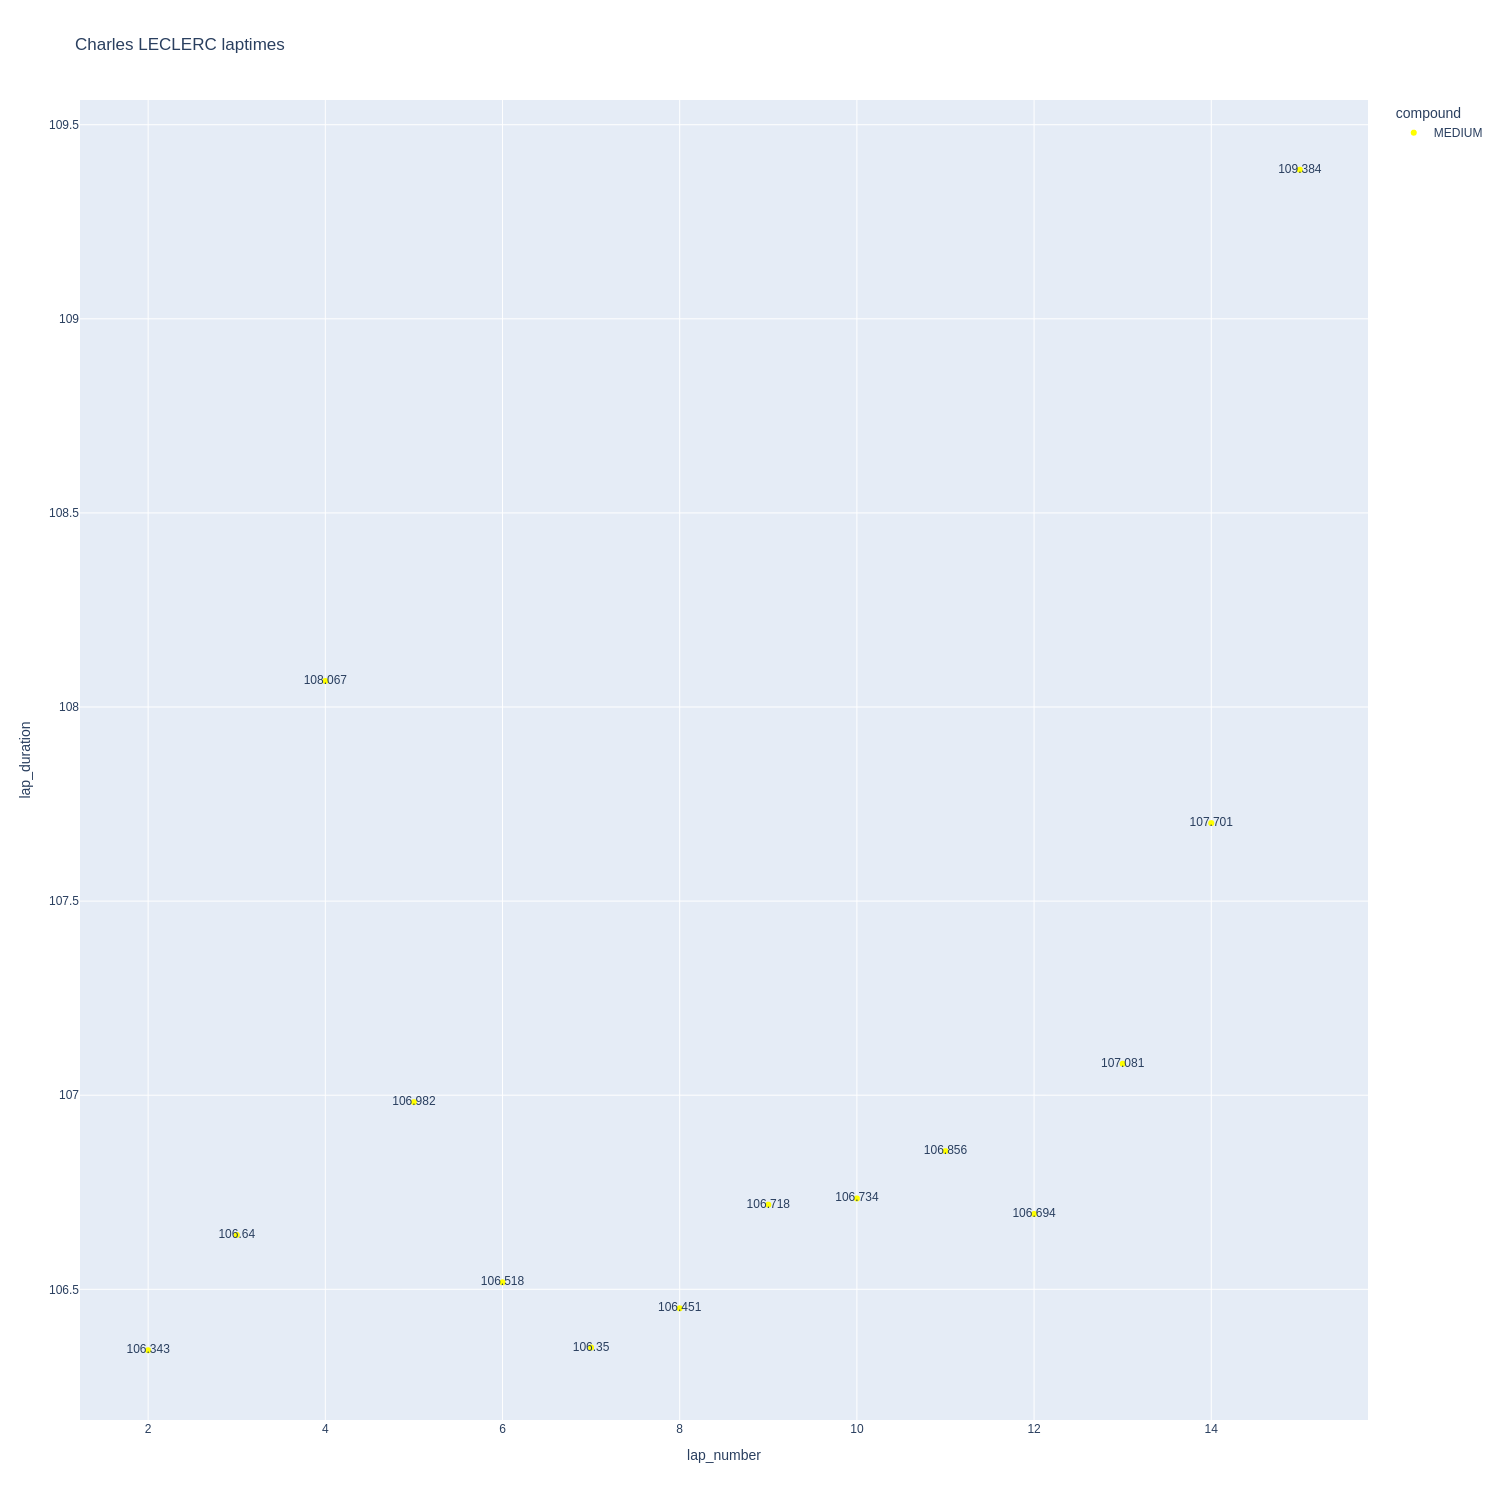

In [33]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

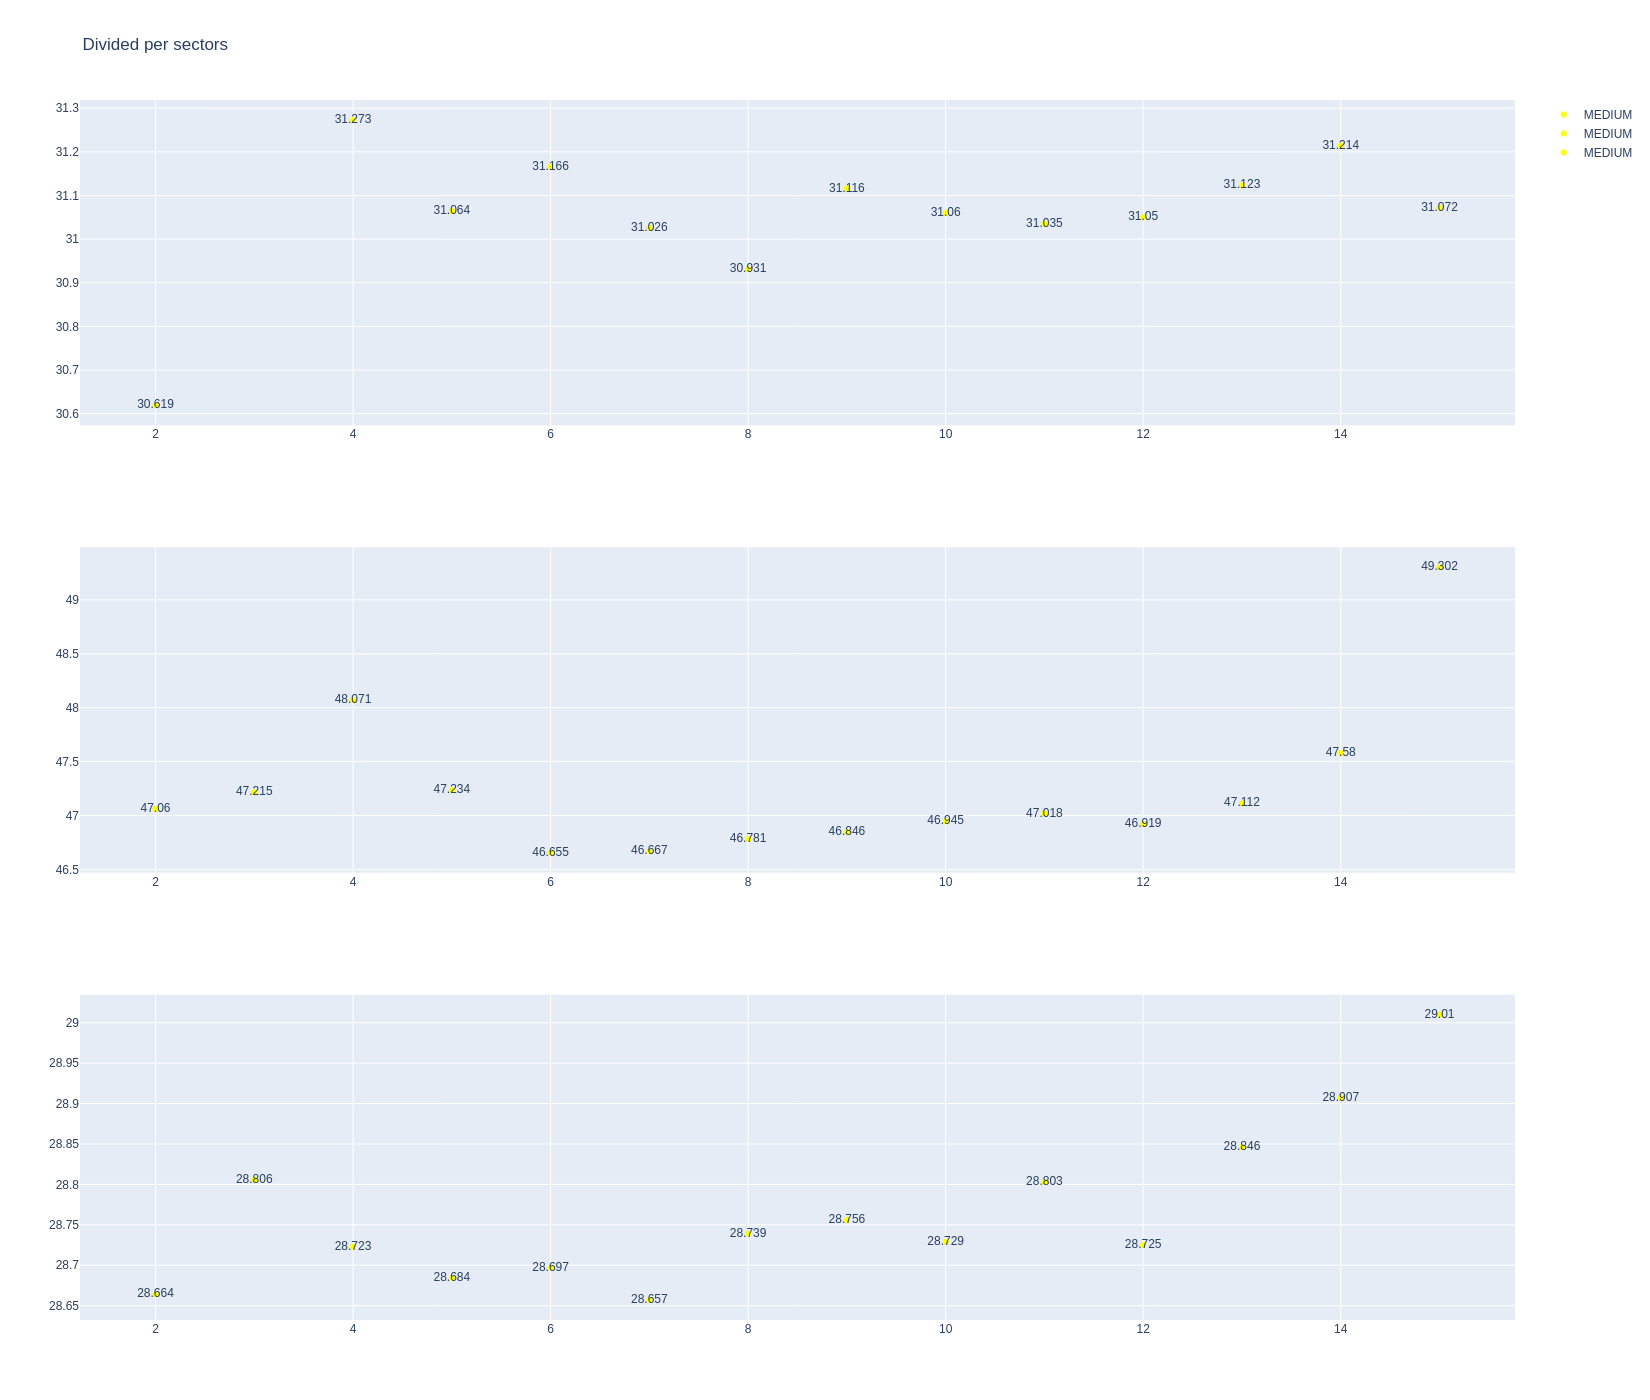

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [35]:
data = libraryDataF1.getinfolongruns(jointables,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
16   Lewis HAMILTON   MEDIUM  2025-07-26T10:05:49.920000+00:00           2   
35   Lewis HAMILTON   MEDIUM  2025-07-26T10:07:38.631000+00:00           3   
53   Lewis HAMILTON   MEDIUM  2025-07-26T10:09:26.337000+00:00           4   
73   Lewis HAMILTON   MEDIUM  2025-07-26T10:11:13.697000+00:00           5   
93   Lewis HAMILTON   MEDIUM  2025-07-26T10:13:01.038000+00:00           6   
113  Lewis HAMILTON   MEDIUM  2025-07-26T10:14:48.553000+00:00           7   
133  Lewis HAMILTON   MEDIUM  2025-07-26T10:16:36.098000+00:00           8   
153  Lewis HAMILTON   MEDIUM  2025-07-26T10:18:24.078000+00:00           9   
173  Lewis HAMILTON   MEDIUM  2025-07-26T10:20:12.171000+00:00          10   
193  Lewis HAMILTON   MEDIUM  2025-07-26T10:21:59.764000+00:00          11   
213  Lewis HAMILTON   MEDIUM  2025-07-26T10:23:47.671000+00:00          12   
233  Lewis HAMILTON   MEDIUM  2025-07-26T10:25:35.834000+00:00          13   
253  Lewis HAMILTON   MEDIUM  2025-07-26T10:27:24.152000+00:00          14   
272  Lewis HAMILTON   MEDIUM  2025-07-26T10:29:12.584000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
16              30.715             49.083             28.869       108.667  
35              30.578             48.606             28.642       107.826  
53              30.746             47.602             28.853       107.201  
73              30.601             47.882             28.868       107.351  
93              30.624             48.077             28.960       107.661  
113             30.744             47.944             28.754       107.442  
133             30.513             48.585             28.894       107.992  
153             30.735             48.456             28.941       108.132  
173             30.620             48.093             28.813       107.526  
193             30.713             48.368             28.874       107.955  
213             30.849             48.234             29.100       108.183  
233             30.718             48.533             28.954       108.205  
253             30.641             48.646             29.202       108.489  
272             31.451             47.777             28.736       107.964

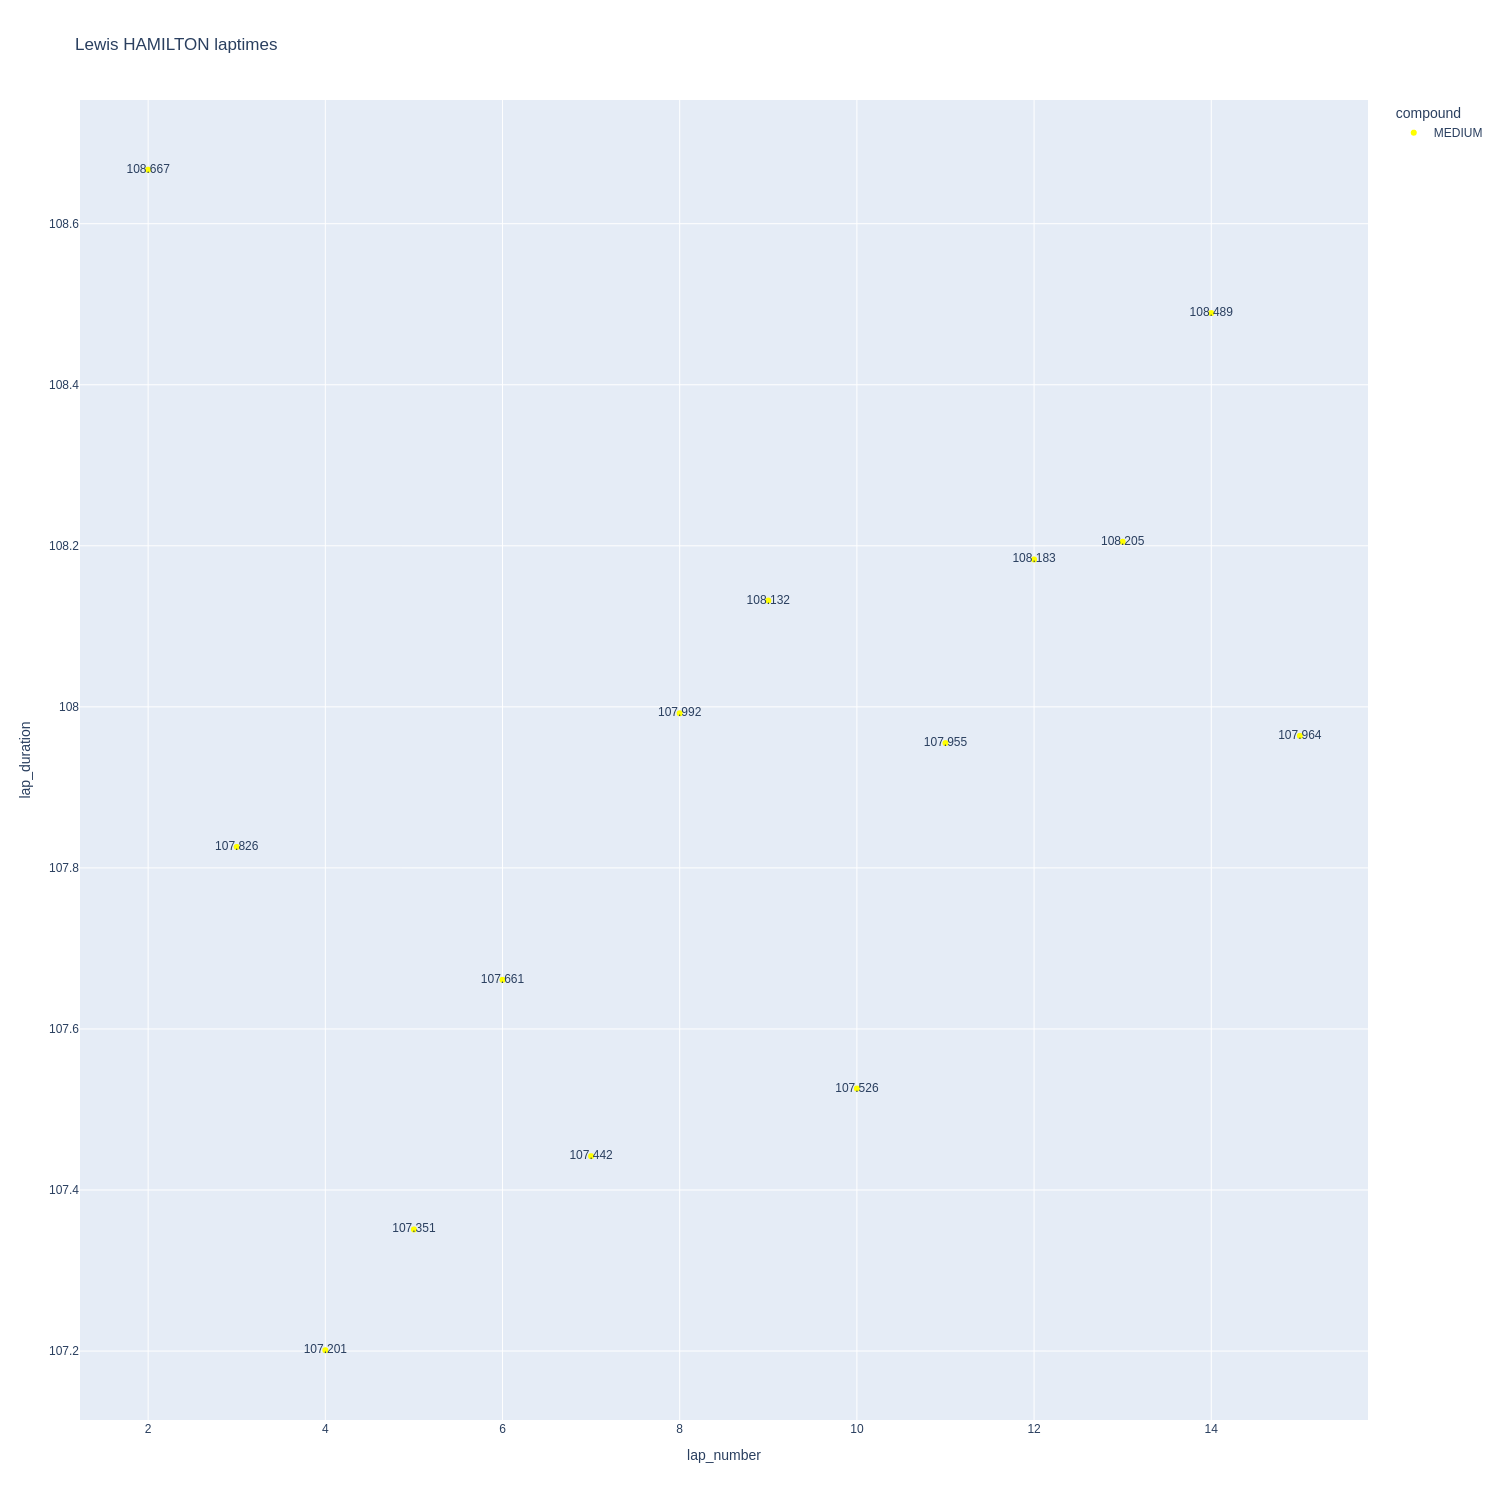

In [36]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

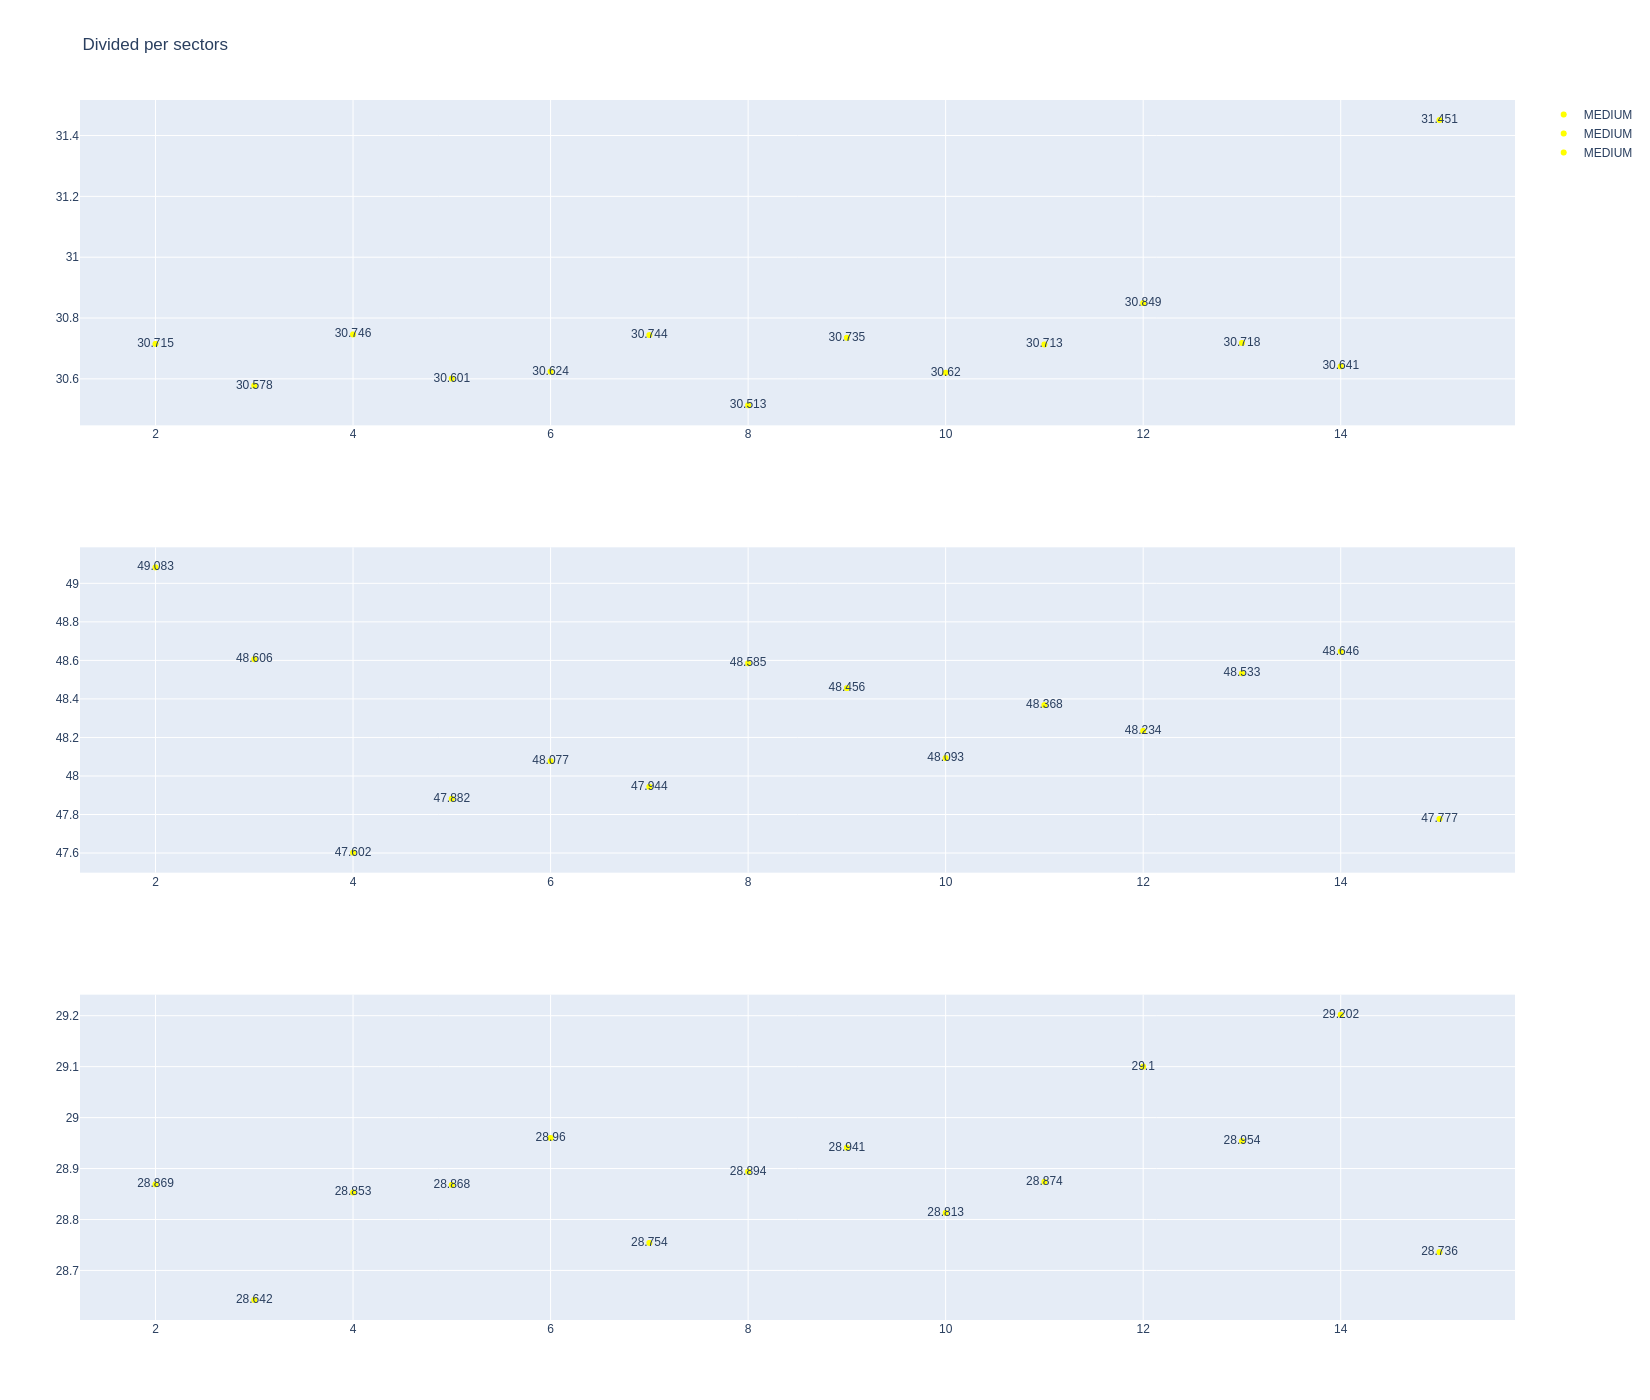

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [38]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1265         9934             1             12          1       15   
17         1265         9934             1             63          1       15   

   compound  tyre_age_at_start  
5    MEDIUM                  3  
17   MEDIUM                  3

In [39]:
data = libraryDataF1.getinfolongruns(jointables,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
17   Kimi ANTONELLI   MEDIUM  2025-07-26T10:05:50.240000+00:00           2   
36   Kimi ANTONELLI   MEDIUM  2025-07-26T10:07:38.928000+00:00           3   
55   Kimi ANTONELLI   MEDIUM  2025-07-26T10:09:27.078000+00:00           4   
75   Kimi ANTONELLI   MEDIUM  2025-07-26T10:11:14.994000+00:00           5   
94   Kimi ANTONELLI   MEDIUM  2025-07-26T10:13:01.850000+00:00           6   
114  Kimi ANTONELLI   MEDIUM  2025-07-26T10:14:49.080000+00:00           7   
134  Kimi ANTONELLI   MEDIUM  2025-07-26T10:16:36.583000+00:00           8   
154  Kimi ANTONELLI   MEDIUM  2025-07-26T10:18:24.784000+00:00           9   
174  Kimi ANTONELLI   MEDIUM  2025-07-26T10:20:12.723000+00:00          10   
194  Kimi ANTONELLI   MEDIUM  2025-07-26T10:22:00.586000+00:00          11   
214  Kimi ANTONELLI   MEDIUM  2025-07-26T10:23:48.374000+00:00          12   
234  Kimi ANTONELLI   MEDIUM  2025-07-26T10:25:36.444000+00:00          13   
254  Kimi ANTONELLI   MEDIUM  2025-07-26T10:27:24.674000+00:00          14   
274  Kimi ANTONELLI   MEDIUM  2025-07-26T10:29:13.345000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
17              30.775             48.989             28.912       108.676  
36              30.579             48.838             28.772       108.189  
55              30.649             48.407             28.846       107.902  
75              30.413             47.736             28.549       106.698  
94              30.633             48.178             28.540       107.351  
114             30.421             48.579             28.503       107.503  
134             30.578             48.850             28.676       108.104  
154             30.387             48.803             28.793       107.983  
174             30.348             48.812             28.689       107.849  
194             30.421             48.667             28.738       107.826  
214             30.809             48.551             28.701       108.061  
234             30.552             48.990             28.742       108.284  
254             30.555             48.961             29.163       108.679  
274             30.953             49.414             28.575       108.942

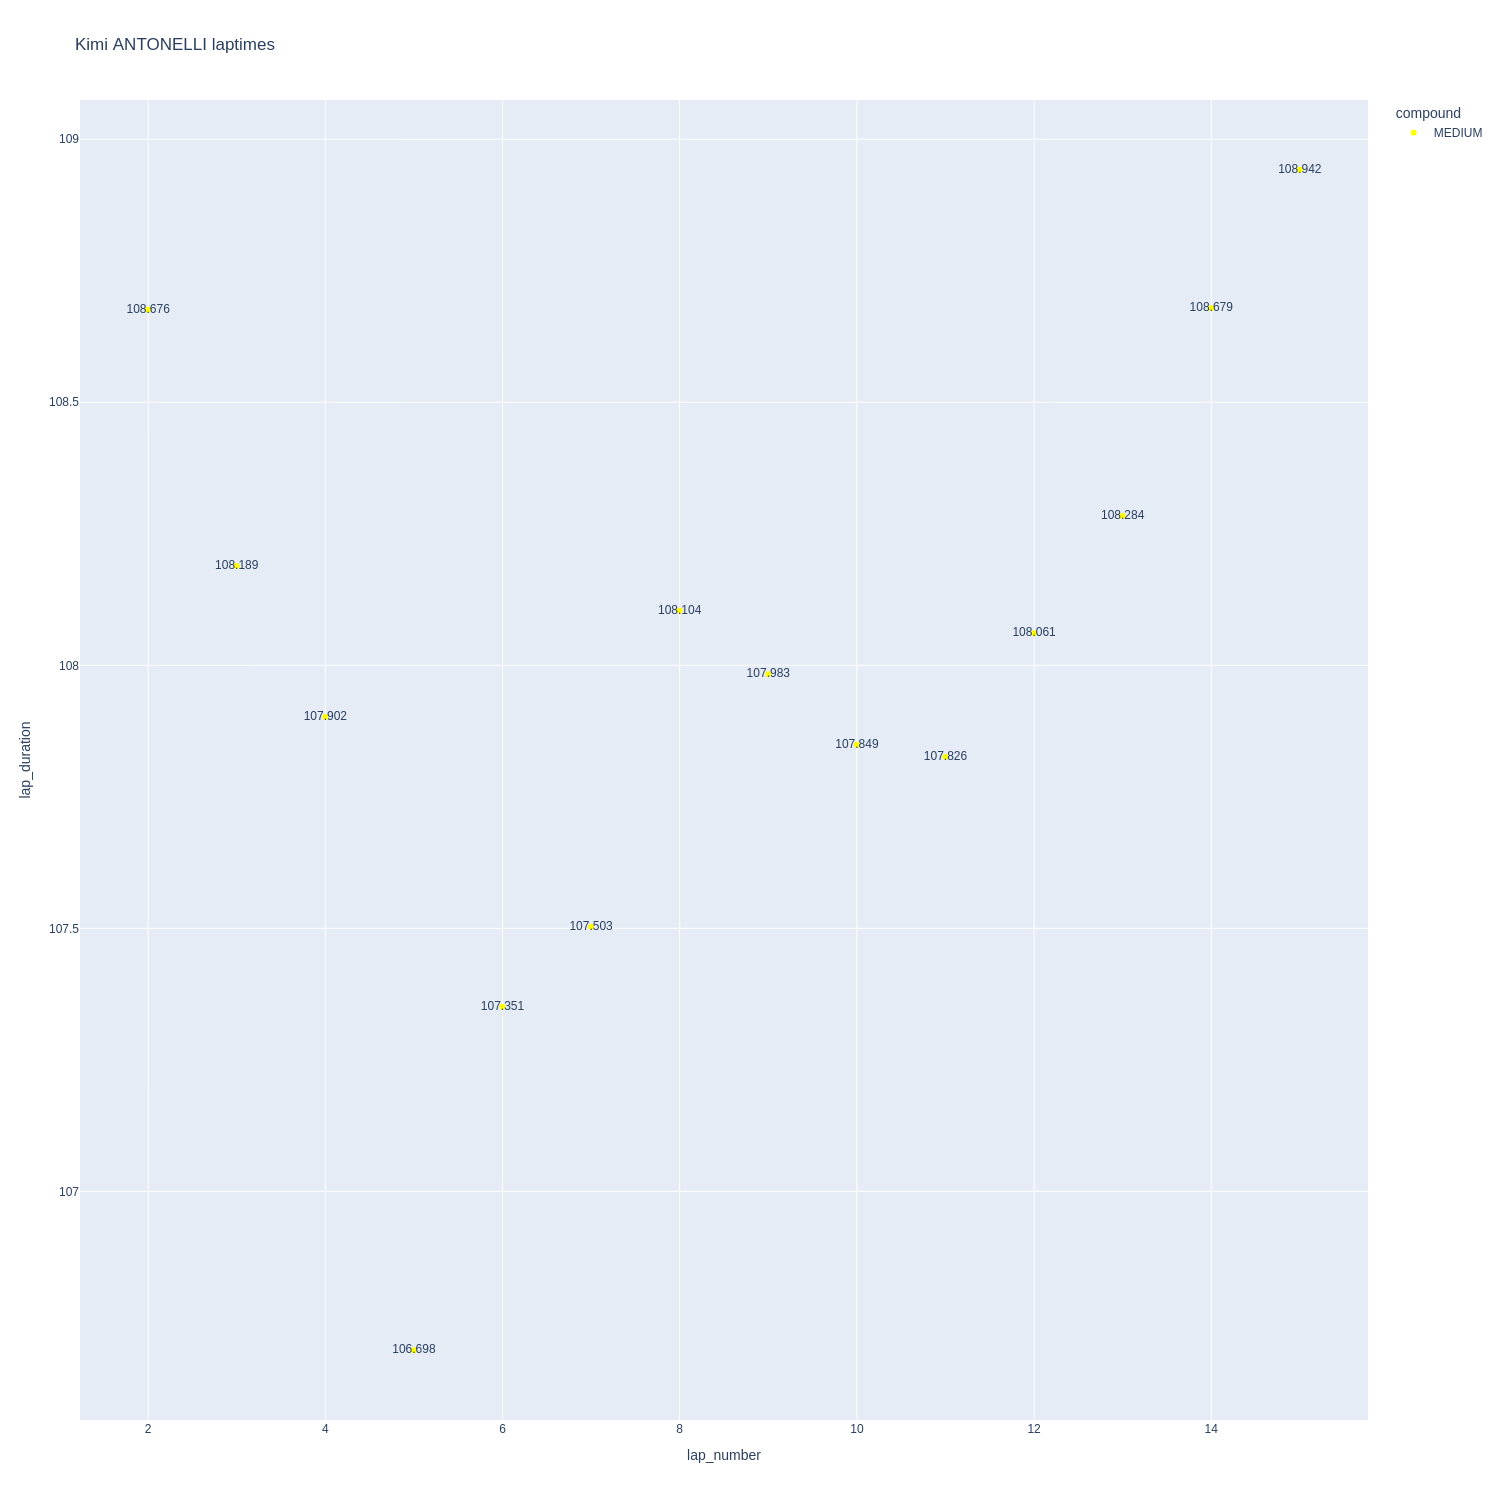

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

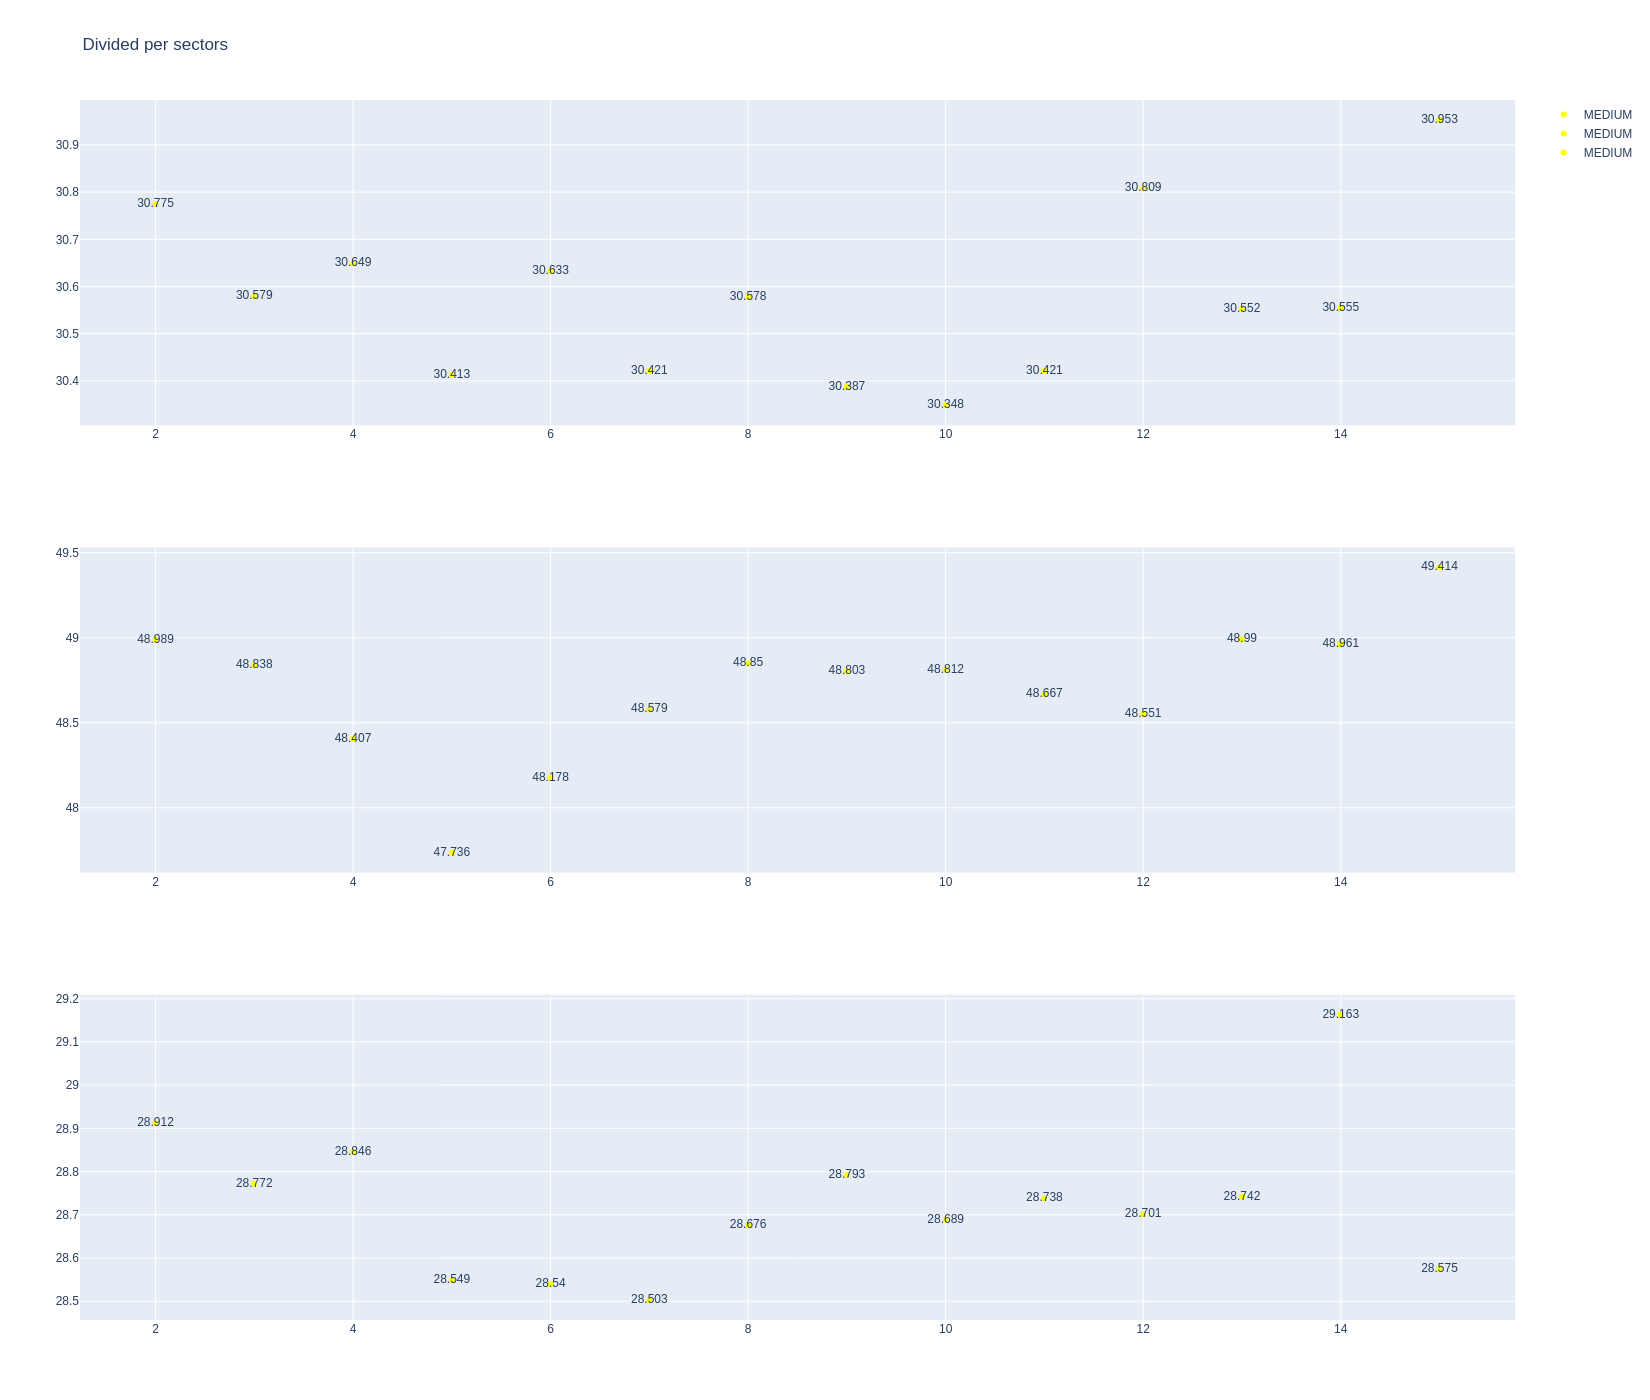

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [42]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
11   George RUSSELL   MEDIUM  2025-07-26T10:05:47.696000+00:00           2   
30   George RUSSELL   MEDIUM  2025-07-26T10:07:35.662000+00:00           3   
49   George RUSSELL   MEDIUM  2025-07-26T10:09:23.398000+00:00           4   
69   George RUSSELL   MEDIUM  2025-07-26T10:11:10.478000+00:00           5   
89   George RUSSELL   MEDIUM  2025-07-26T10:12:57.944000+00:00           6   
109  George RUSSELL   MEDIUM  2025-07-26T10:14:45.533000+00:00           7   
129  George RUSSELL   MEDIUM  2025-07-26T10:16:33.520000+00:00           8   
149  George RUSSELL   MEDIUM  2025-07-26T10:18:21.363000+00:00           9   
169  George RUSSELL   MEDIUM  2025-07-26T10:20:08.964000+00:00          10   
189  George RUSSELL   MEDIUM  2025-07-26T10:21:56.642000+00:00          11   
209  George RUSSELL   MEDIUM  2025-07-26T10:23:44.562000+00:00          12   
229  George RUSSELL   MEDIUM  2025-07-26T10:25:32.459000+00:00          13   
249  George RUSSELL   MEDIUM  2025-07-26T10:27:20.325000+00:00          14   
269  George RUSSELL   MEDIUM  2025-07-26T10:29:08.159000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
11              30.430             48.905             28.634       107.969  
30              30.577             48.332             28.661       107.570  
49              30.602             48.106             28.570       107.278  
69              30.759             47.958             28.646       107.363  
89              30.753             48.281             28.639       107.673  
109             30.588             48.554             28.710       107.852  
129             30.862             48.322             28.710       107.894  
149             30.592             48.386             28.639       107.617  
169             30.610             48.334             28.660       107.604  
189             30.543             48.603             28.818       107.964  
209             30.564             48.541             28.746       107.851  
229             30.753             48.279             28.822       107.854  
249             30.693             48.472             28.766       107.931  
269             30.878             48.554             28.720       108.152

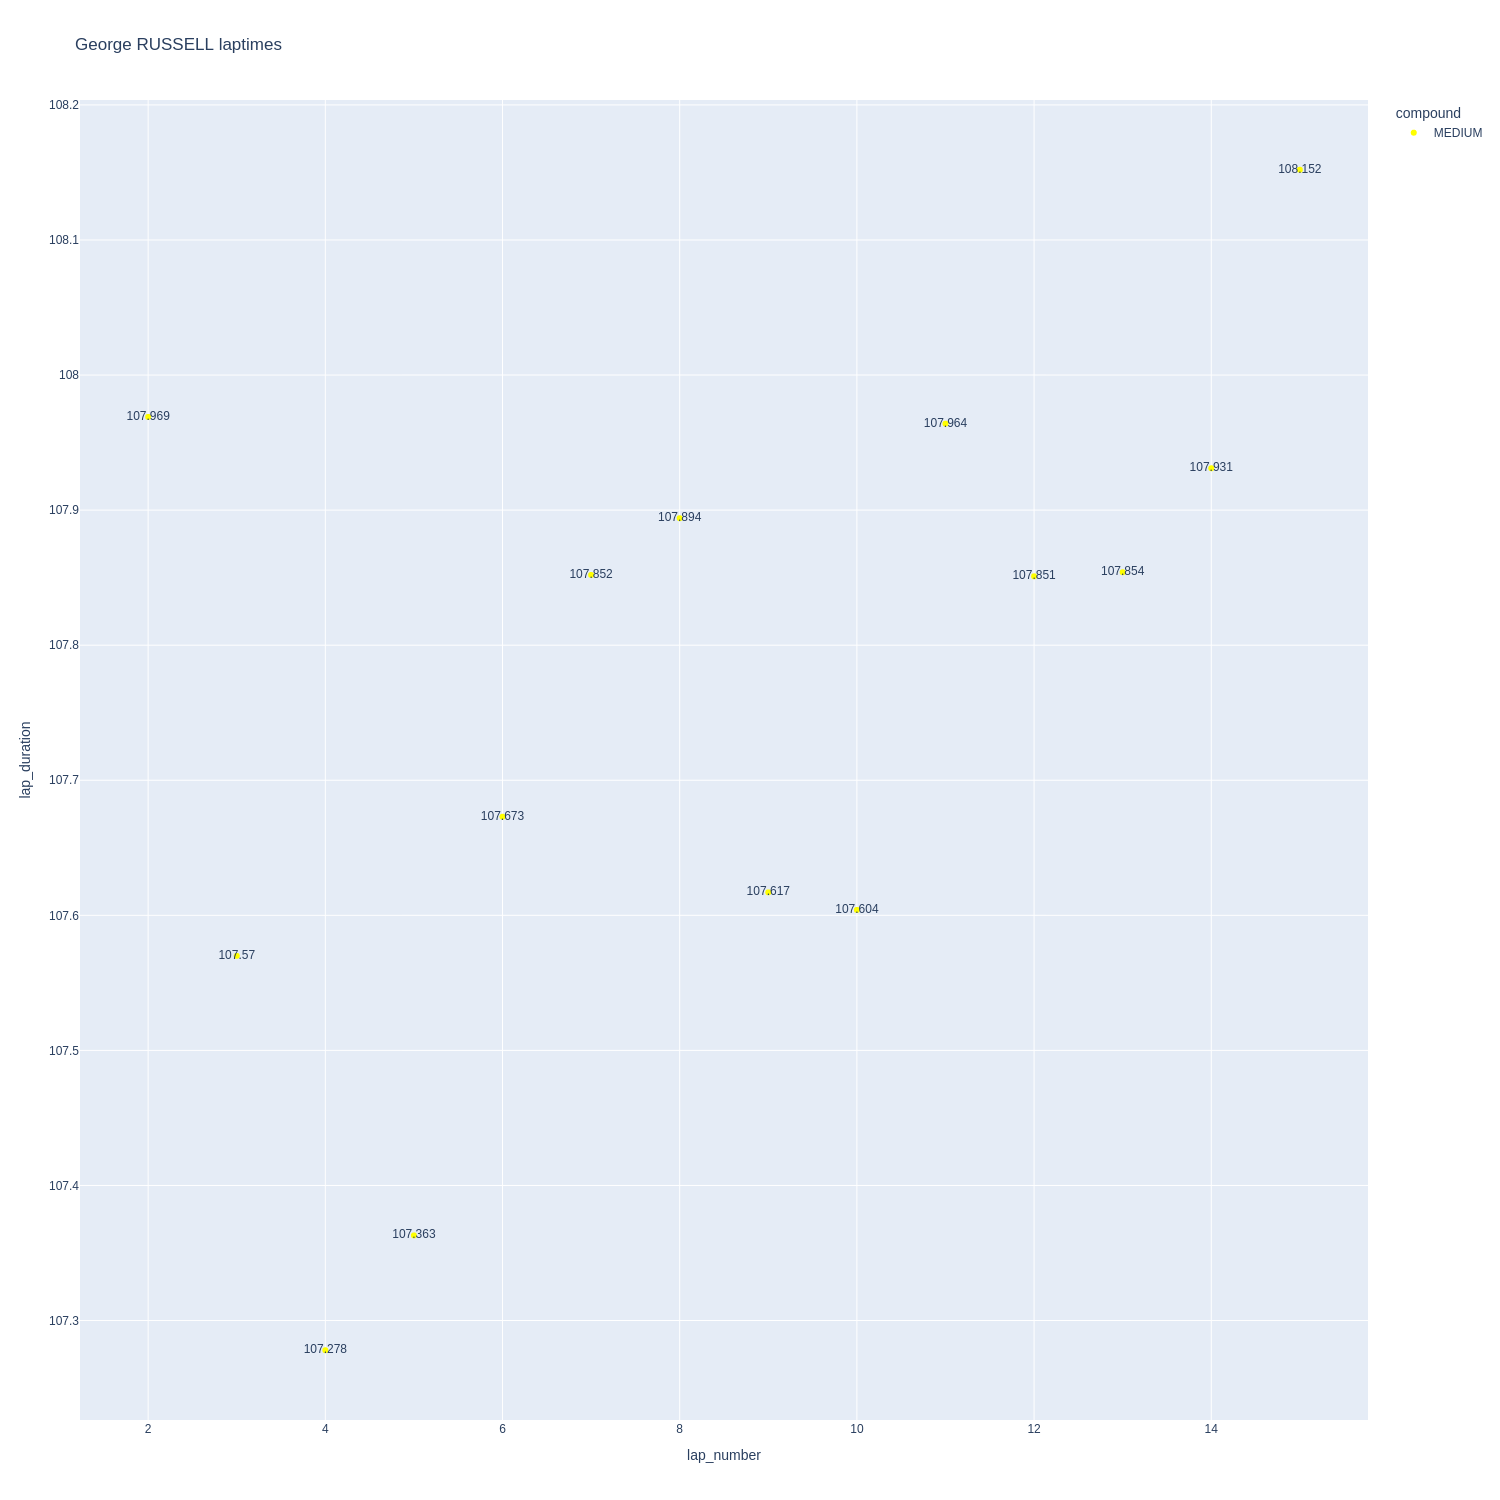

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

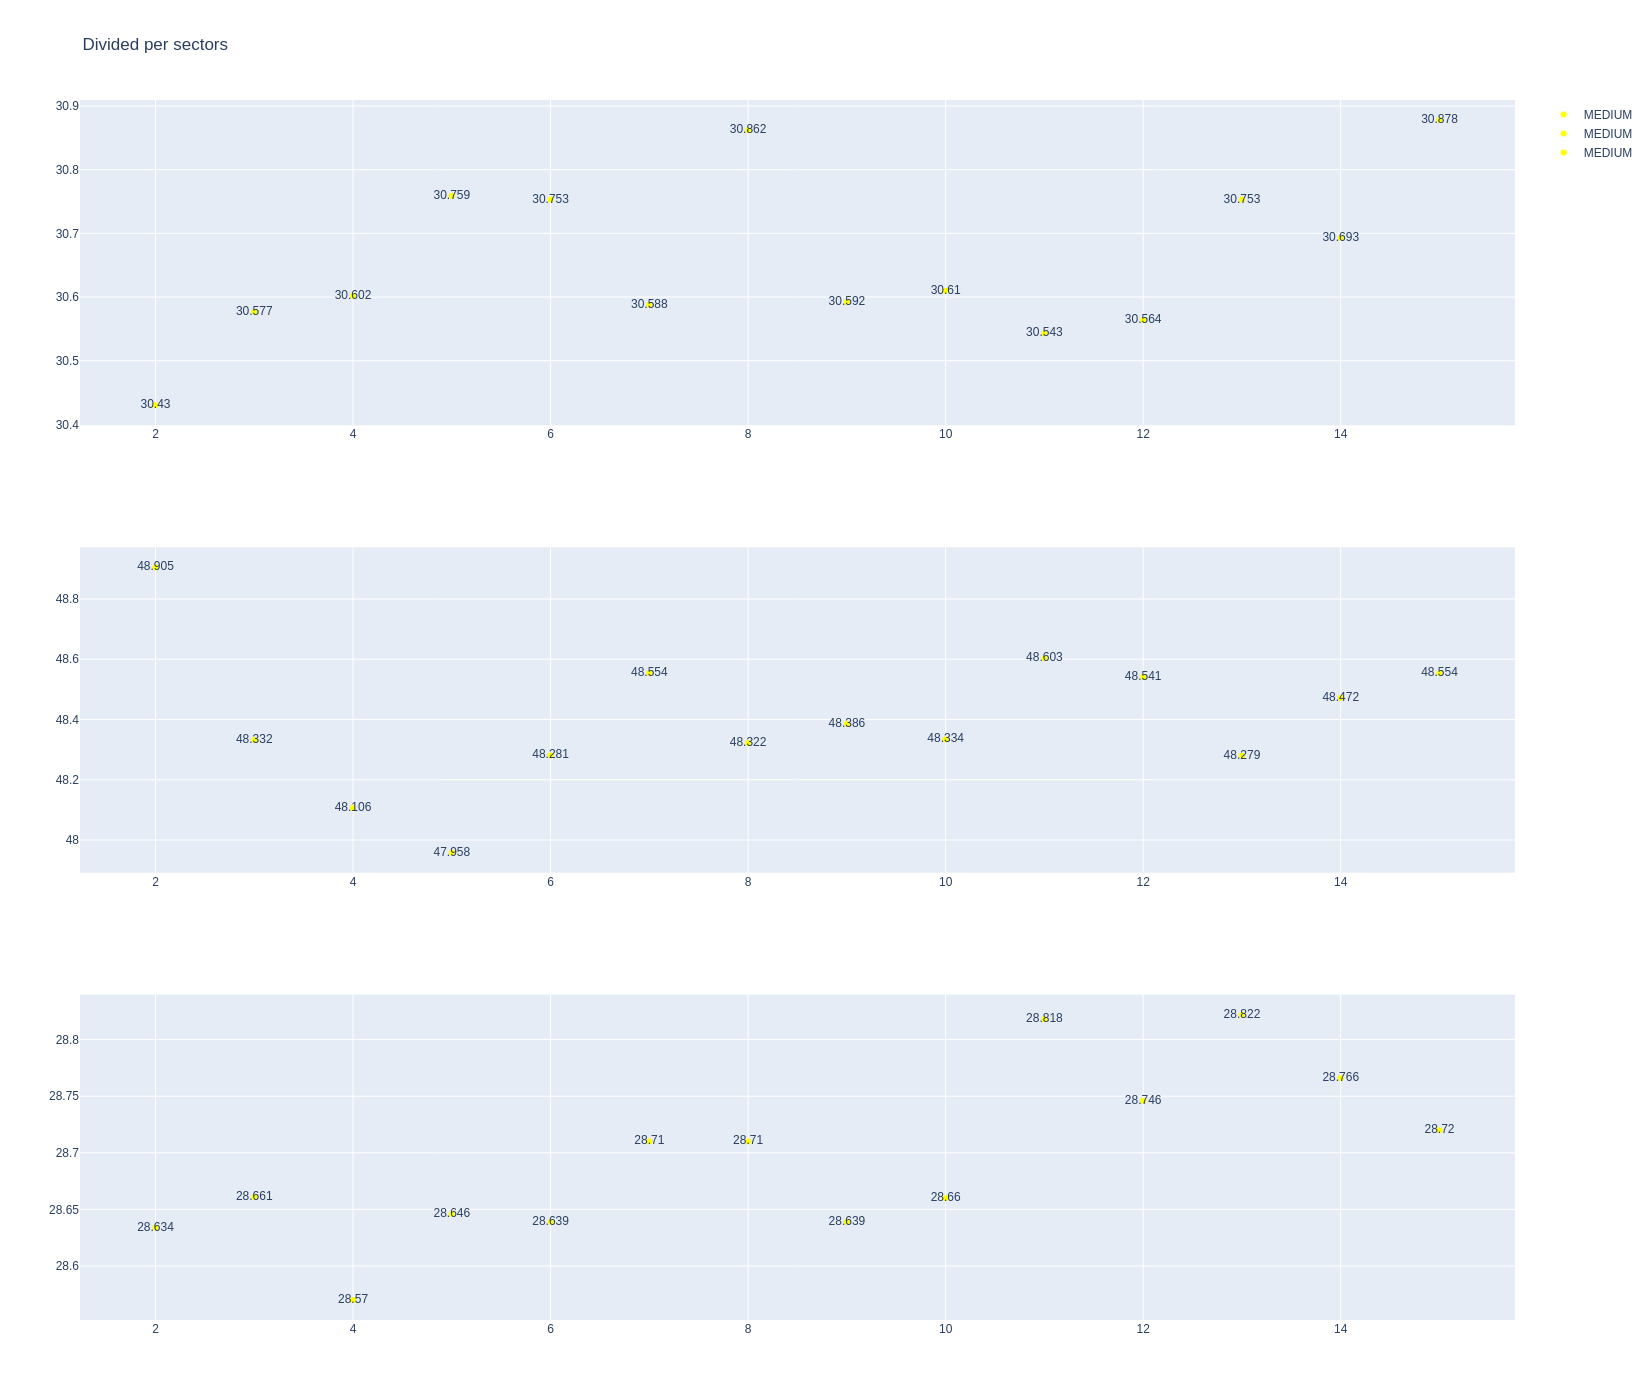

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [45]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1265         9934             1              4          1       15   
18         1265         9934             1             81          1       15   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
18   MEDIUM                  0

In [46]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
3    Lando NORRIS   MEDIUM  2025-07-26T10:05:42.488000+00:00           2   
22   Lando NORRIS   MEDIUM  2025-07-26T10:07:28.957000+00:00           3   
41   Lando NORRIS   MEDIUM  2025-07-26T10:09:15.432000+00:00           4   
60   Lando NORRIS   MEDIUM  2025-07-26T10:11:01.806000+00:00           5   
80   Lando NORRIS   MEDIUM  2025-07-26T10:12:48.170000+00:00           6   
100  Lando NORRIS   MEDIUM  2025-07-26T10:14:34.150000+00:00           7   
120  Lando NORRIS   MEDIUM  2025-07-26T10:16:20.080000+00:00           8   
140  Lando NORRIS   MEDIUM  2025-07-26T10:18:06.267000+00:00           9   
160  Lando NORRIS   MEDIUM  2025-07-26T10:19:52.283000+00:00          10   
180  Lando NORRIS   MEDIUM  2025-07-26T10:21:38.742000+00:00          11   
200  Lando NORRIS   MEDIUM  2025-07-26T10:23:25.361000+00:00          12   
220  Lando NORRIS   MEDIUM  2025-07-26T10:25:12.060000+00:00          13   
240  Lando NORRIS   MEDIUM  2025-07-26T10:26:58.582000+00:00          14   
260  Lando NORRIS   MEDIUM  2025-07-26T10:28:45.167000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
3               30.731             47.204             28.589       106.524  
22              30.523             47.297             28.601       106.421  
41              30.784             47.031             28.609       106.424  
60              31.047             46.601             28.668       106.316  
80              30.901             46.432             28.581       105.914  
100             30.909             46.516             28.550       105.975  
120             30.857             46.717             28.485       106.059  
140             30.721             46.870             28.539       106.130  
160             30.696             47.289             28.524       106.509  
180             30.614             47.455             28.593       106.662  
200             30.661             47.315             28.469       106.445  
220             30.637             47.287             28.811       106.735  
240             30.717             47.229             28.588       106.534  
260             30.748             47.186             28.708       106.642

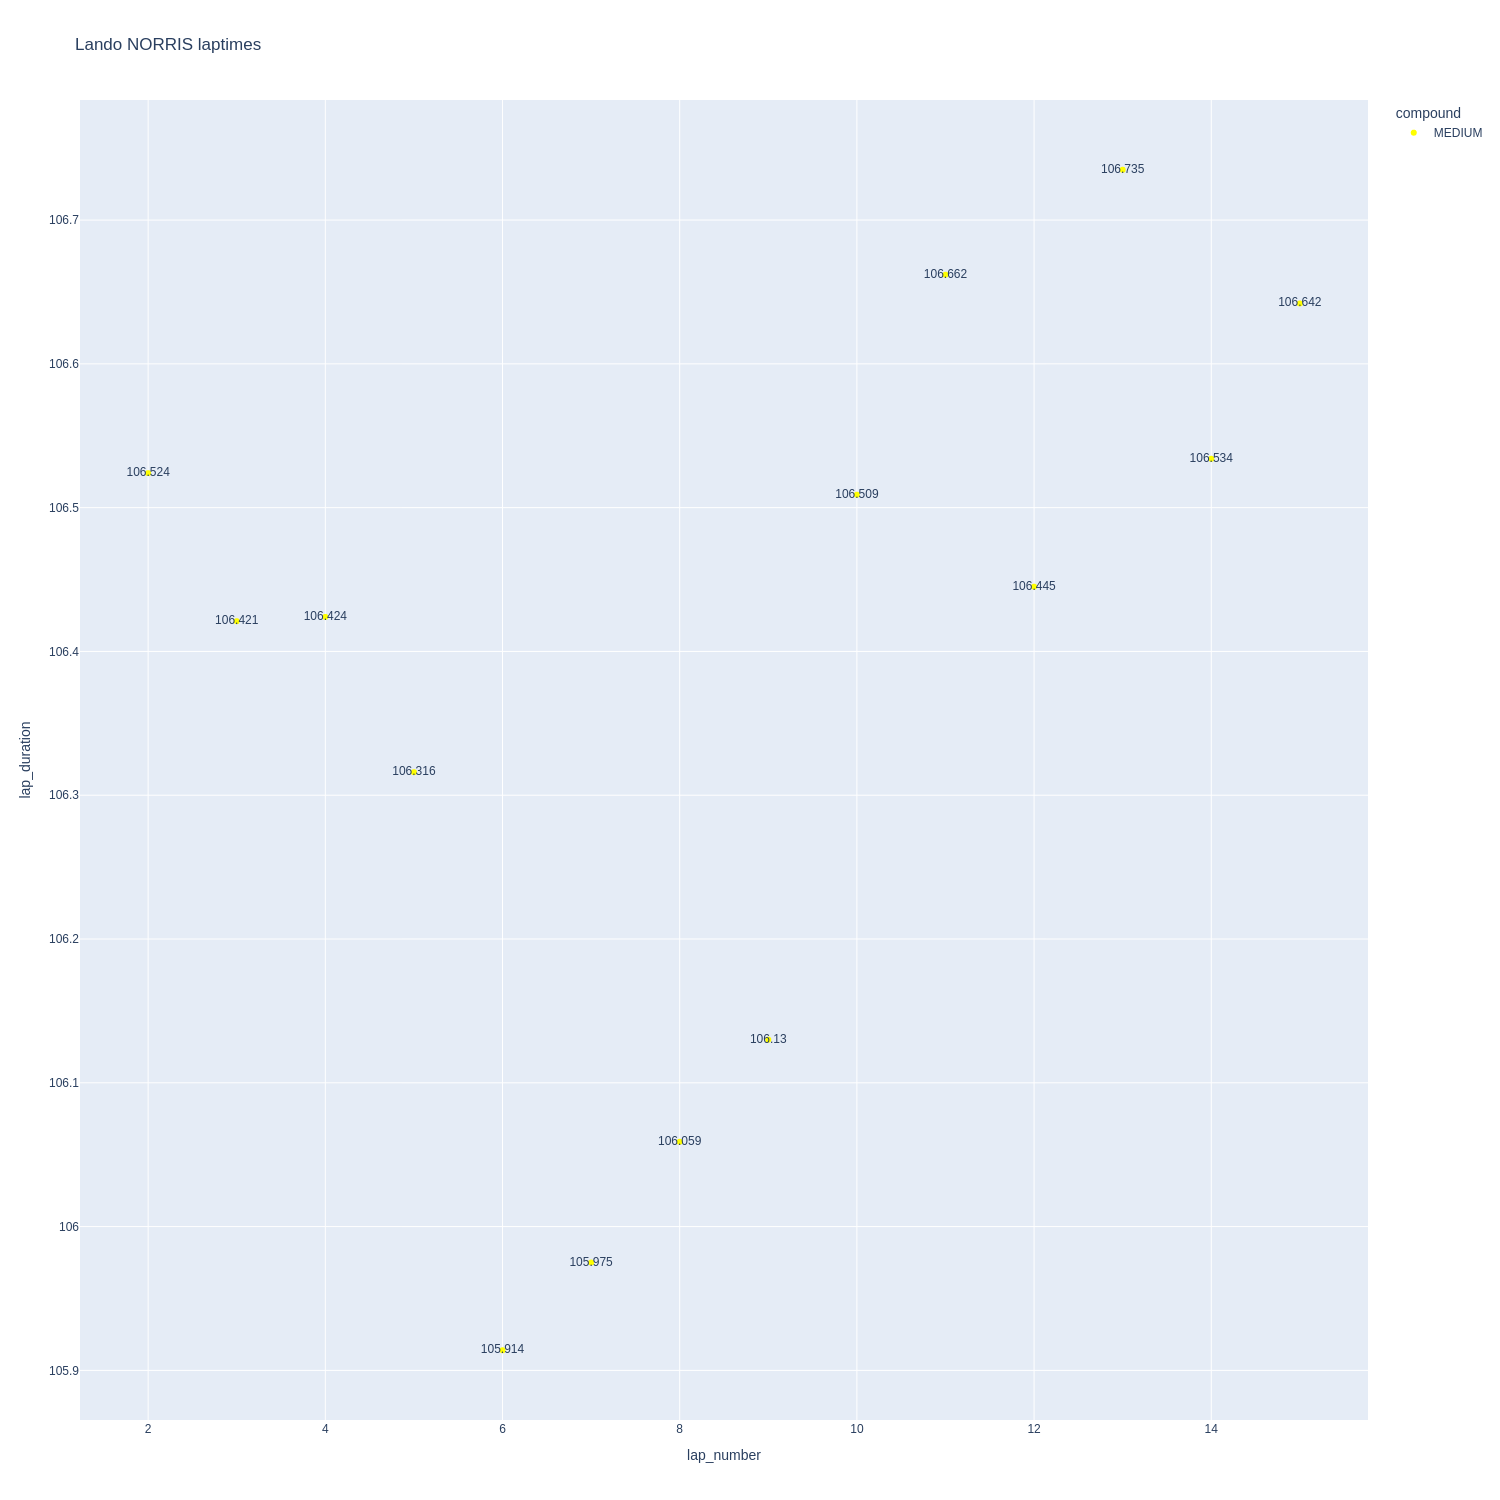

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

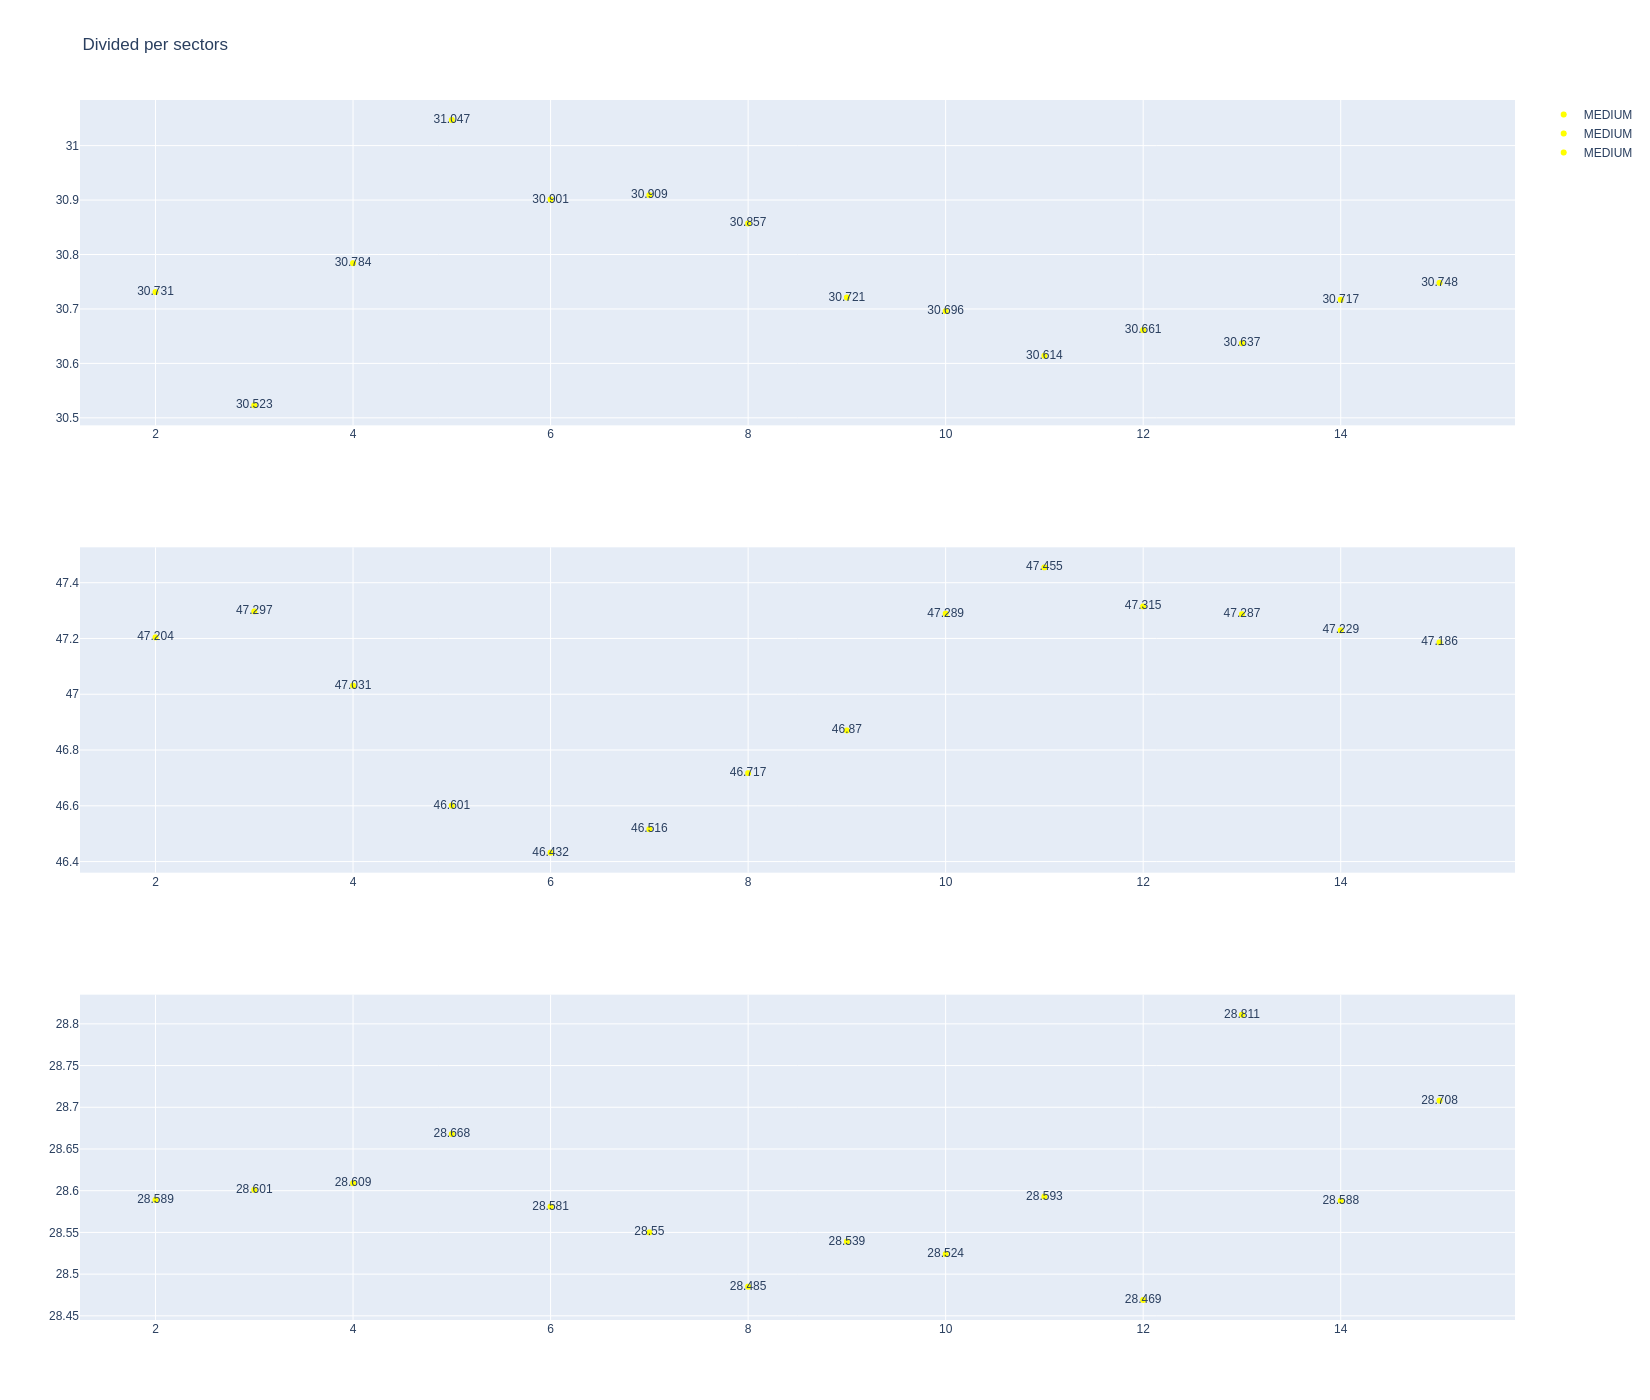

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [49]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
1    Oscar PIASTRI   MEDIUM  2025-07-26T10:05:41.177000+00:00           2   
20   Oscar PIASTRI   MEDIUM  2025-07-26T10:07:27.384000+00:00           3   
39   Oscar PIASTRI   MEDIUM  2025-07-26T10:09:13.677000+00:00           4   
59   Oscar PIASTRI   MEDIUM  2025-07-26T10:10:59.900000+00:00           5   
79   Oscar PIASTRI   MEDIUM  2025-07-26T10:12:46.244000+00:00           6   
99   Oscar PIASTRI   MEDIUM  2025-07-26T10:14:32.341000+00:00           7   
119  Oscar PIASTRI   MEDIUM  2025-07-26T10:16:18.950000+00:00           8   
139  Oscar PIASTRI   MEDIUM  2025-07-26T10:18:05.134000+00:00           9   
159  Oscar PIASTRI   MEDIUM  2025-07-26T10:19:51.611000+00:00          10   
179  Oscar PIASTRI   MEDIUM  2025-07-26T10:21:38.158000+00:00          11   
199  Oscar PIASTRI   MEDIUM  2025-07-26T10:23:24.799000+00:00          12   
219  Oscar PIASTRI   MEDIUM  2025-07-26T10:25:11.318000+00:00          13   
239  Oscar PIASTRI   MEDIUM  2025-07-26T10:26:57.866000+00:00          14   
259  Oscar PIASTRI   MEDIUM  2025-07-26T10:28:44.382000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
1               30.509             47.141             28.534       106.184  
20              30.762             46.830             28.645       106.237  
39              30.713             47.016             28.643       106.372  
59              30.664             46.989             28.641       106.294  
79              30.686             46.816             28.559       106.061  
99              30.822             47.101             28.643       106.566  
119             30.734             46.966             28.591       106.291  
139             30.531             47.235             28.669       106.435  
159             30.709             47.295             28.532       106.536  
179             30.601             47.481             28.581       106.663  
199             30.727             47.227             28.577       106.531  
219             30.717             47.037             28.735       106.489  
239             30.731             47.207             28.615       106.553  
259             30.708             47.393             28.641       106.742

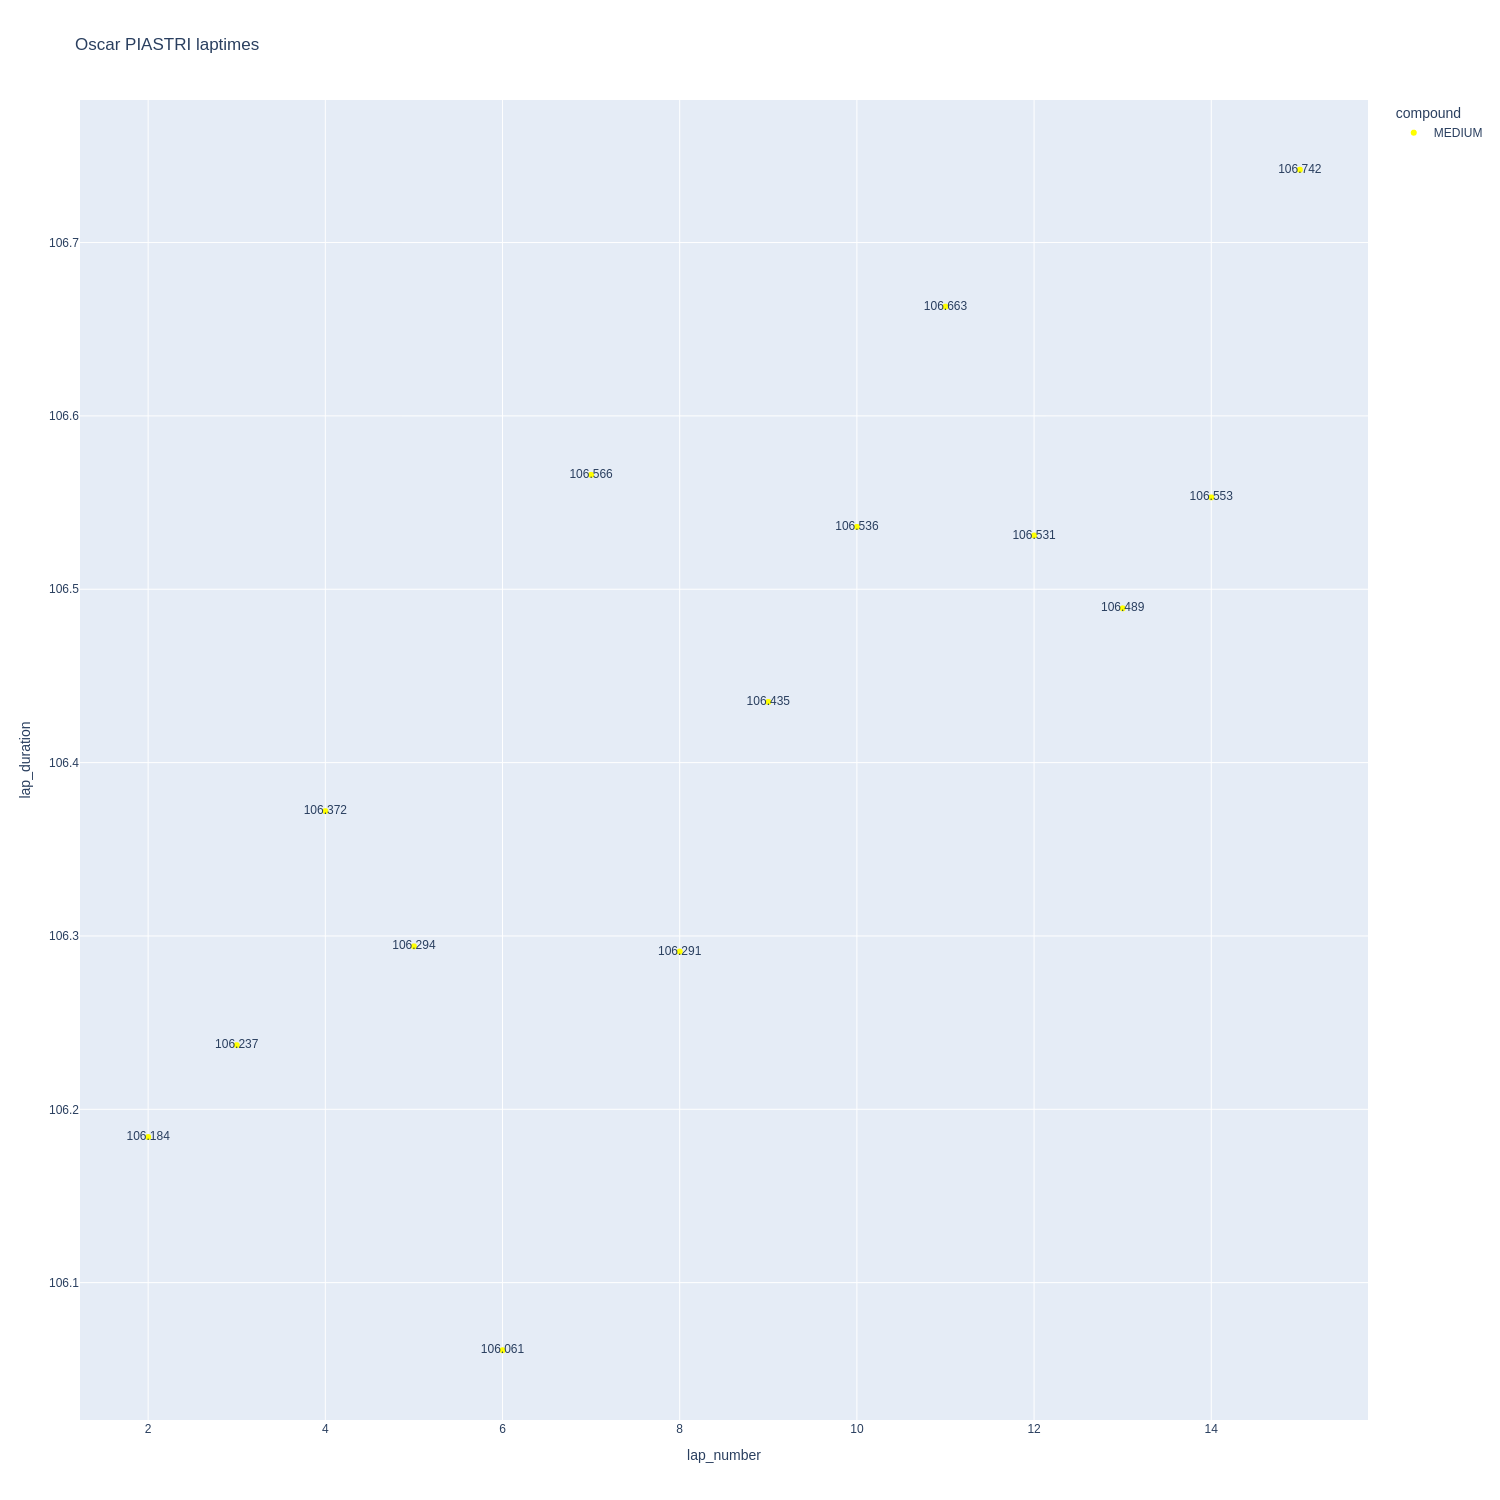

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

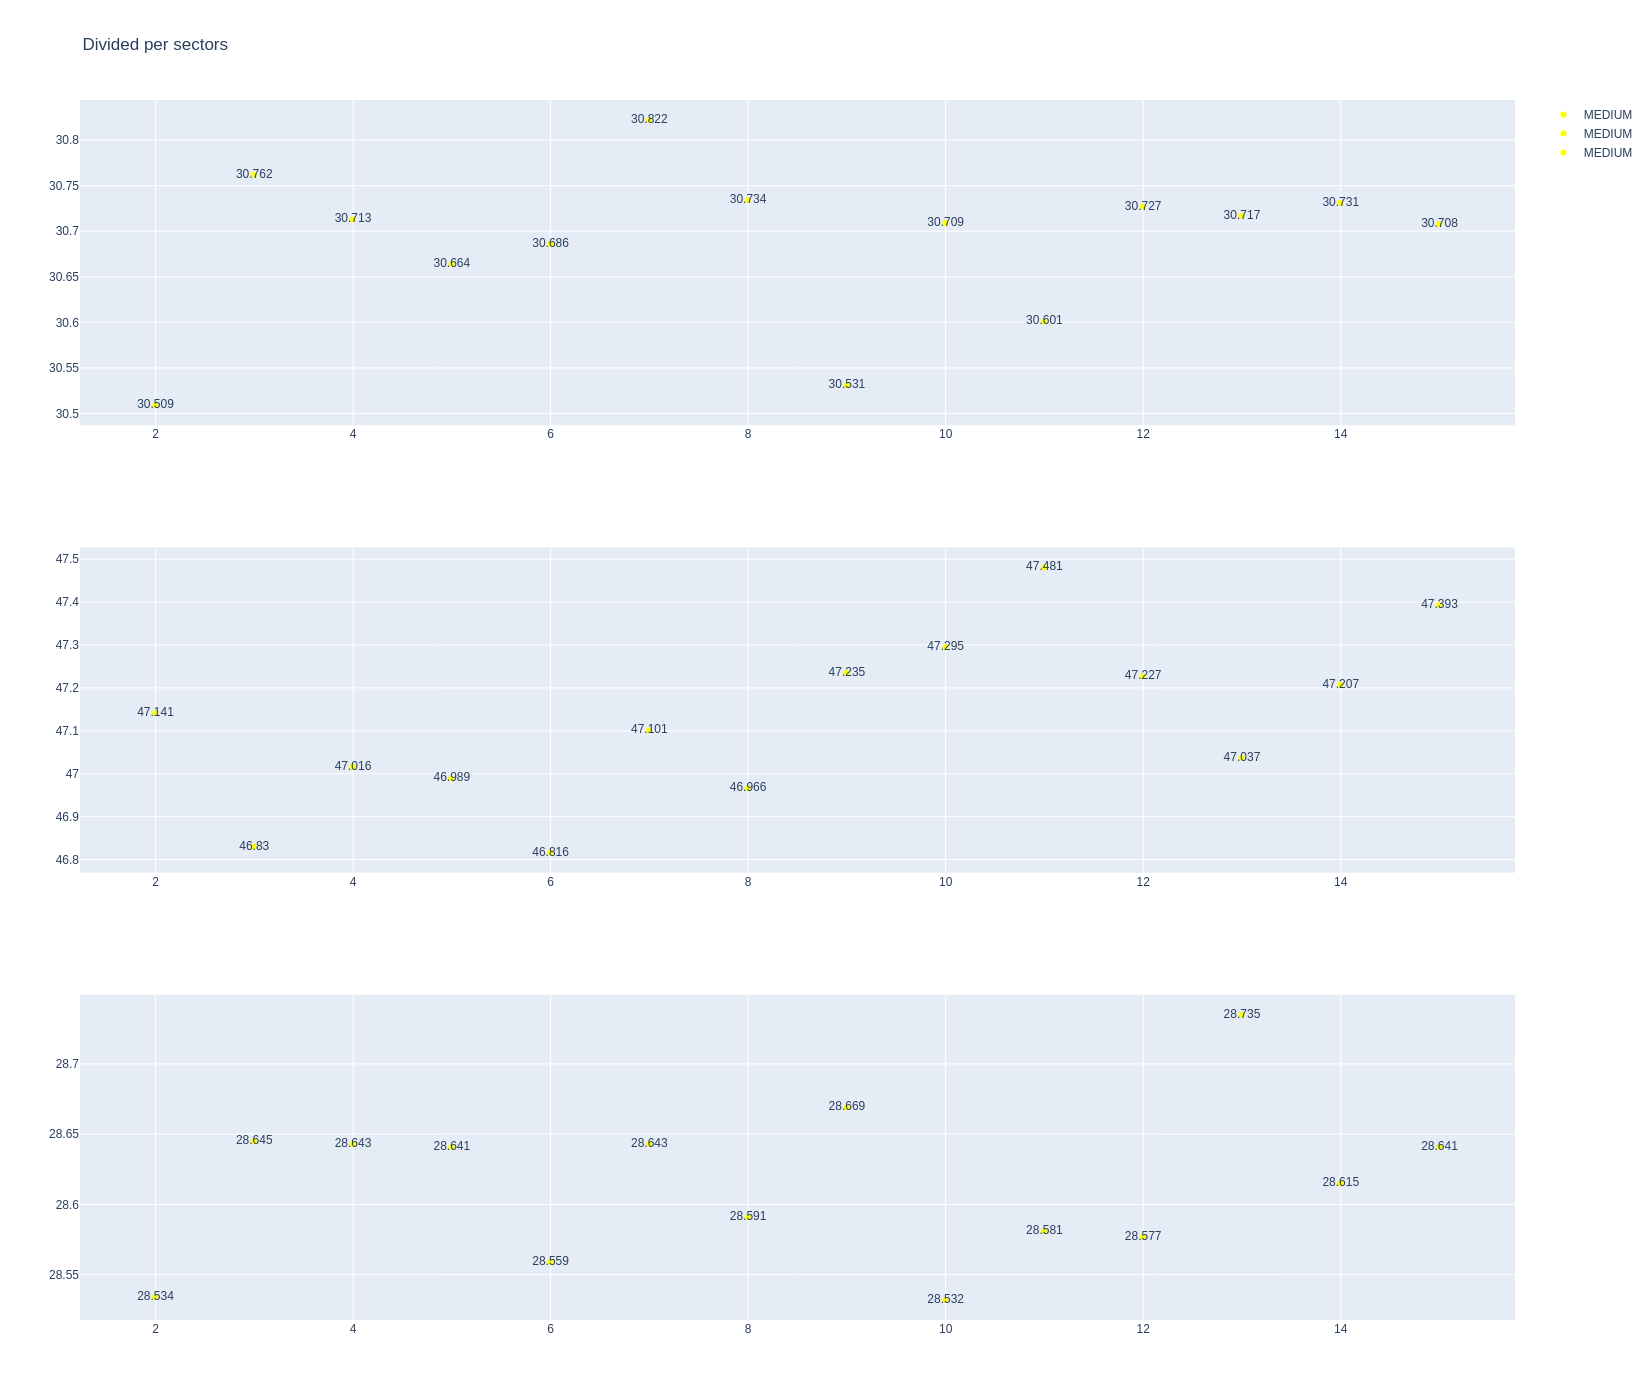

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [52]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6         1265         9934             1             14          1       15   
8         1265         9934             1             18          1       15   

  compound  tyre_age_at_start  
6   MEDIUM                  3  
8   MEDIUM                  3

In [53]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
13   Fernando ALONSO   MEDIUM  2025-07-26T10:05:48.622000+00:00           2   
32   Fernando ALONSO   MEDIUM  2025-07-26T10:07:36.974000+00:00           3   
51   Fernando ALONSO   MEDIUM  2025-07-26T10:09:24.749000+00:00           4   
71   Fernando ALONSO   MEDIUM  2025-07-26T10:11:12.213000+00:00           5   
91   Fernando ALONSO   MEDIUM  2025-07-26T10:12:59.663000+00:00           6   
111  Fernando ALONSO   MEDIUM  2025-07-26T10:14:47.256000+00:00           7   
131  Fernando ALONSO   MEDIUM  2025-07-26T10:16:35.051000+00:00           8   
151  Fernando ALONSO   MEDIUM  2025-07-26T10:18:22.942000+00:00           9   
171  Fernando ALONSO   MEDIUM  2025-07-26T10:20:10.970000+00:00          10   
191  Fernando ALONSO   MEDIUM  2025-07-26T10:21:58.672000+00:00          11   
211  Fernando ALONSO   MEDIUM  2025-07-26T10:23:46.468000+00:00          12   
231  Fernando ALONSO   MEDIUM  2025-07-26T10:25:34.506000+00:00          13   
251  Fernando ALONSO   MEDIUM  2025-07-26T10:27:23.015000+00:00          14   
271  Fernando ALONSO   MEDIUM  2025-07-26T10:29:11.216000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
13              30.418             49.316             28.736       108.470  
32              30.544             48.497             28.673       107.714  
51              30.605             48.219             28.673       107.497  
71              30.611             48.128             28.705       107.444  
91              30.555             48.321             28.728       107.604  
111             30.548             48.466             28.671       107.685  
131             30.607             48.665             28.694       107.966  
151             30.618             48.659             28.685       107.962  
171             30.593             48.255             28.853       107.701  
191             30.691             48.364             28.753       107.808  
211             30.655             48.690             28.762       108.107  
231             30.801             48.805             28.899       108.505  
251             30.856             48.504             28.825       108.185  
271             30.926             48.502             28.750       108.178

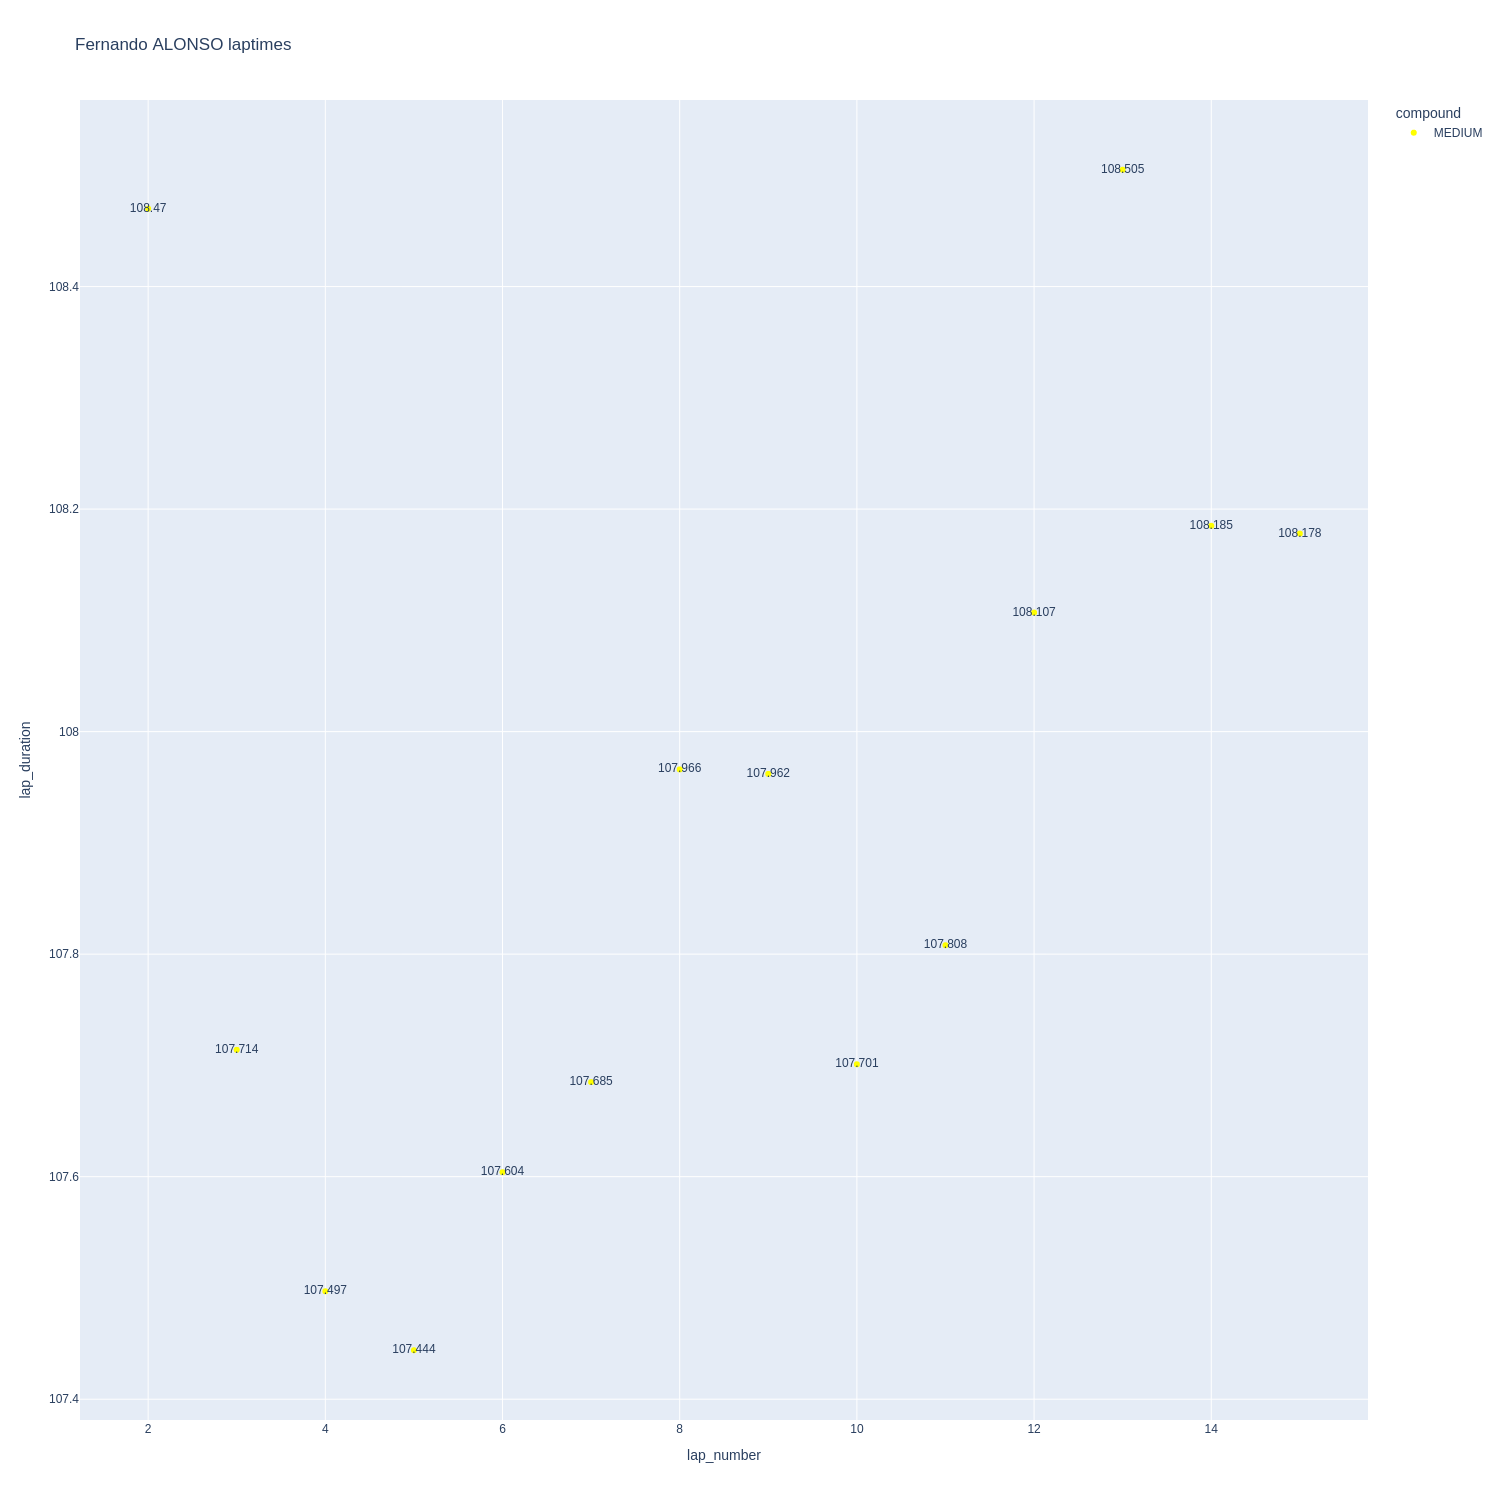

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

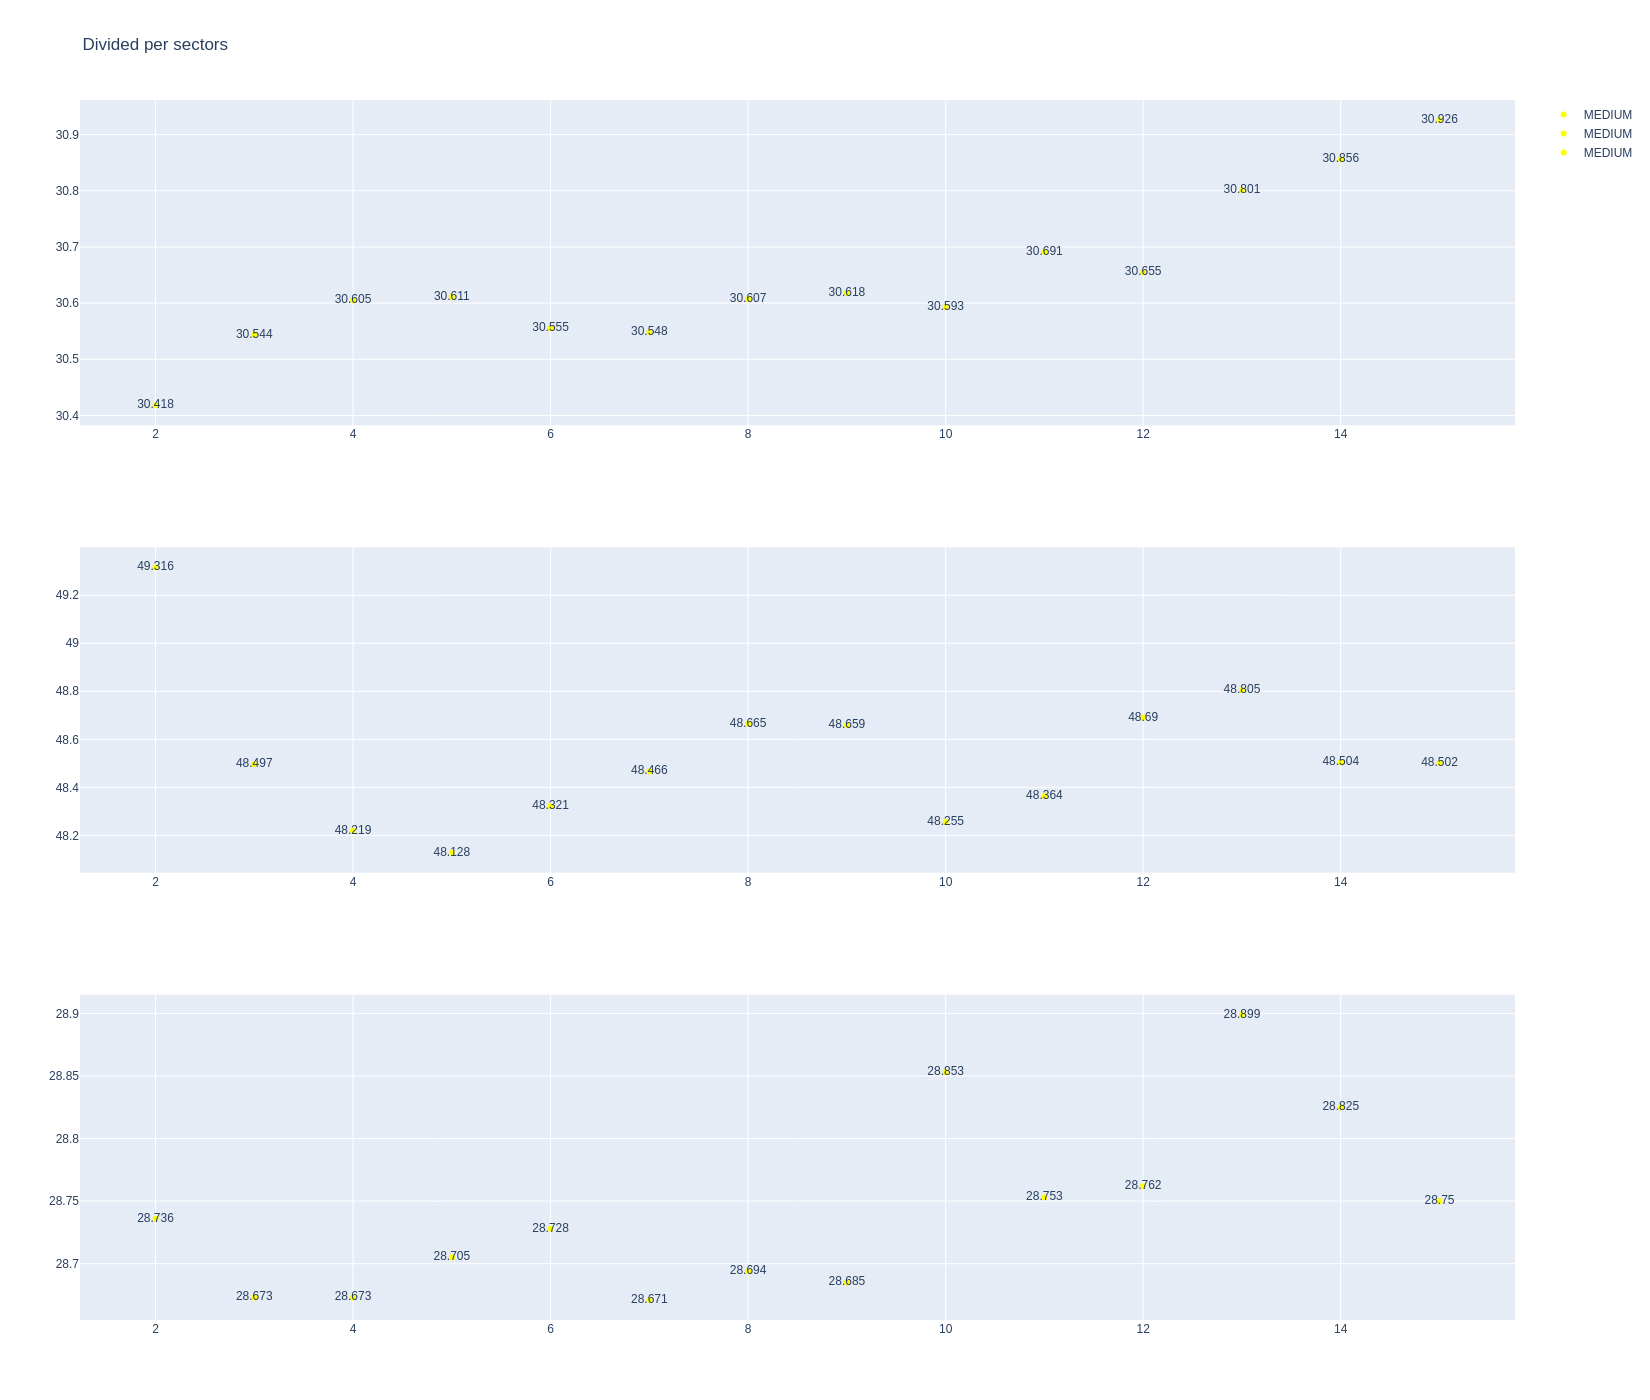

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [56]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
12   Lance STROLL   MEDIUM  2025-07-26T10:05:48.119000+00:00           2   
31   Lance STROLL   MEDIUM  2025-07-26T10:07:36.318000+00:00           3   
50   Lance STROLL   MEDIUM  2025-07-26T10:09:24.016000+00:00           4   
70   Lance STROLL   MEDIUM  2025-07-26T10:11:11.400000+00:00           5   
90   Lance STROLL   MEDIUM  2025-07-26T10:12:58.816000+00:00           6   
110  Lance STROLL   MEDIUM  2025-07-26T10:14:46.629000+00:00           7   
130  Lance STROLL   MEDIUM  2025-07-26T10:16:34.223000+00:00           8   
150  Lance STROLL   MEDIUM  2025-07-26T10:18:22.371000+00:00           9   
170  Lance STROLL   MEDIUM  2025-07-26T10:20:09.926000+00:00          10   
190  Lance STROLL   MEDIUM  2025-07-26T10:21:57.801000+00:00          11   
210  Lance STROLL   MEDIUM  2025-07-26T10:23:45.593000+00:00          12   
230  Lance STROLL   MEDIUM  2025-07-26T10:25:33.522000+00:00          13   
250  Lance STROLL   MEDIUM  2025-07-26T10:27:21.257000+00:00          14   
270  Lance STROLL   MEDIUM  2025-07-26T10:29:08.998000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
12              30.556             49.030             28.612       108.198  
31              30.362             48.546             28.733       107.641  
50              30.385             48.374             28.676       107.435  
70              30.418             48.206             28.683       107.307  
90              30.500             48.612             28.703       107.815  
110             30.546             48.459             28.614       107.619  
130             30.545             48.896             28.666       108.107  
150             30.576             48.394             28.685       107.655  
170             30.637             48.411             28.799       107.847  
190             30.746             48.260             28.847       107.853  
210             30.757             48.356             28.716       107.829  
230             30.803             48.217             28.772       107.792  
250             30.613             48.368             28.739       107.720  
270             30.496             48.694             28.758       107.948

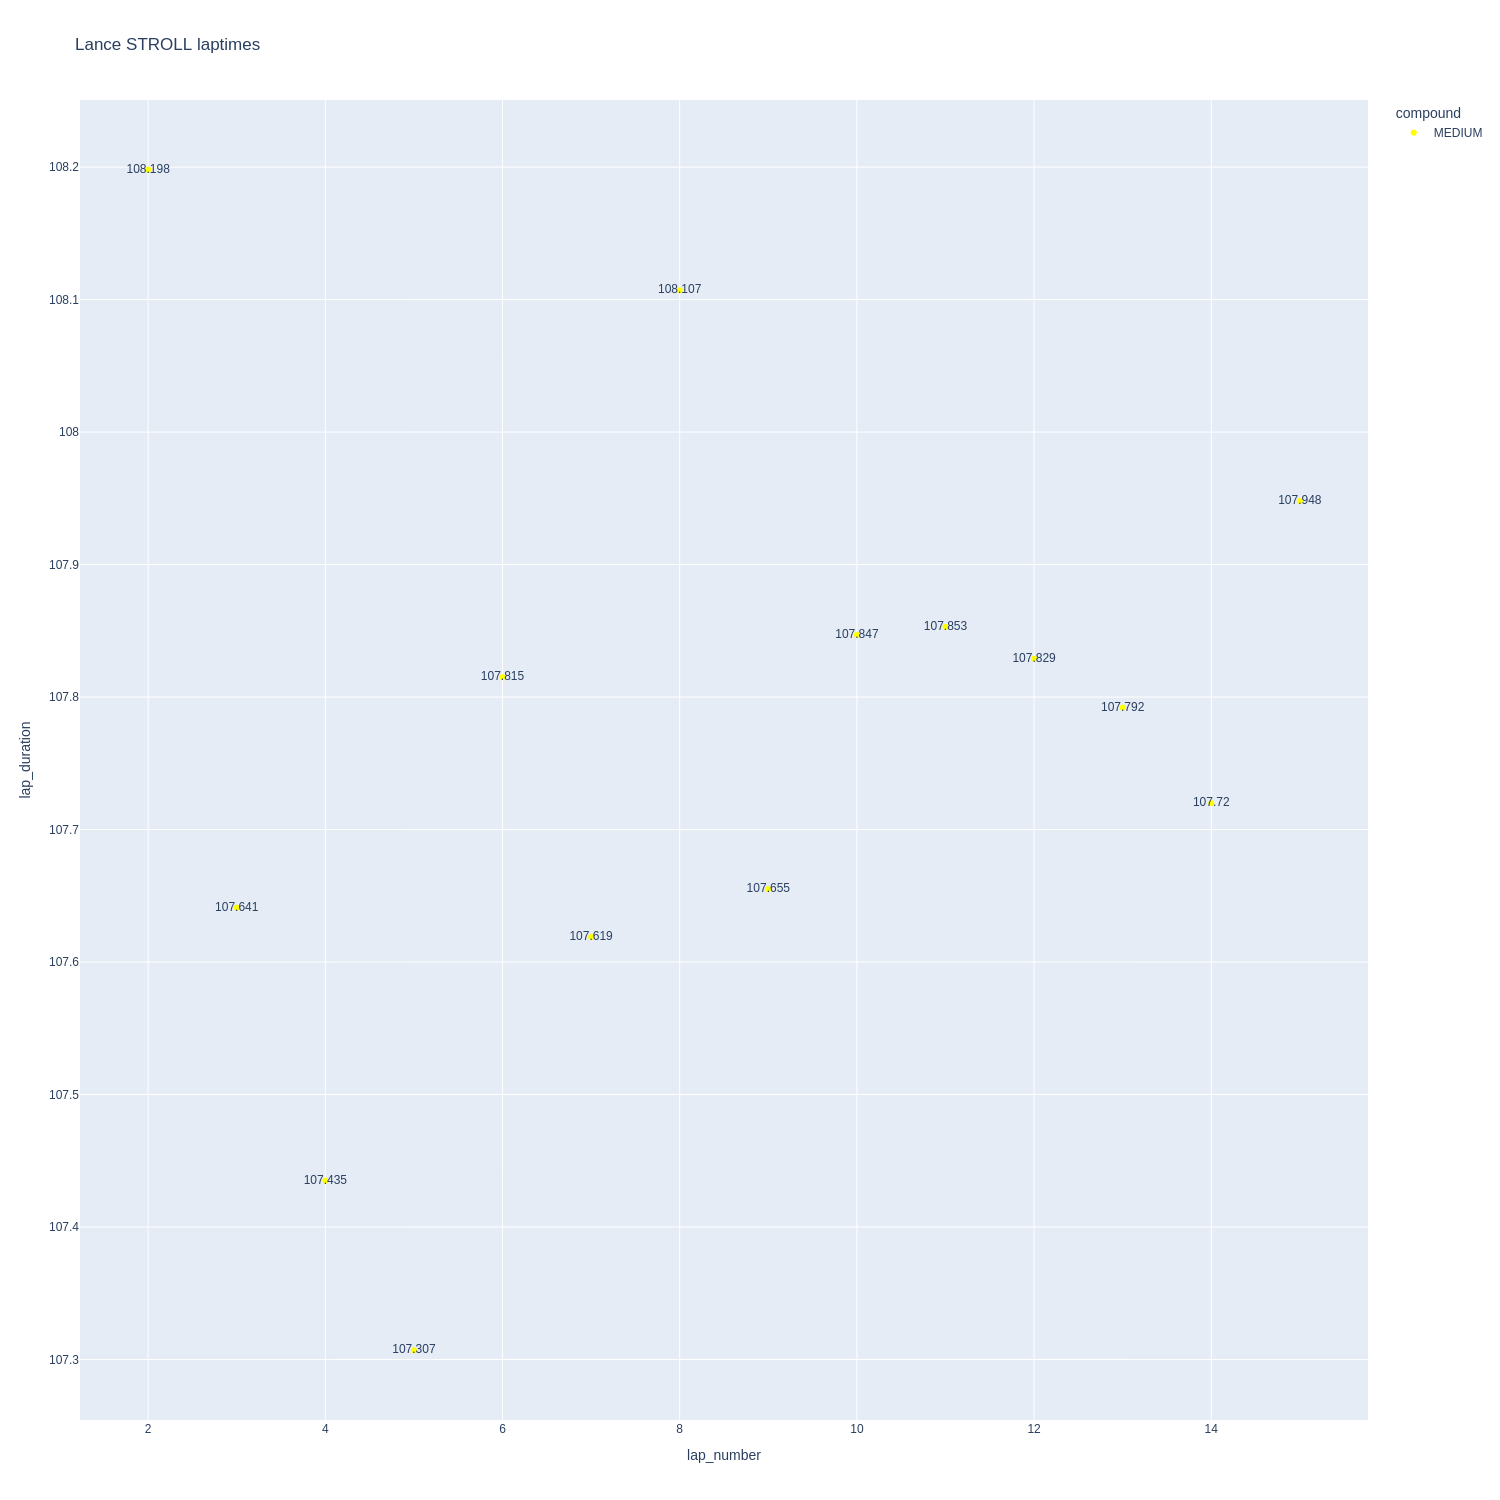

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

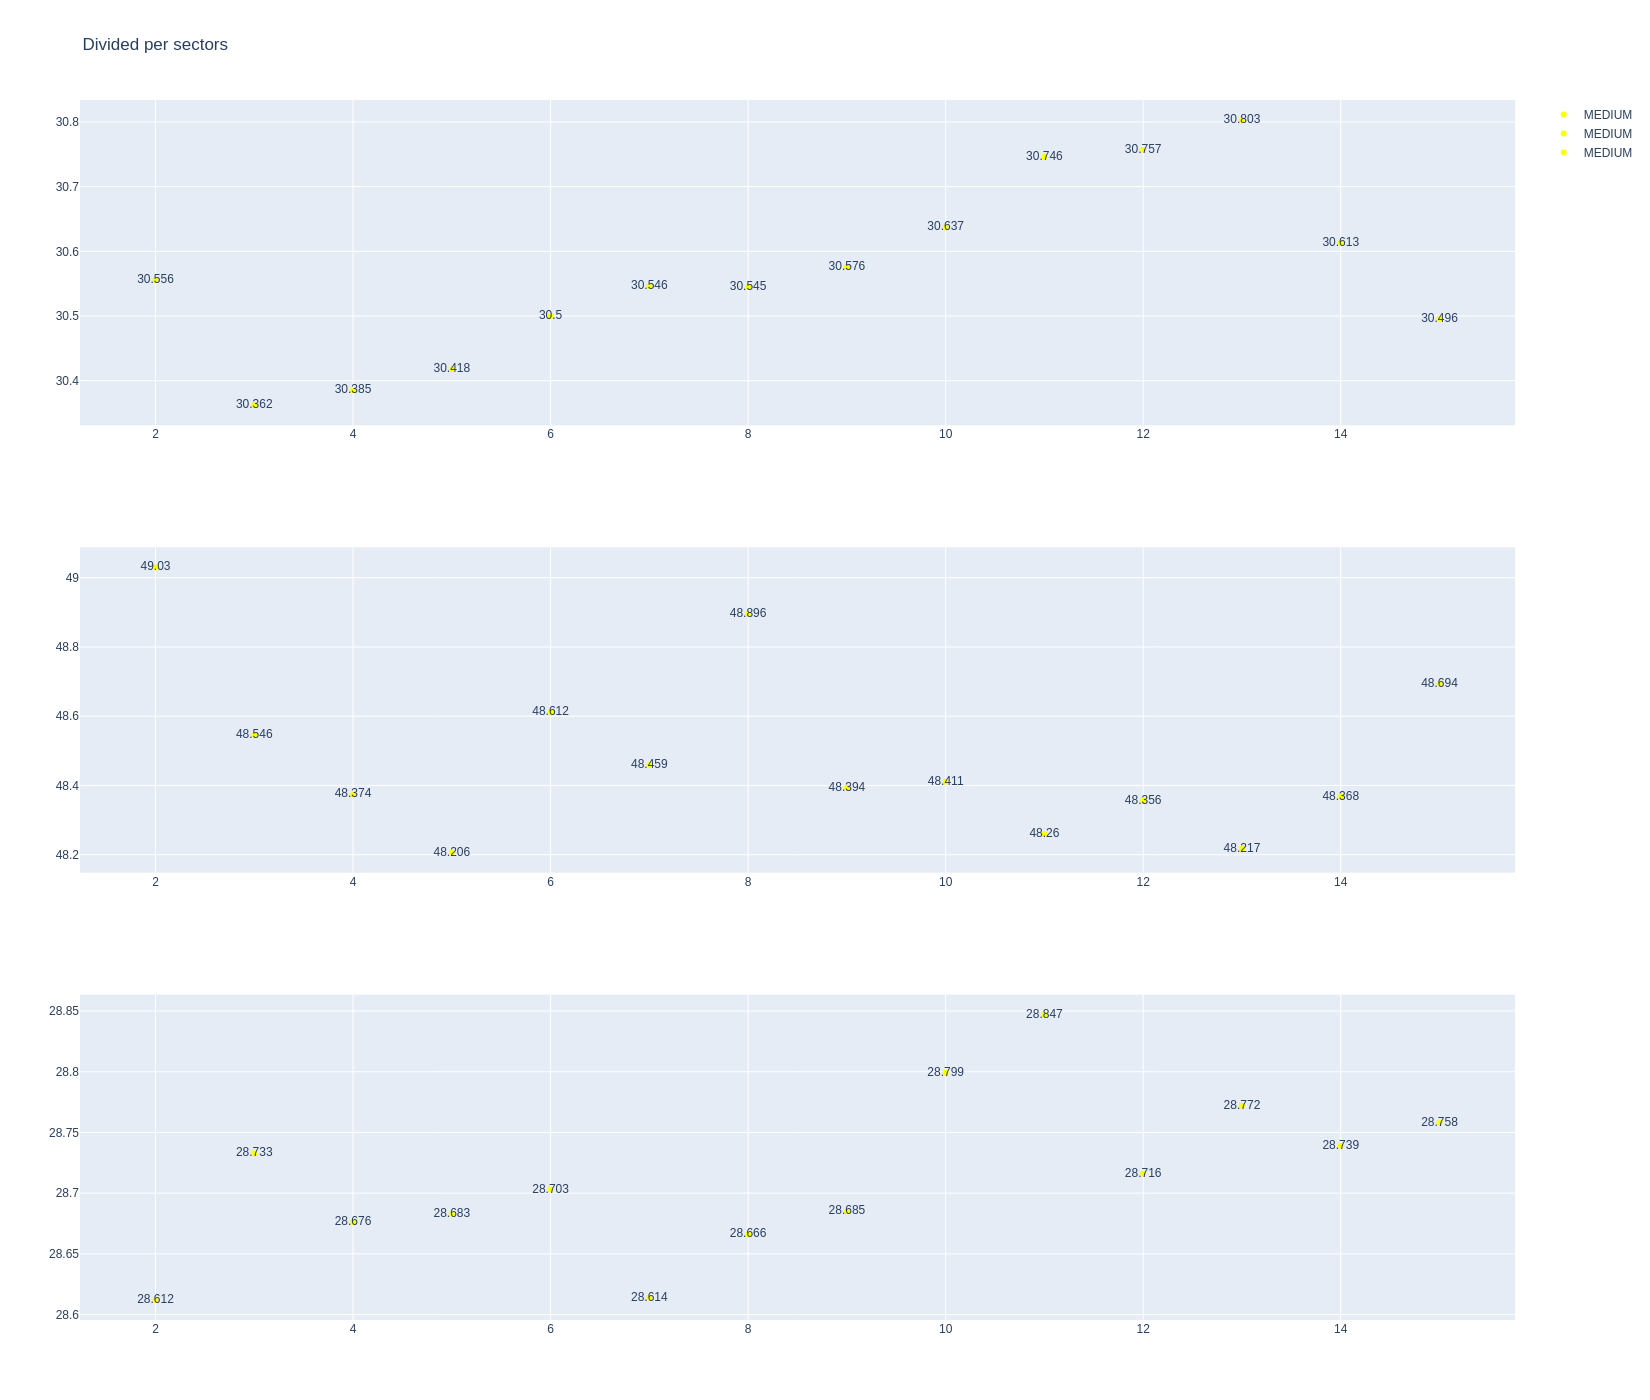

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [59]:
stintInformation.query('driver_number == 6 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4         1265         9934             1              6          1       15   
9         1265         9934             1             22          1       15   

  compound  tyre_age_at_start  
4   MEDIUM                  0  
9   MEDIUM                  5

In [60]:
data = libraryDataF1.getinfolongruns(jointables,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
7    Isack HADJAR   MEDIUM  2025-07-26T10:05:45.482000+00:00           2   
26   Isack HADJAR   MEDIUM  2025-07-26T10:07:32.521000+00:00           3   
45   Isack HADJAR   MEDIUM  2025-07-26T10:09:19.939000+00:00           4   
65   Isack HADJAR   MEDIUM  2025-07-26T10:11:07.259000+00:00           5   
85   Isack HADJAR   MEDIUM  2025-07-26T10:12:54.962000+00:00           6   
105  Isack HADJAR   MEDIUM  2025-07-26T10:14:42.081000+00:00           7   
125  Isack HADJAR   MEDIUM  2025-07-26T10:16:29.490000+00:00           8   
145  Isack HADJAR   MEDIUM  2025-07-26T10:18:16.771000+00:00           9   
165  Isack HADJAR   MEDIUM  2025-07-26T10:20:04.192000+00:00          10   
185  Isack HADJAR   MEDIUM  2025-07-26T10:21:51.590000+00:00          11   
205  Isack HADJAR   MEDIUM  2025-07-26T10:23:38.812000+00:00          12   
225  Isack HADJAR   MEDIUM  2025-07-26T10:25:26.178000+00:00          13   
245  Isack HADJAR   MEDIUM  2025-07-26T10:27:13.797000+00:00          14   
265  Isack HADJAR   MEDIUM  2025-07-26T10:29:01.739000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
7               30.810             47.558             28.605       106.973  
26              30.690             48.215             28.611       107.516  
45              30.795             47.733             28.726       107.254  
65              30.818             48.068             28.822       107.708  
85              30.995             47.503             28.652       107.150  
105             31.232             47.486             28.661       107.379  
125             30.834             47.725             28.730       107.289  
145             30.880             47.812             28.681       107.373  
165             30.837             47.649             28.810       107.296  
185             30.945             47.575             28.908       107.428  
205             30.963             47.620             28.704       107.287  
225             31.029             47.782             28.768       107.579  
245             31.005             48.106             28.920       108.031  
265             31.029             47.914             28.765       107.708

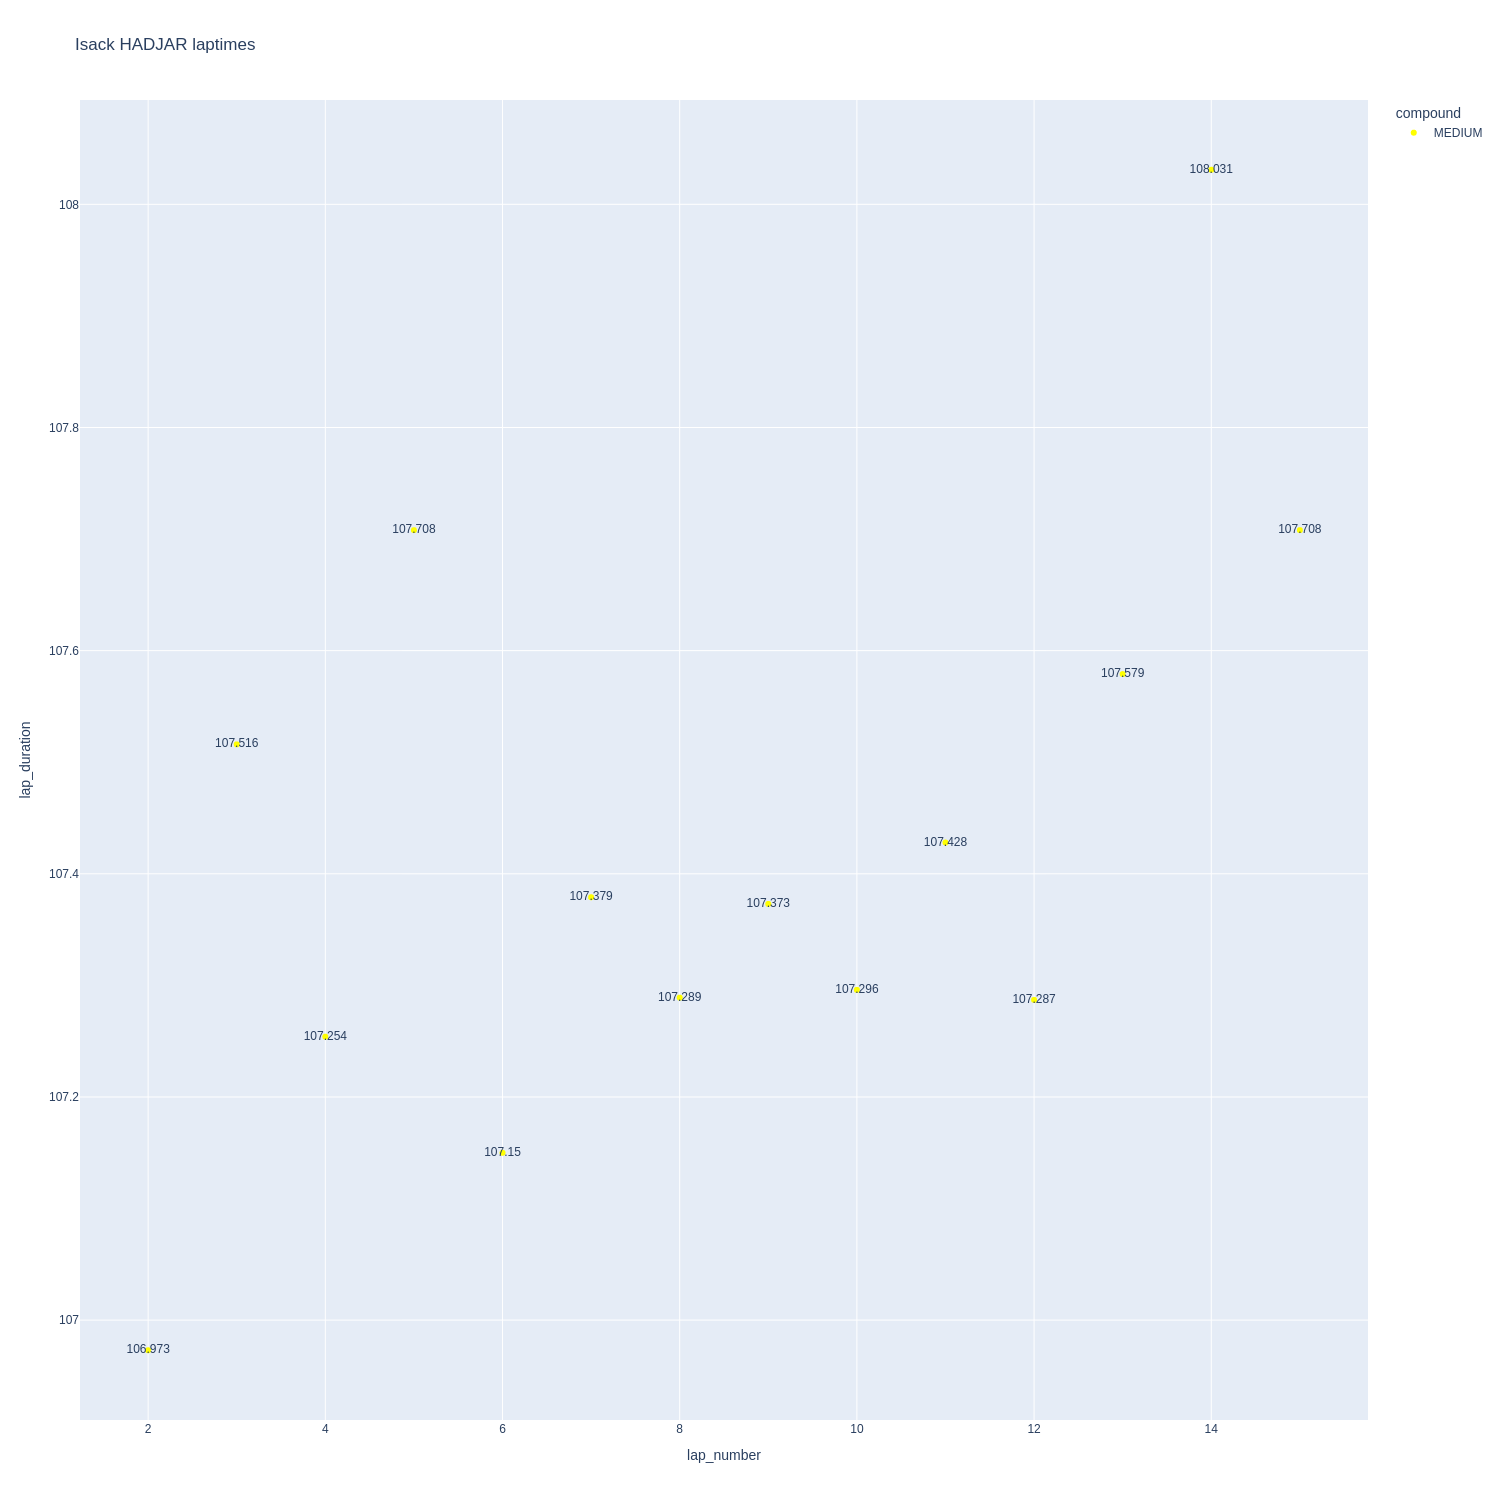

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

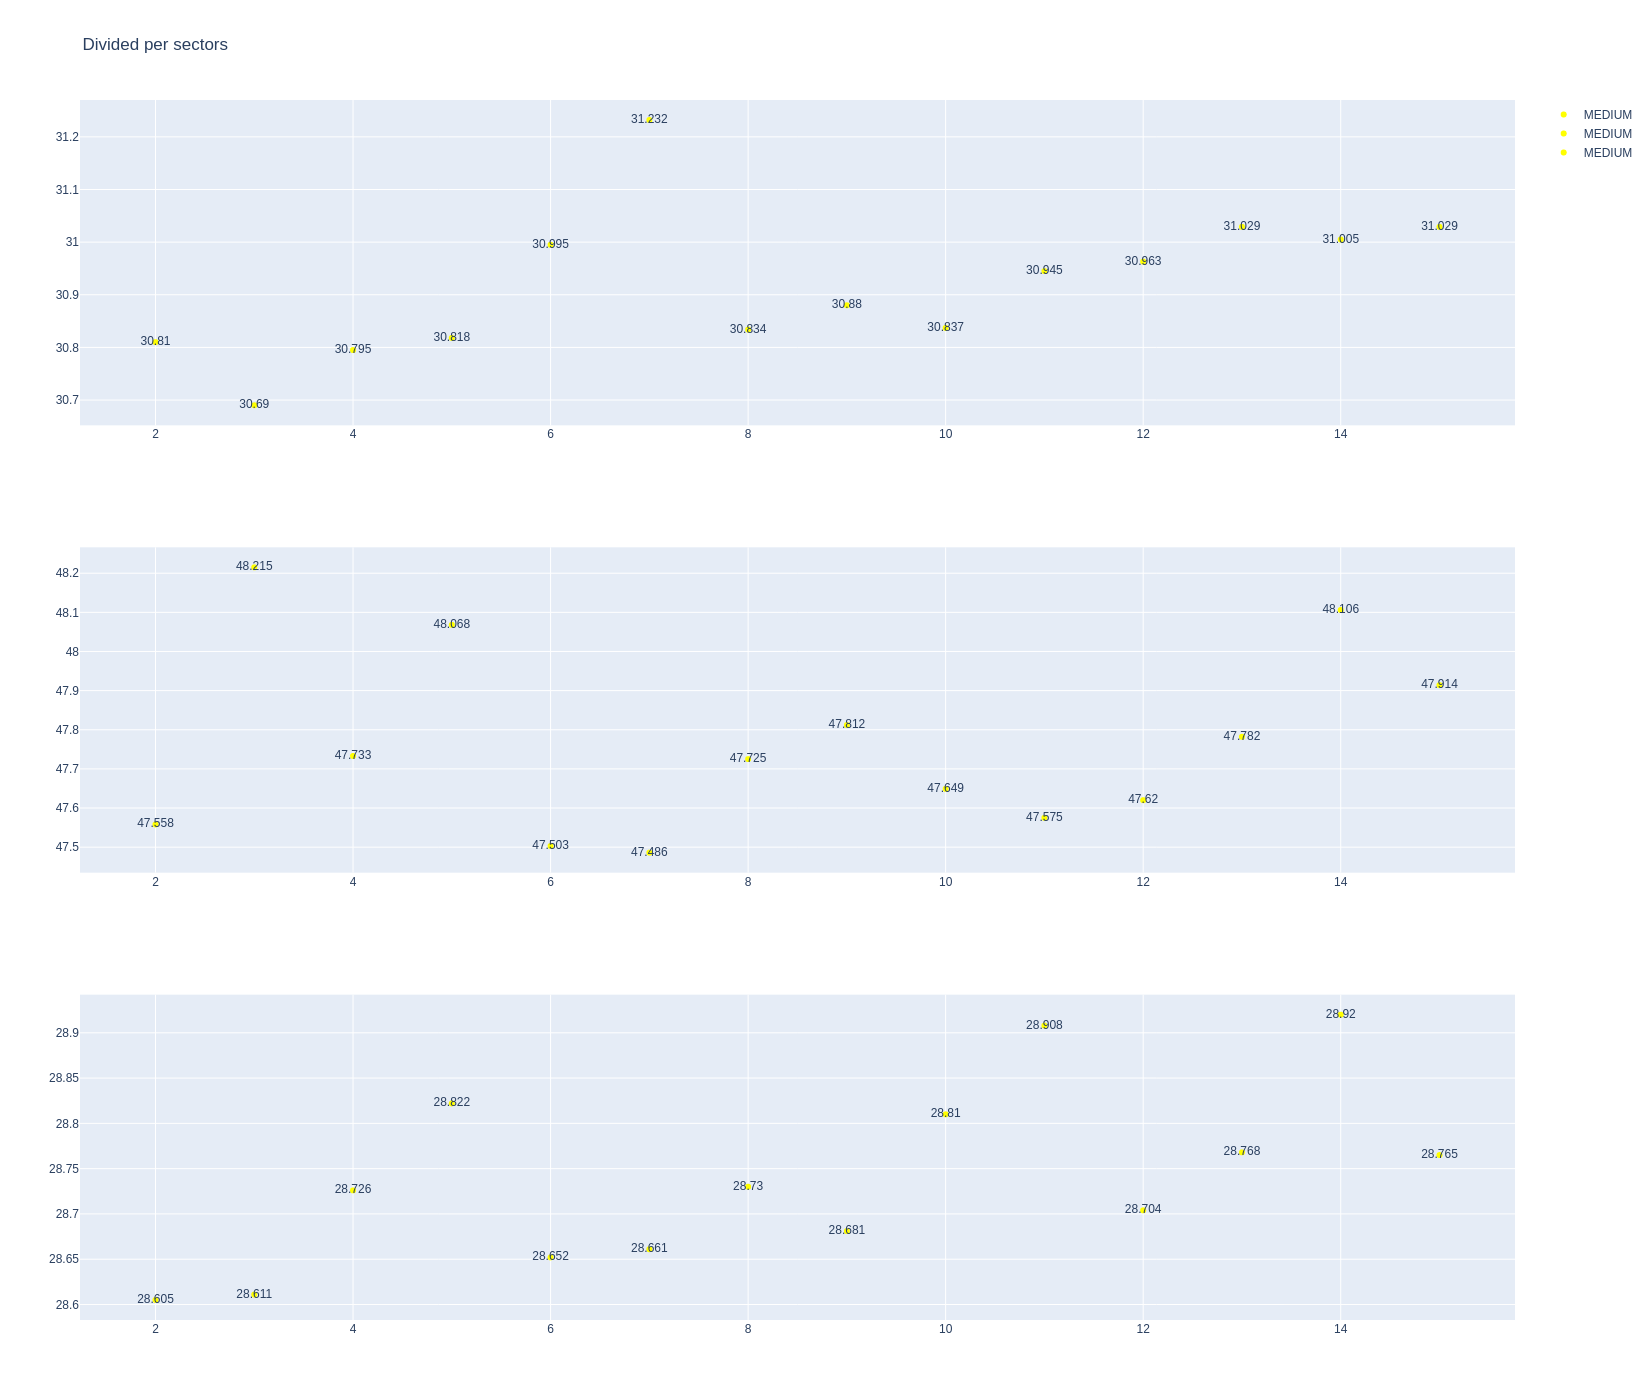

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [63]:
data = libraryDataF1.getinfolongruns(jointables,22,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [66]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1265         9934             1             31          1       15   
19         1265         9934             1             87          1       15   

   compound  tyre_age_at_start  
13   MEDIUM                  3  
19   MEDIUM                  3

In [67]:
data = libraryDataF1.getinfolongruns(jointables,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
4    Esteban OCON   MEDIUM  2025-07-26T10:05:43.409000+00:00           2   
23   Esteban OCON   MEDIUM  2025-07-26T10:07:30.261000+00:00           3   
42   Esteban OCON   MEDIUM  2025-07-26T10:09:17.339000+00:00           4   
62   Esteban OCON   MEDIUM  2025-07-26T10:11:04.494000+00:00           5   
82   Esteban OCON   MEDIUM  2025-07-26T10:12:51.741000+00:00           6   
102  Esteban OCON   MEDIUM  2025-07-26T10:14:38.783000+00:00           7   
122  Esteban OCON   MEDIUM  2025-07-26T10:16:25.599000+00:00           8   
142  Esteban OCON   MEDIUM  2025-07-26T10:18:12.641000+00:00           9   
162  Esteban OCON   MEDIUM  2025-07-26T10:19:59.955000+00:00          10   
182  Esteban OCON   MEDIUM  2025-07-26T10:21:46.983000+00:00          11   
202  Esteban OCON   MEDIUM  2025-07-26T10:23:34.237000+00:00          12   
222  Esteban OCON   MEDIUM  2025-07-26T10:25:21.615000+00:00          13   
242  Esteban OCON   MEDIUM  2025-07-26T10:27:09.109000+00:00          14   
262  Esteban OCON   MEDIUM  2025-07-26T10:28:56.637000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
4               30.556             47.634             28.582       106.772  
23              30.774             47.542             28.845       107.161  
42              30.840             47.584             28.707       107.131  
62              30.949             47.574             28.671       107.194  
82              30.859             47.501             28.680       107.040  
102             30.863             47.417             28.568       106.848  
122             30.879             47.552             28.619       107.050  
142             30.947             47.634             28.676       107.257  
162             30.917             47.603             28.599       107.119  
182             30.869             47.682             28.722       107.273  
202             30.981             47.656             28.690       107.327  
222             30.988             47.747             28.733       107.468  
242             31.028             47.749             28.764       107.541  
262             30.907             47.885             28.736       107.528

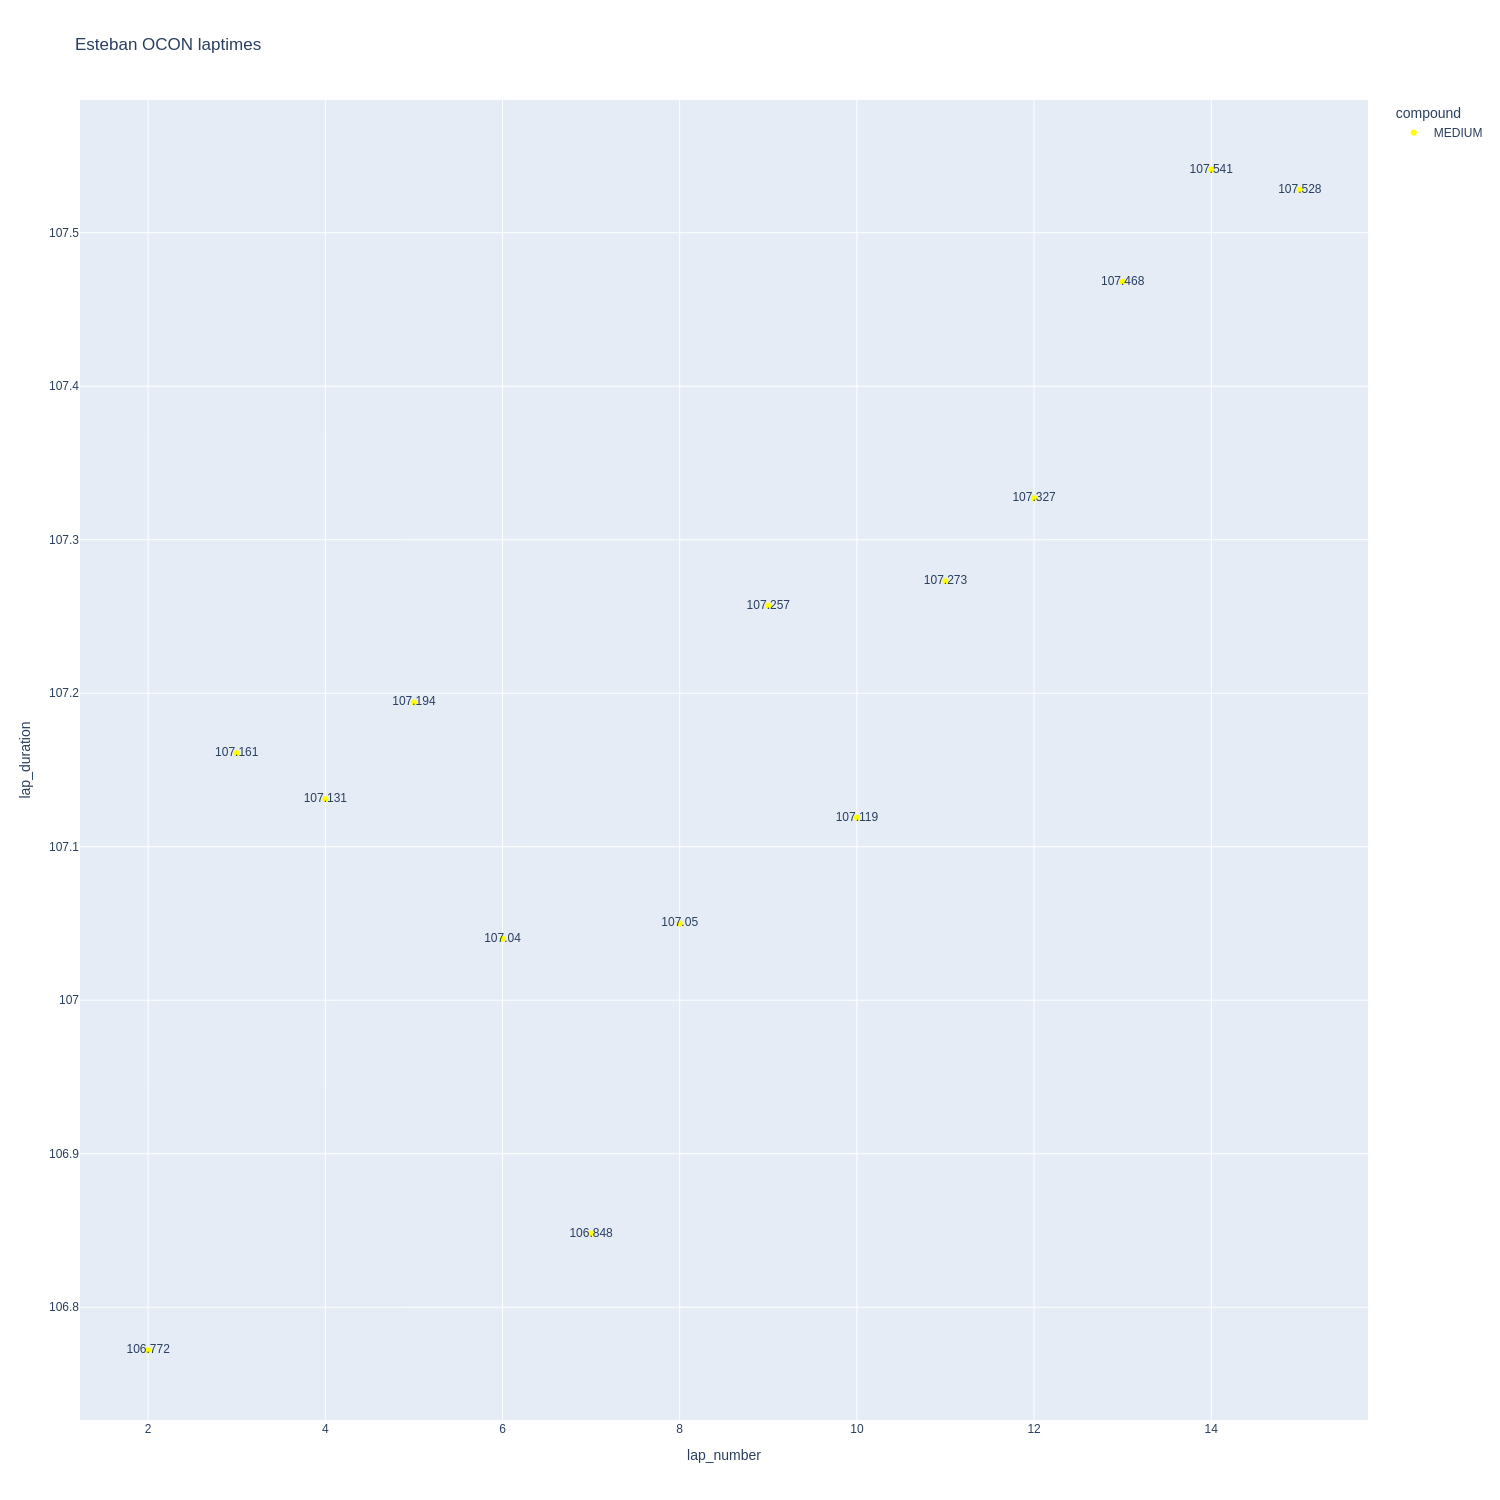

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

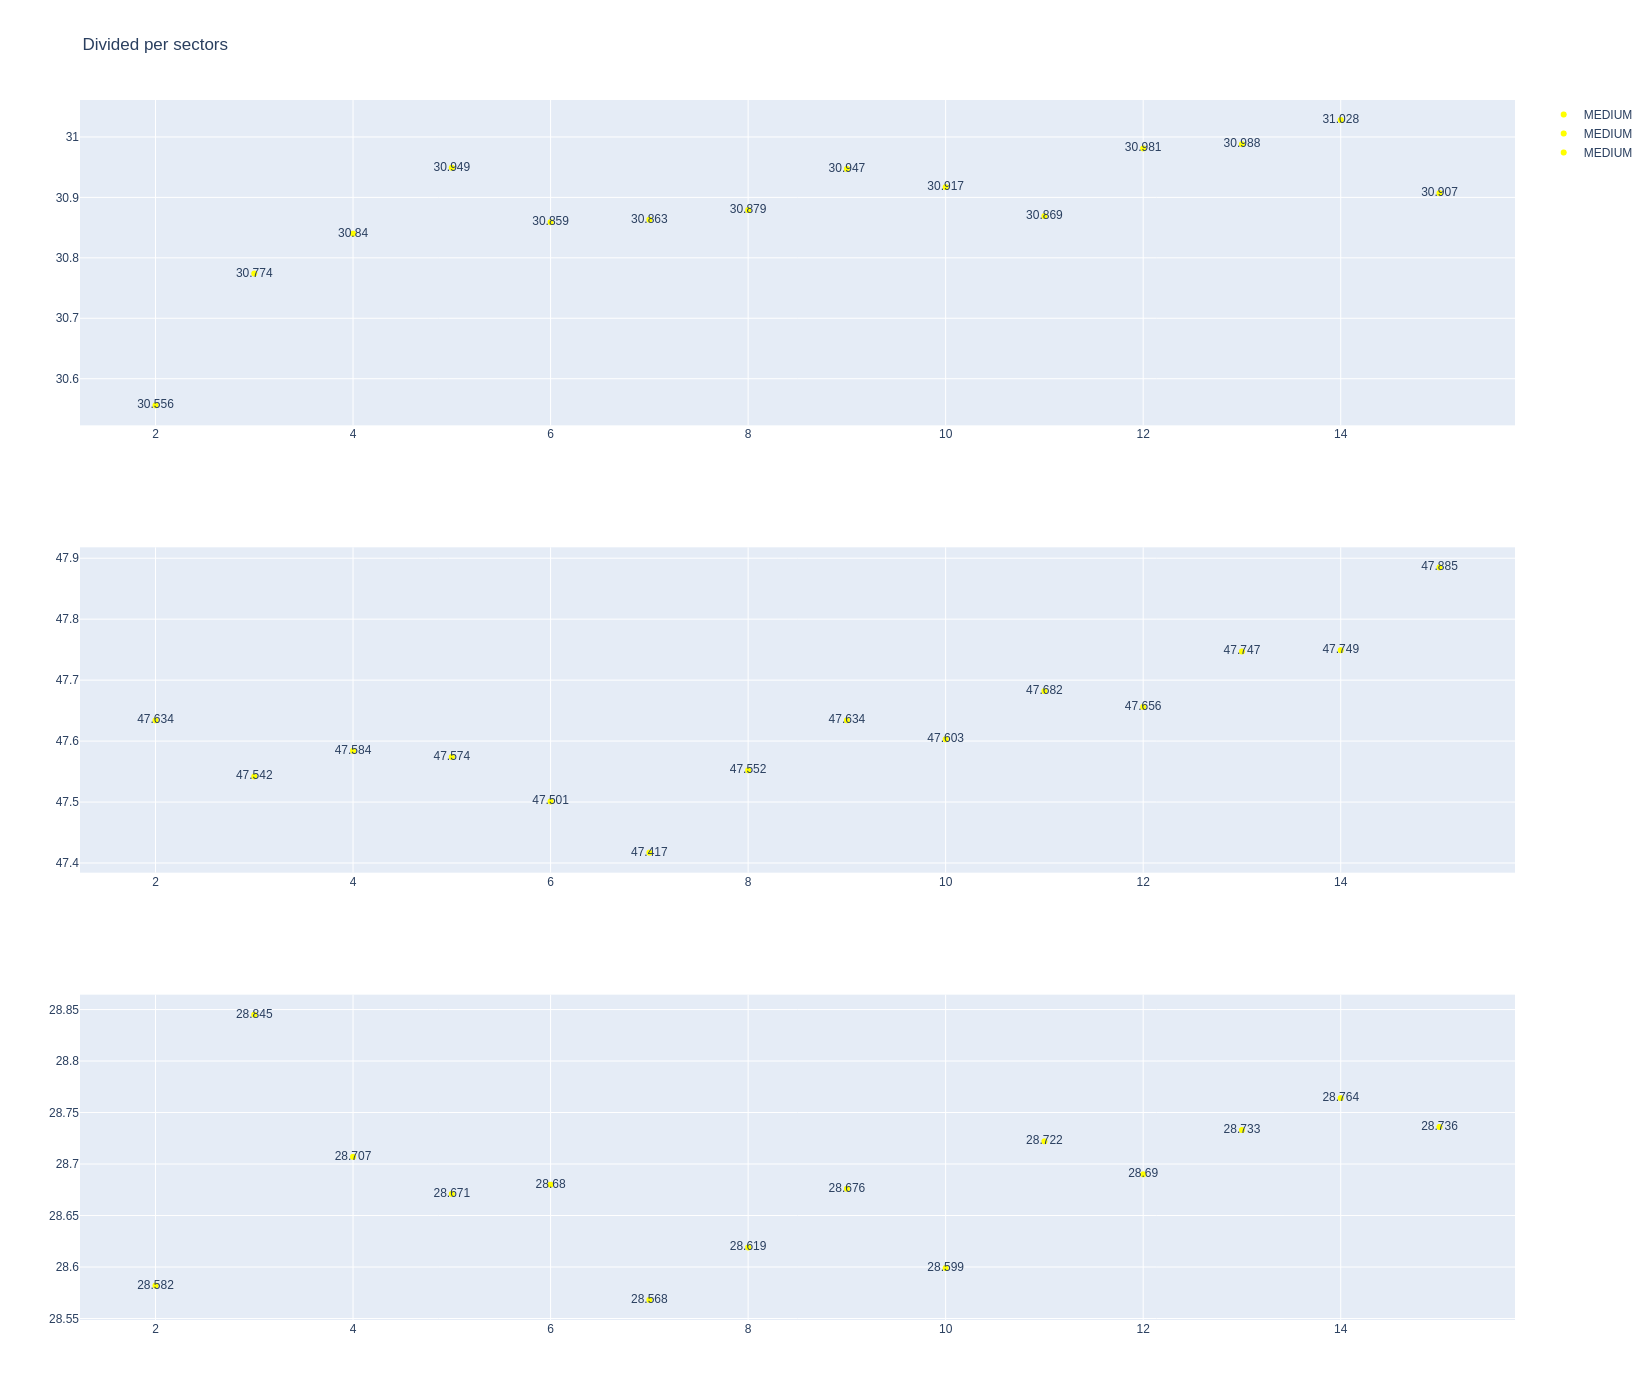

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [70]:
data = libraryDataF1.getinfolongruns(jointables,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
6    Oliver BEARMAN   MEDIUM  2025-07-26T10:05:44.808000+00:00           2   
25   Oliver BEARMAN   MEDIUM  2025-07-26T10:07:31.896000+00:00           3   
44   Oliver BEARMAN   MEDIUM  2025-07-26T10:09:19.358000+00:00           4   
64   Oliver BEARMAN   MEDIUM  2025-07-26T10:11:06.525000+00:00           5   
84   Oliver BEARMAN   MEDIUM  2025-07-26T10:12:54.205000+00:00           6   
104  Oliver BEARMAN   MEDIUM  2025-07-26T10:14:41.641000+00:00           7   
124  Oliver BEARMAN   MEDIUM  2025-07-26T10:16:28.741000+00:00           8   
144  Oliver BEARMAN   MEDIUM  2025-07-26T10:18:16.043000+00:00           9   
164  Oliver BEARMAN   MEDIUM  2025-07-26T10:20:03.502000+00:00          10   
184  Oliver BEARMAN   MEDIUM  2025-07-26T10:21:50.662000+00:00          11   
204  Oliver BEARMAN   MEDIUM  2025-07-26T10:23:38.077000+00:00          12   
224  Oliver BEARMAN   MEDIUM  2025-07-26T10:25:25.615000+00:00          13   
244  Oliver BEARMAN   MEDIUM  2025-07-26T10:27:13.250000+00:00          14   
264  Oliver BEARMAN   MEDIUM  2025-07-26T10:29:01.250000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
6               30.412             48.070             28.556       107.038  
25              30.599             48.281             28.637       107.517  
44              30.528             47.875             28.681       107.084  
64              30.680             48.282             28.721       107.683  
84              30.983             47.824             28.722       107.529  
104             30.861             47.494             28.723       107.078  
124             30.852             47.754             28.738       107.344  
144             30.894             47.585             28.925       107.404  
164             30.918             47.439             28.712       107.069  
184             30.934             47.752             28.868       107.554  
204             30.930             47.654             28.917       107.501  
224             30.925             47.829             28.889       107.643  
244             31.021             48.056             28.850       107.927  
264             31.064             47.915             28.773       107.752

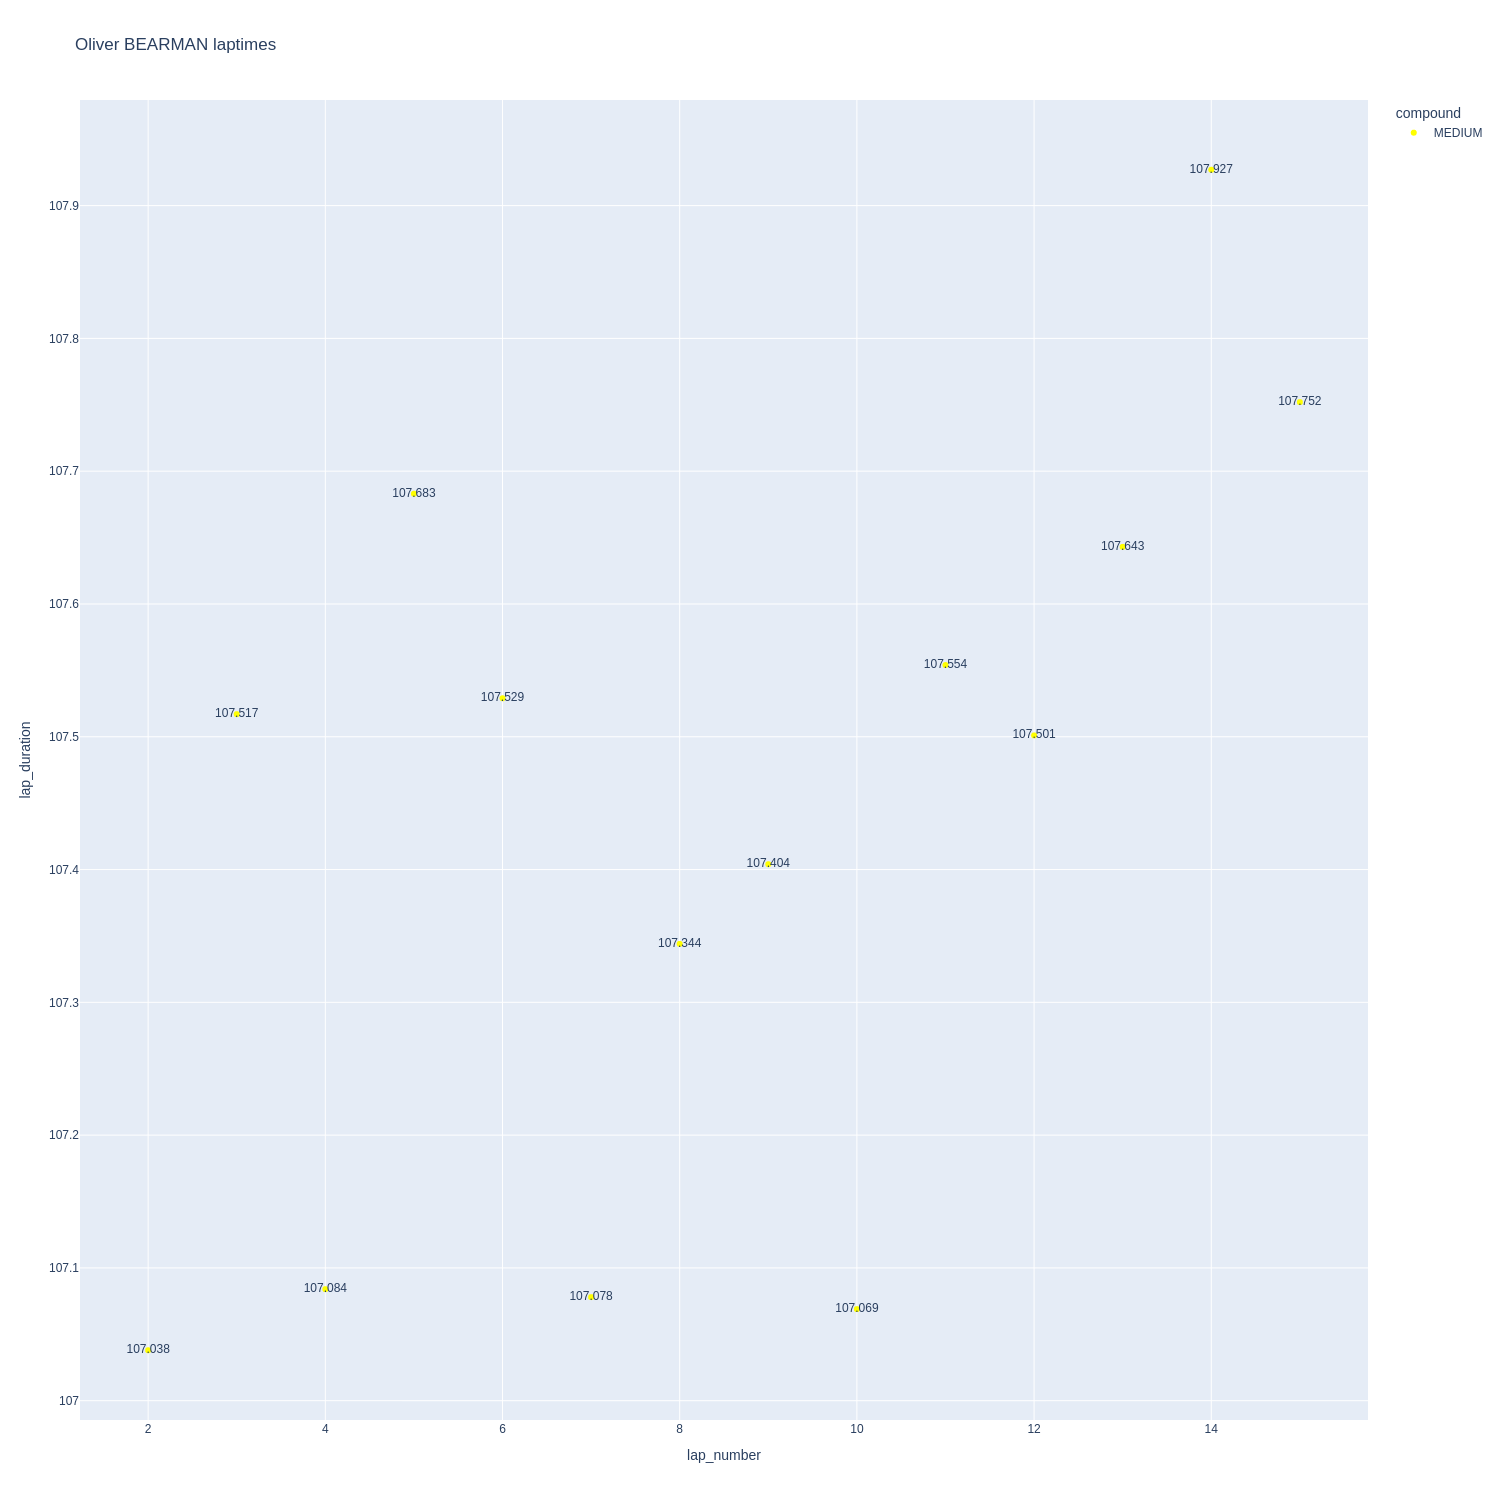

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

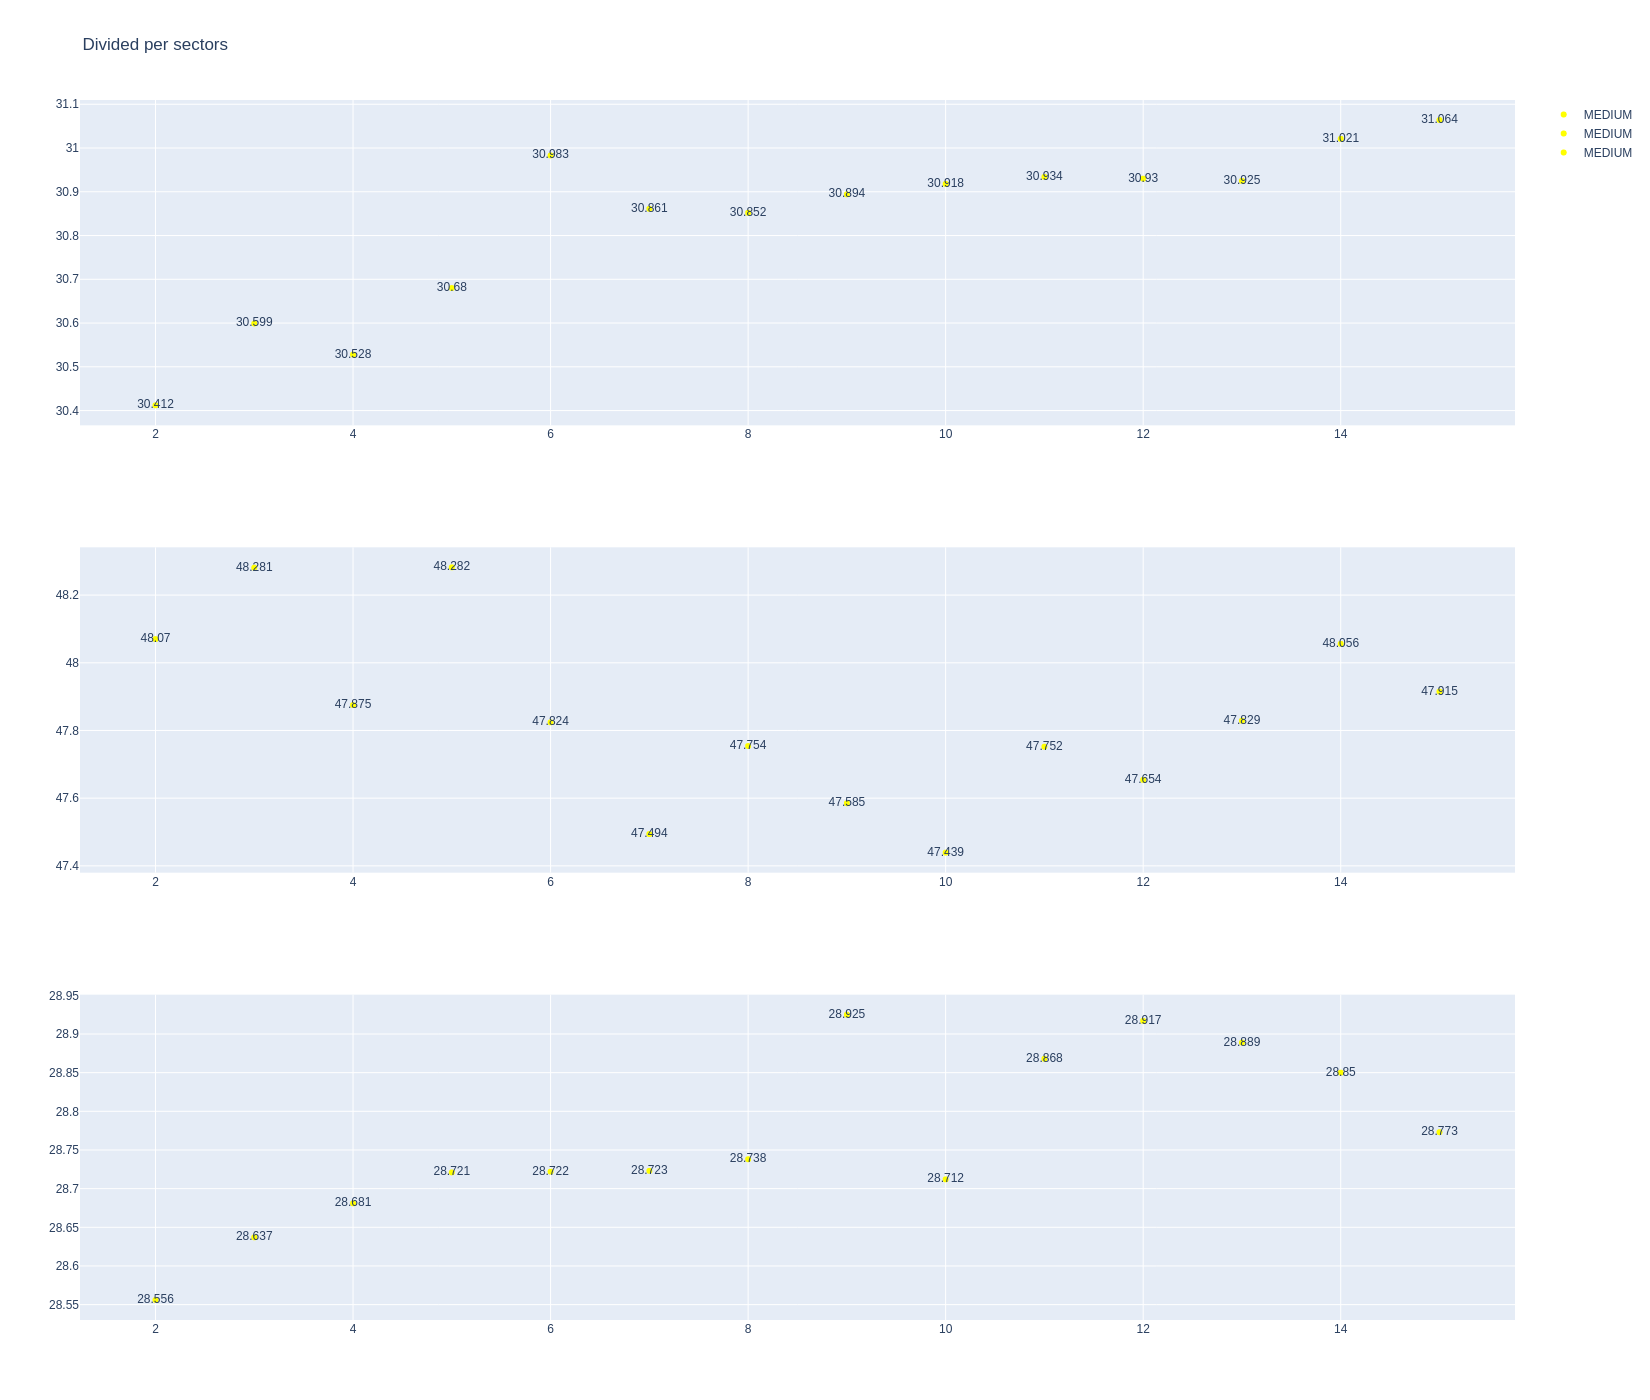

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [73]:
stintInformation.query('driver_number == 10 or driver_number == 7')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1265         9934             1             10          1        1   
20         1265         9934             2             10          2       12   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
20   MEDIUM                  6

In [74]:
data =libraryDataF1.getinfolongruns(jointables,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [77]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
57   Pierre GASLY   MEDIUM  2025-07-26T10:10:18.119000+00:00           2   
77   Pierre GASLY   MEDIUM  2025-07-26T10:12:06.232000+00:00           3   
97   Pierre GASLY   MEDIUM  2025-07-26T10:13:54.270000+00:00           4   
117  Pierre GASLY   MEDIUM  2025-07-26T10:15:41.841000+00:00           5   
137  Pierre GASLY   MEDIUM  2025-07-26T10:17:29.582000+00:00           6   
157  Pierre GASLY   MEDIUM  2025-07-26T10:19:17.205000+00:00           7   
177  Pierre GASLY   MEDIUM  2025-07-26T10:21:05.042000+00:00           8   
197  Pierre GASLY   MEDIUM  2025-07-26T10:22:52.843000+00:00           9   
217  Pierre GASLY   MEDIUM  2025-07-26T10:24:40.653000+00:00          10   
237  Pierre GASLY   MEDIUM  2025-07-26T10:26:28.684000+00:00          11   
257  Pierre GASLY   MEDIUM  2025-07-26T10:28:16.820000+00:00          12   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
57              31.331             47.872             28.978       108.181  
77              31.264             47.755             28.925       107.944  
97              31.215             47.569             28.869       107.653  
117             31.132             47.639             28.921       107.692  
137             31.150             47.613             28.888       107.651  
157             31.057             47.907             28.839       107.803  
177             31.083             47.915             28.891       107.889  
197             31.131             47.796             28.817       107.744  
217             31.141             48.043             28.954       108.138  
237             31.161             47.937             28.916       108.014  
257             31.211             48.377             37.373       116.961

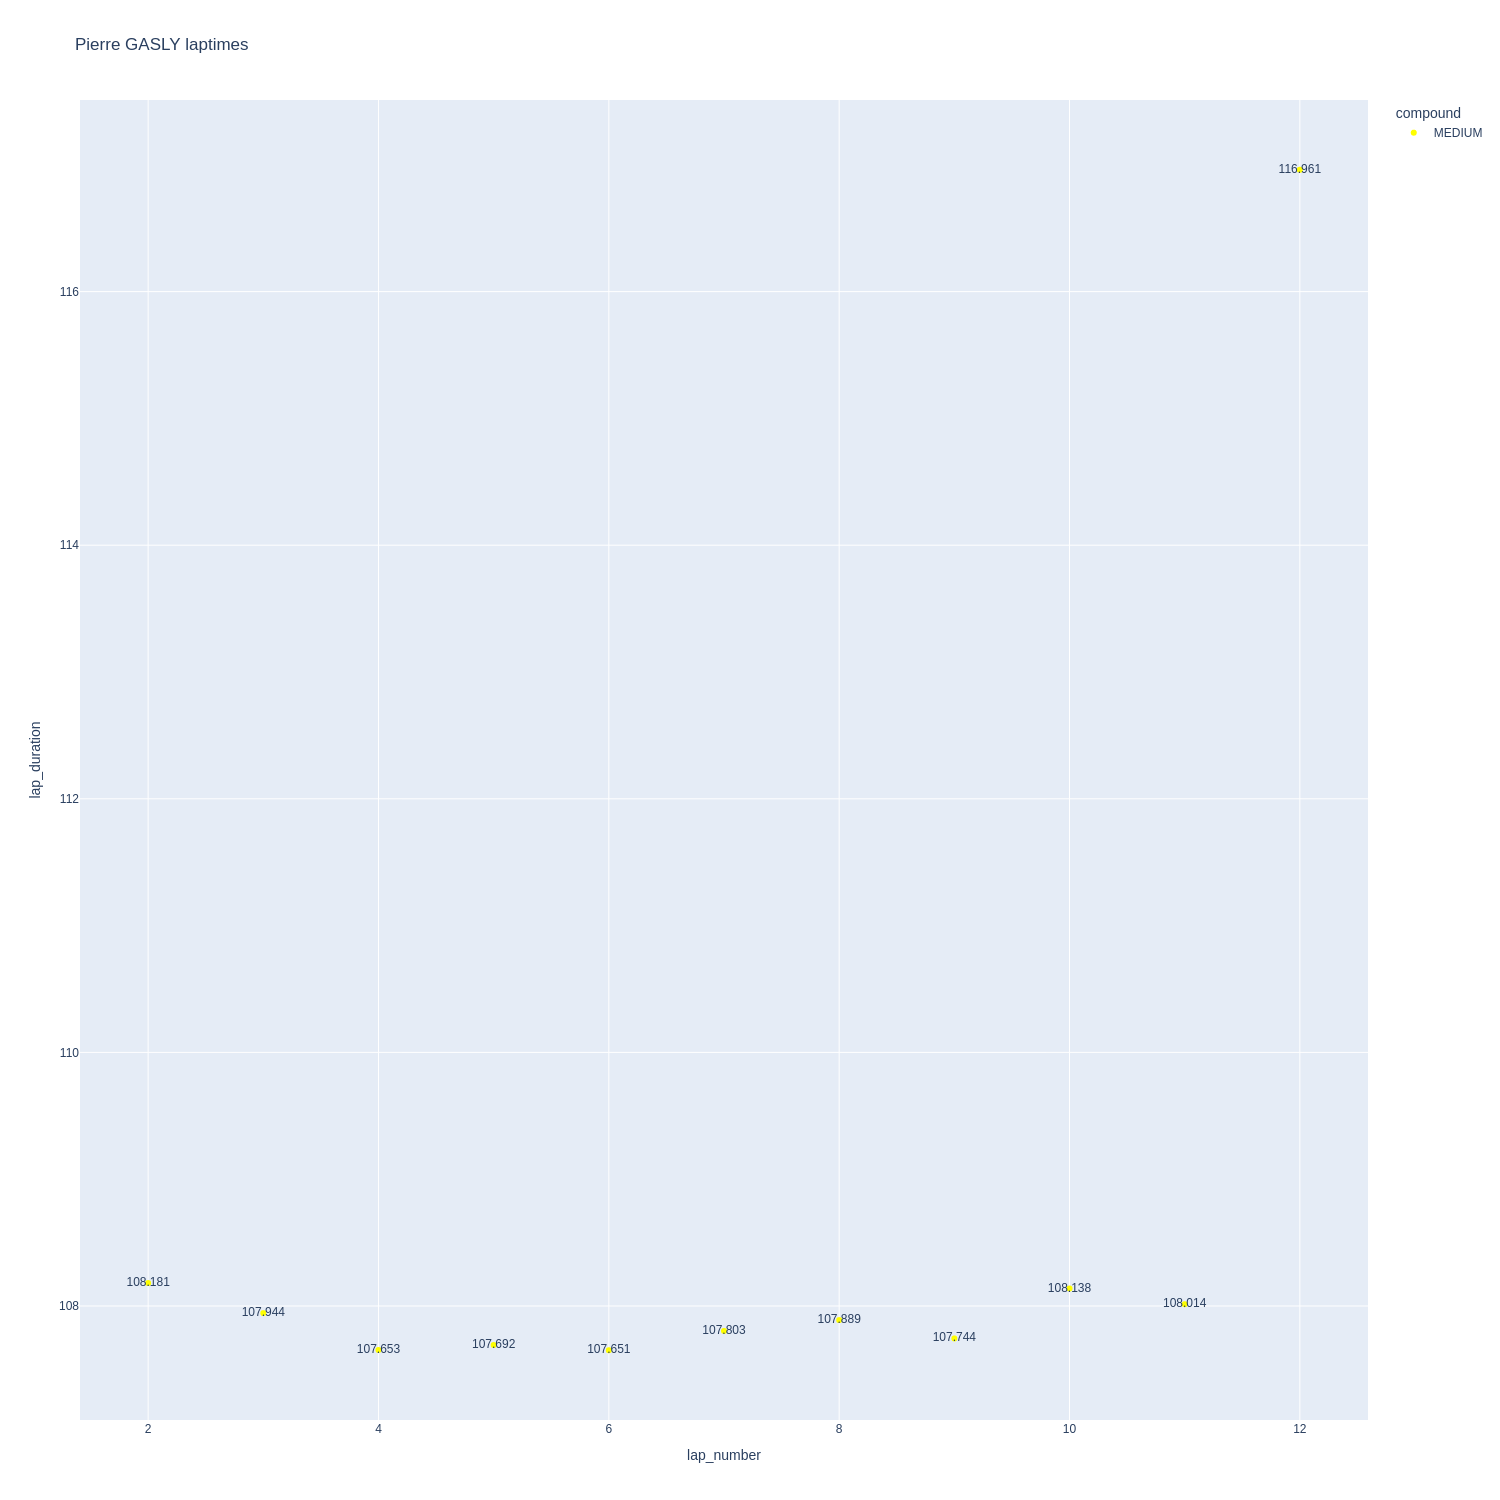

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

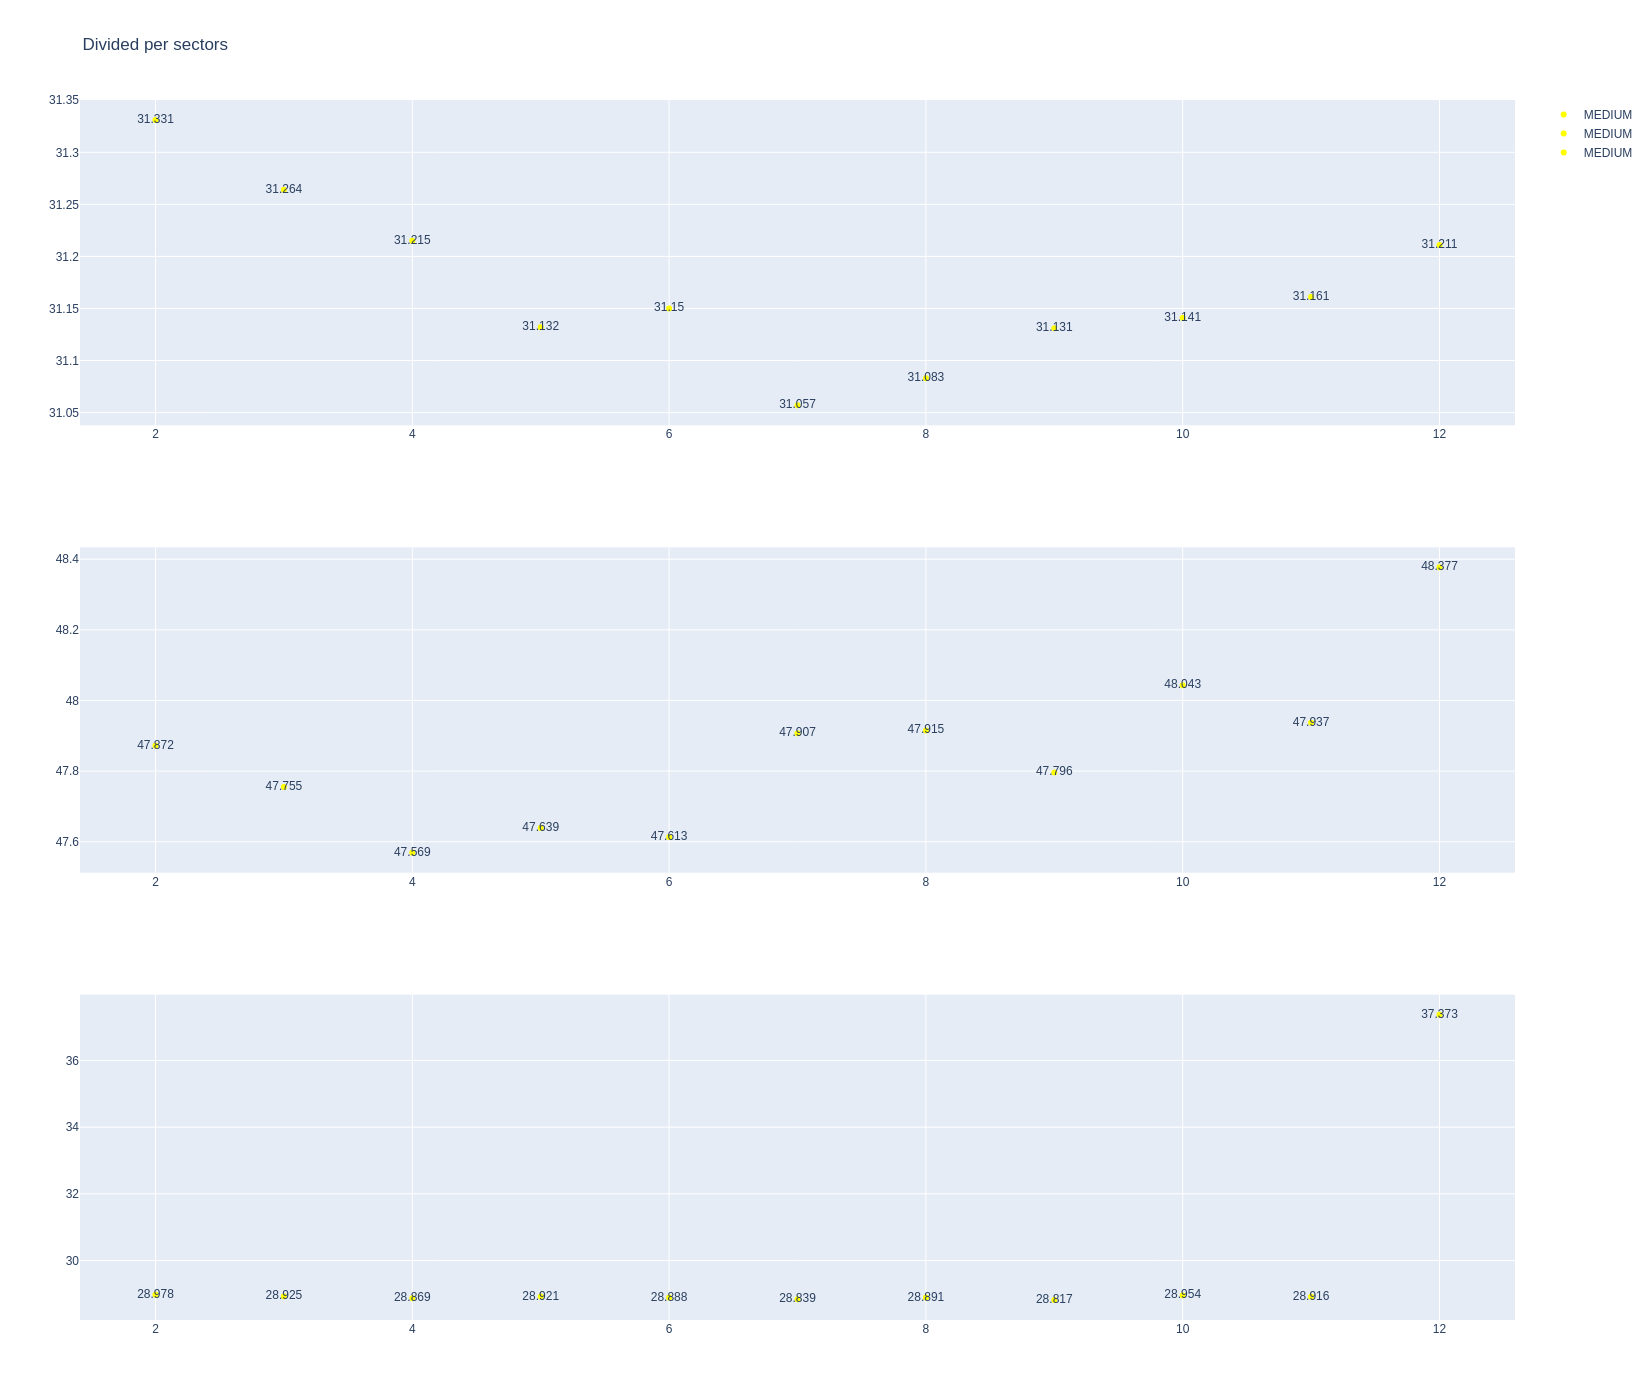

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [80]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1265         9934             1             23          1       15   
16         1265         9934             1             55          1       15   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
16   MEDIUM                  0

In [81]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
14   Alexander ALBON   MEDIUM  2025-07-26T10:05:48.961000+00:00           2   
33   Alexander ALBON   MEDIUM  2025-07-26T10:07:37.553000+00:00           3   
52   Alexander ALBON   MEDIUM  2025-07-26T10:09:25.532000+00:00           4   
72   Alexander ALBON   MEDIUM  2025-07-26T10:11:12.884000+00:00           5   
92   Alexander ALBON   MEDIUM  2025-07-26T10:13:00.335000+00:00           6   
112  Alexander ALBON   MEDIUM  2025-07-26T10:14:47.787000+00:00           7   
132  Alexander ALBON   MEDIUM  2025-07-26T10:16:35.630000+00:00           8   
152  Alexander ALBON   MEDIUM  2025-07-26T10:18:23.417000+00:00           9   
172  Alexander ALBON   MEDIUM  2025-07-26T10:20:11.671000+00:00          10   
192  Alexander ALBON   MEDIUM  2025-07-26T10:21:59.103000+00:00          11   
212  Alexander ALBON   MEDIUM  2025-07-26T10:23:46.999000+00:00          12   
232  Alexander ALBON   MEDIUM  2025-07-26T10:25:35.162000+00:00          13   
252  Alexander ALBON   MEDIUM  2025-07-26T10:27:23.628000+00:00          14   
273  Alexander ALBON   MEDIUM  2025-07-26T10:29:12.787000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
14              30.599             49.281             28.765       108.645  
33              30.564             48.506             28.850       107.920  
52              30.718             47.957             28.747       107.422  
72              30.707             47.987             28.759       107.453  
92              30.579             48.100             28.740       107.419  
112             30.673             48.281             28.888       107.842  
132             30.811             48.234             28.796       107.841  
152             30.739             48.515             28.839       108.093  
172             30.637             48.091             28.850       107.578  
192             30.800             48.225             28.881       107.906  
212             30.645             48.563             28.814       108.022  
232             30.413             49.127             28.898       108.438  
252             30.769             48.645             29.786       109.200  
273             31.434             48.403             28.736       108.573

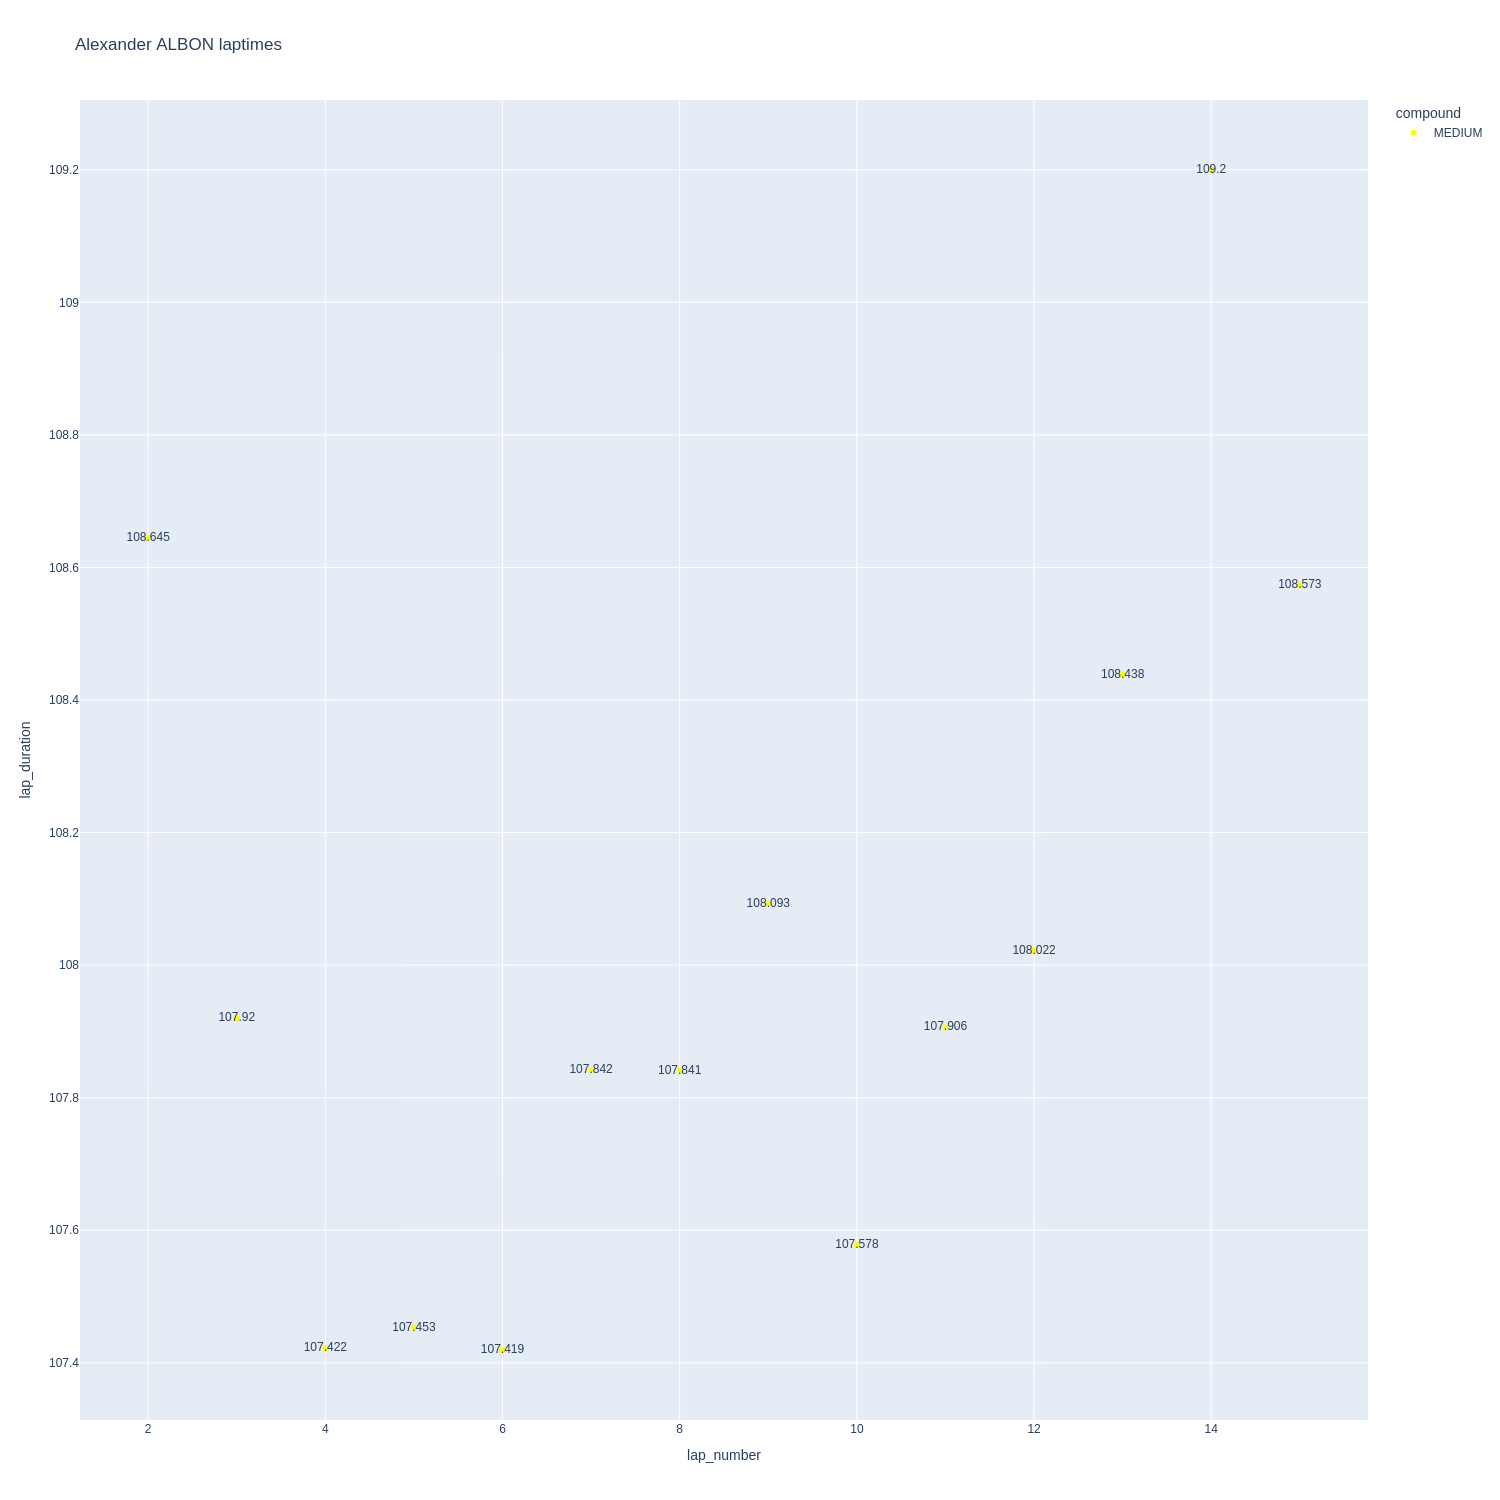

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

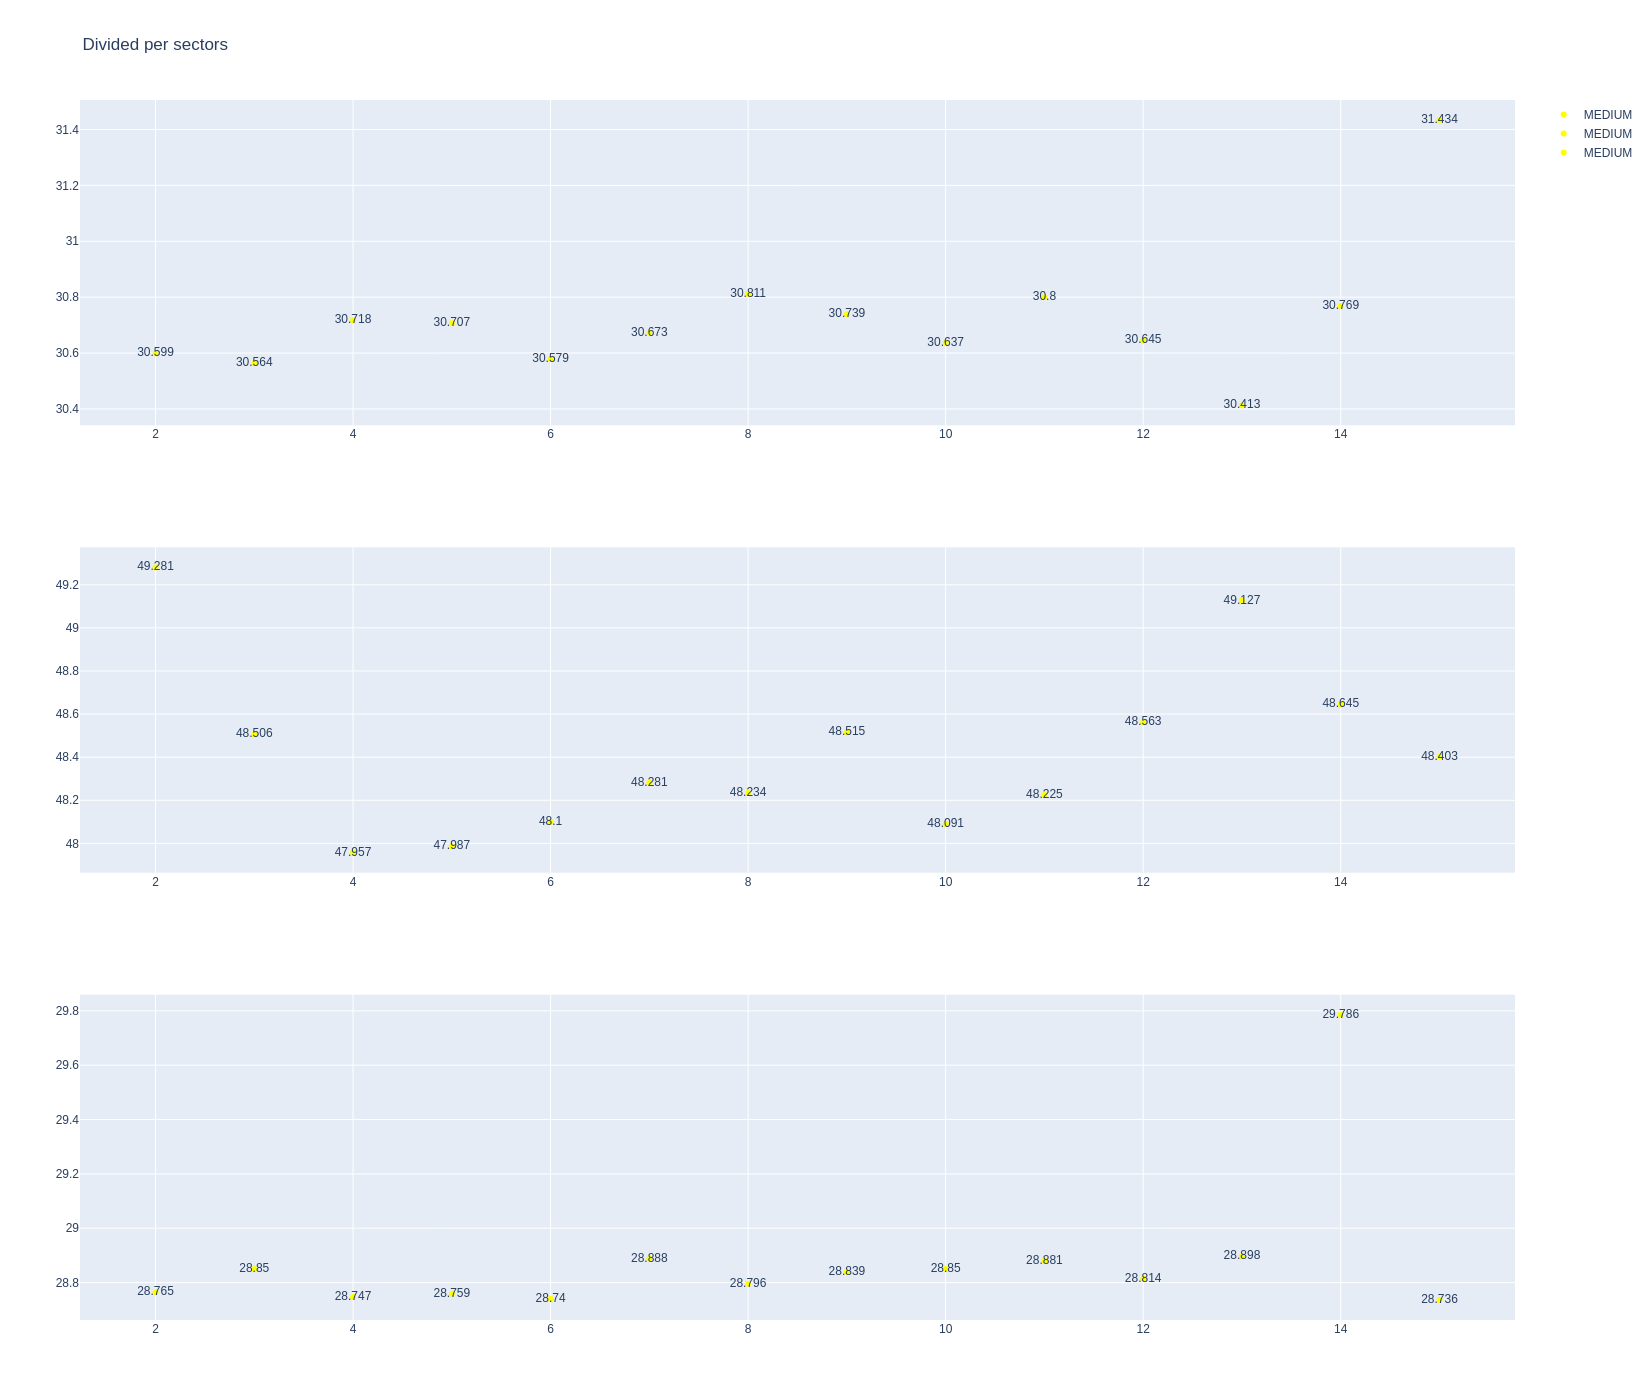

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [84]:
data= libraryDataF1.getinfolongruns(jointables,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
5    Carlos SAINZ   MEDIUM  2025-07-26T10:05:44.192000+00:00           2   
24   Carlos SAINZ   MEDIUM  2025-07-26T10:07:31.169000+00:00           3   
43   Carlos SAINZ   MEDIUM  2025-07-26T10:09:18.509000+00:00           4   
63   Carlos SAINZ   MEDIUM  2025-07-26T10:11:05.837000+00:00           5   
83   Carlos SAINZ   MEDIUM  2025-07-26T10:12:52.809000+00:00           6   
103  Carlos SAINZ   MEDIUM  2025-07-26T10:14:39.979000+00:00           7   
123  Carlos SAINZ   MEDIUM  2025-07-26T10:16:26.637000+00:00           8   
143  Carlos SAINZ   MEDIUM  2025-07-26T10:18:13.842000+00:00           9   
163  Carlos SAINZ   MEDIUM  2025-07-26T10:20:00.908000+00:00          10   
183  Carlos SAINZ   MEDIUM  2025-07-26T10:21:48.024000+00:00          11   
203  Carlos SAINZ   MEDIUM  2025-07-26T10:23:35.327000+00:00          12   
223  Carlos SAINZ   MEDIUM  2025-07-26T10:25:22.803000+00:00          13   
243  Carlos SAINZ   MEDIUM  2025-07-26T10:27:10.172000+00:00          14   
263  Carlos SAINZ   MEDIUM  2025-07-26T10:28:57.774000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
5               30.660             47.659             28.691       107.010  
24              30.989             47.541             28.815       107.345  
43              30.999             47.432             28.947       107.378  
63                 NaN             47.249             28.766       107.014  
83              31.091             47.180             28.757       107.028  
103             30.976             47.107             28.687       106.770  
123             30.975             47.444             28.710       107.129  
143             30.912             47.391             28.822       107.125  
163             30.837             47.497             28.797       107.131  
183             30.968             47.517             28.833       107.318  
203             31.068             47.429             28.848       107.345  
223             30.902             47.686             28.826       107.414  
243             31.060             47.725             28.870       107.655  
263             30.925             47.719             28.862       107.506

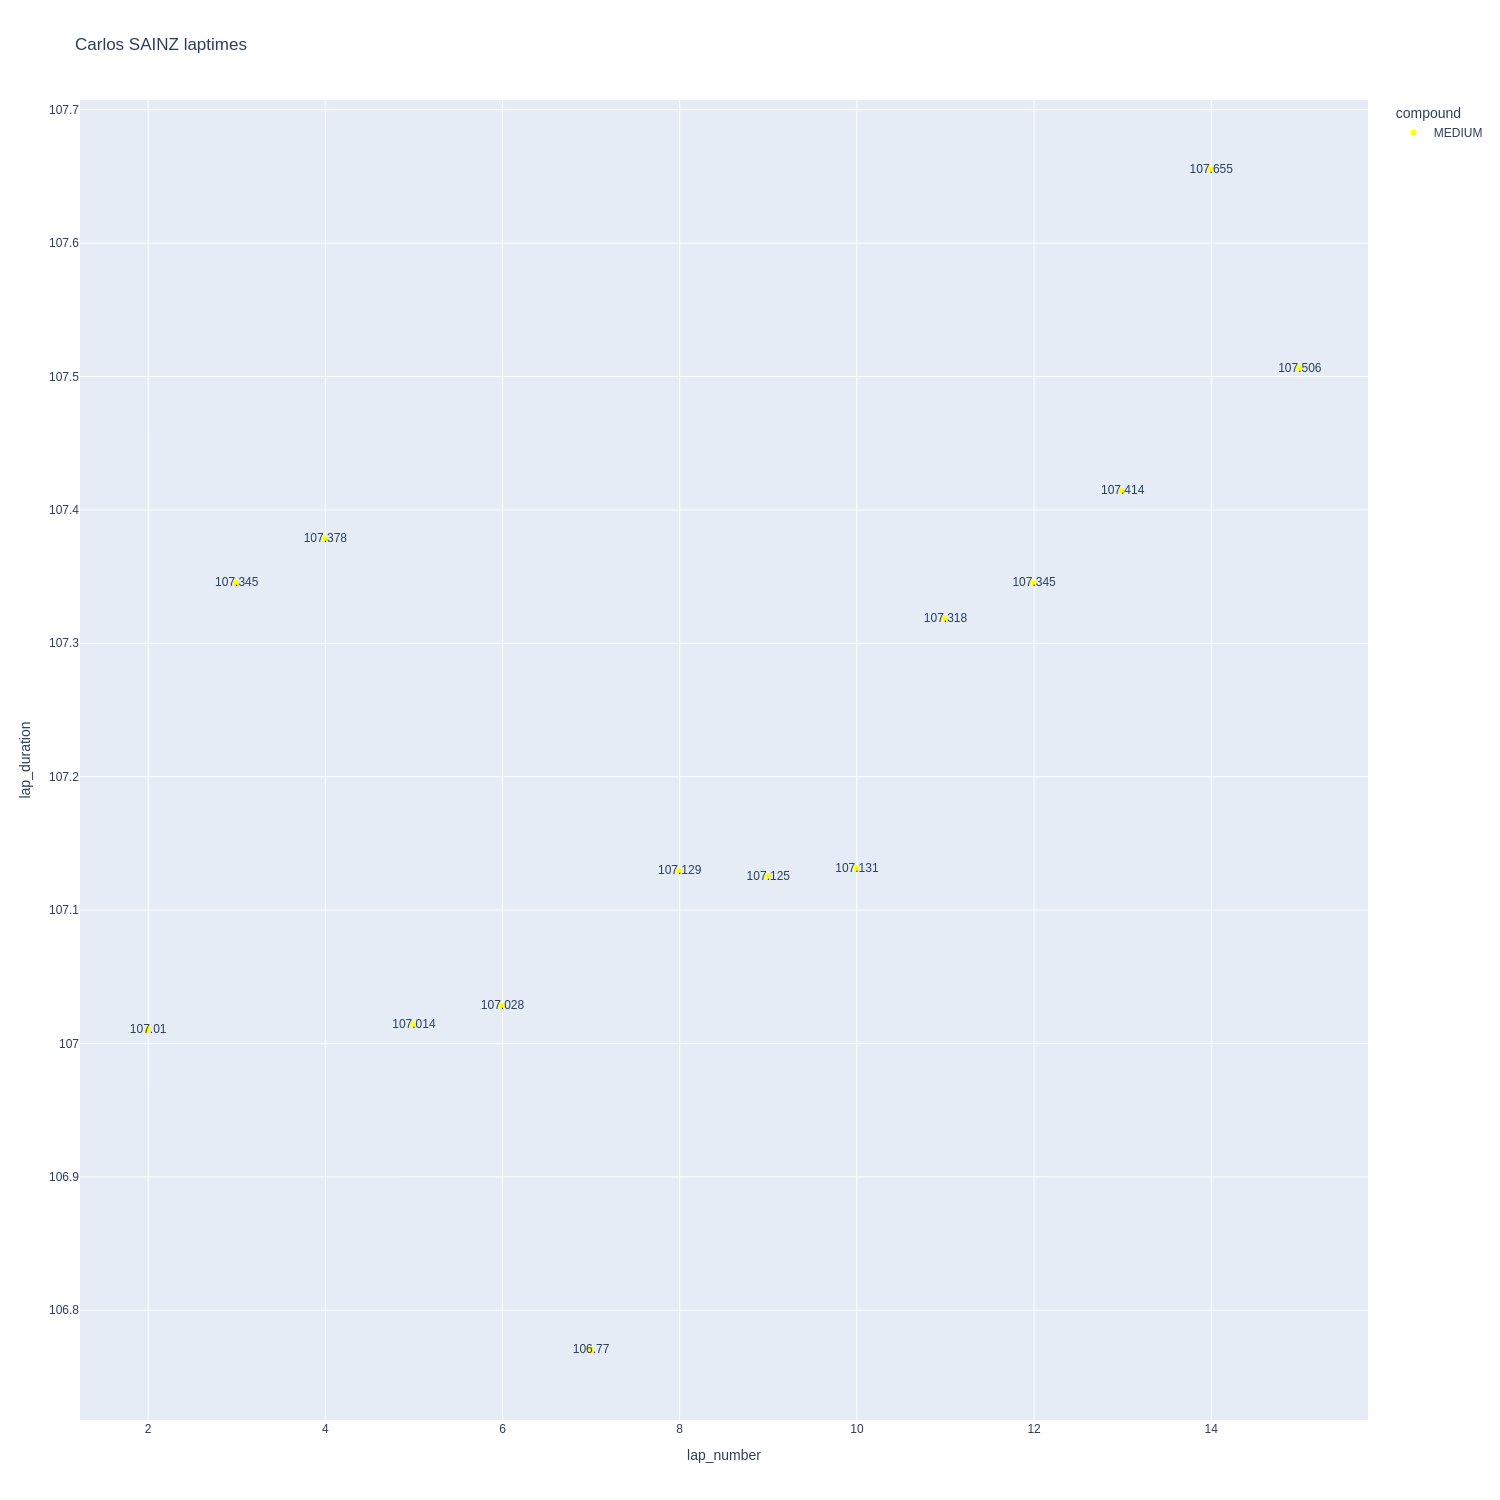

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

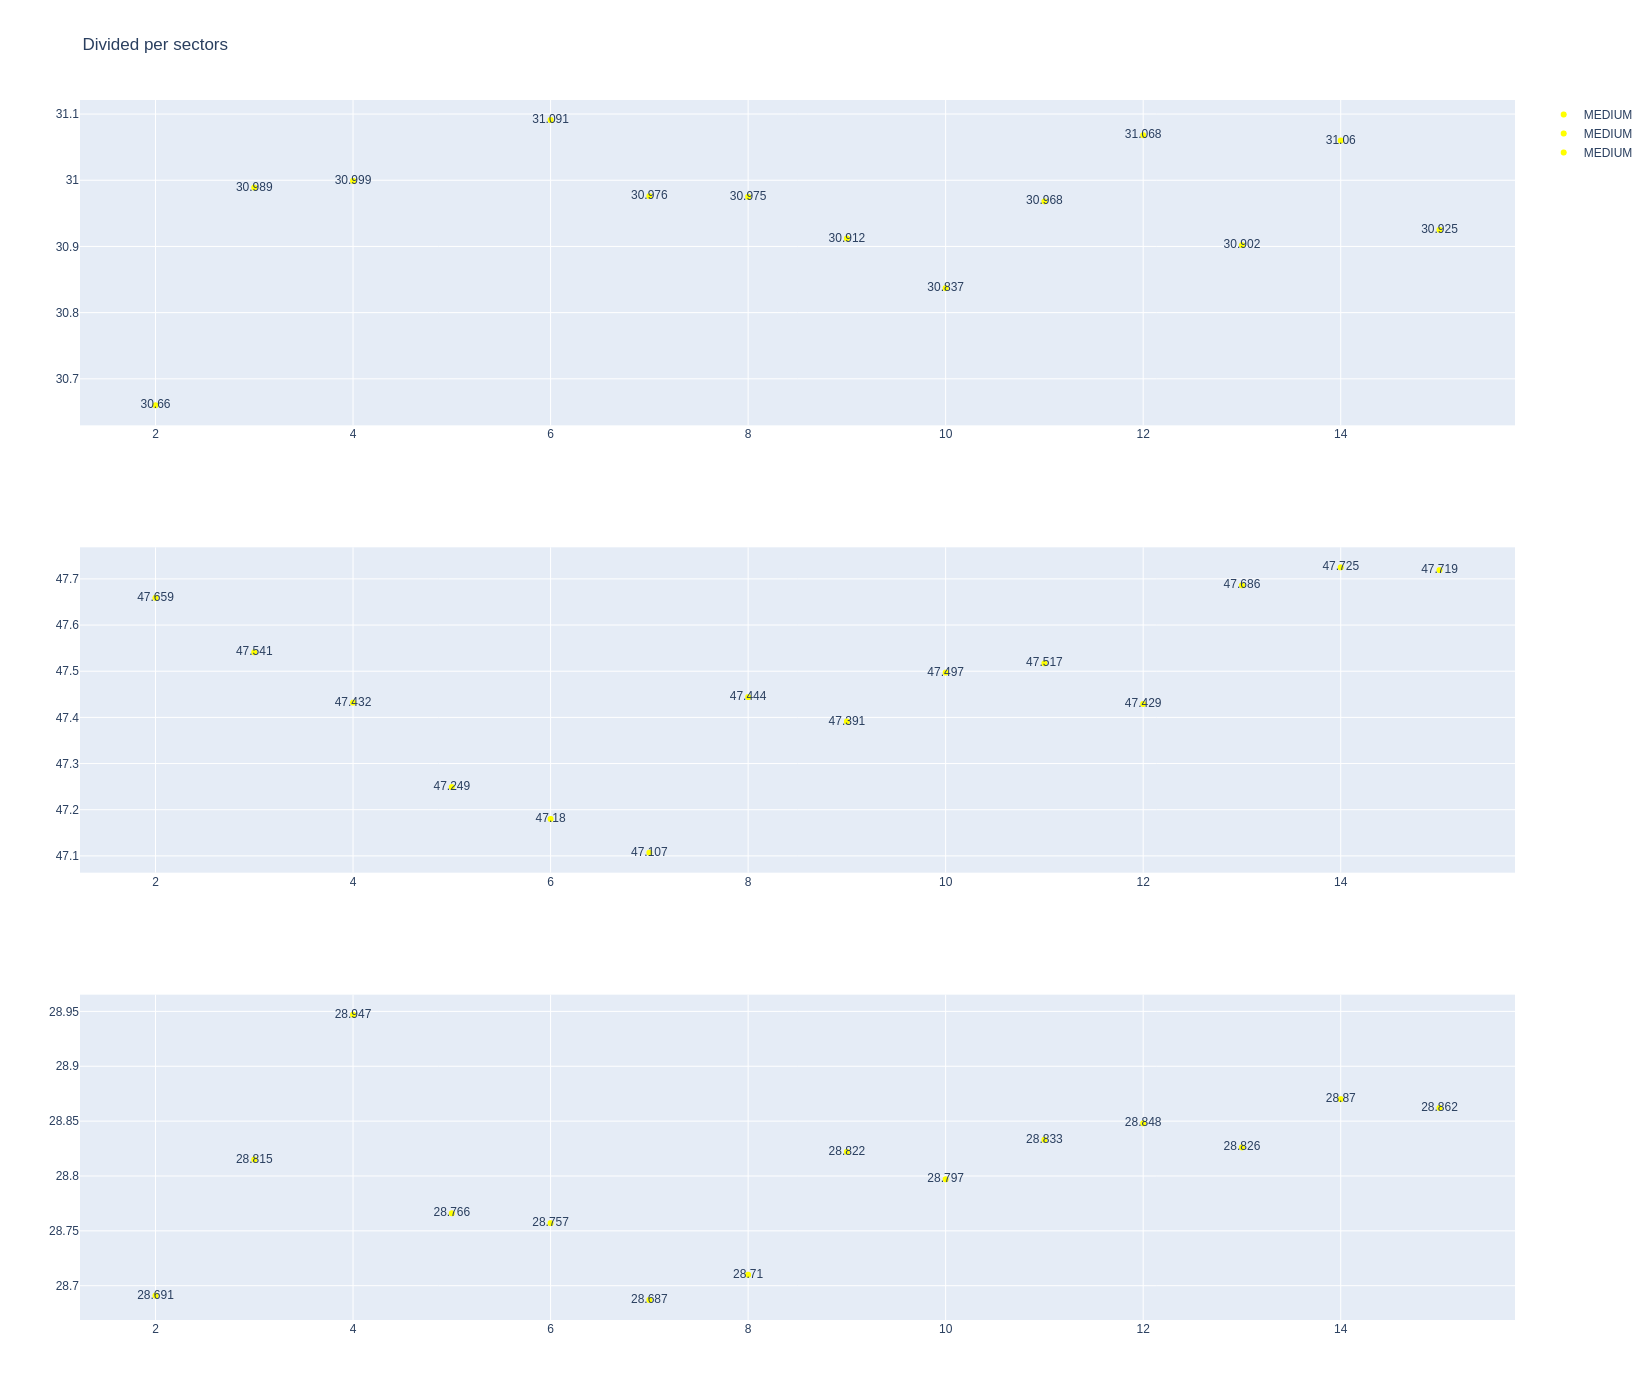

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [87]:
stintInformation.query('driver_number == 5 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1265         9934             1              5          1       15   
11         1265         9934             1             27          1       15   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
11   MEDIUM                  0

In [88]:
data = libraryDataF1.getinfolongruns(jointables,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
8    Gabriel BORTOLETO   MEDIUM  2025-07-26T10:05:46.131000+00:00           2   
27   Gabriel BORTOLETO   MEDIUM  2025-07-26T10:07:33.240000+00:00           3   
46   Gabriel BORTOLETO   MEDIUM  2025-07-26T10:09:20.914000+00:00           4   
66   Gabriel BORTOLETO   MEDIUM  2025-07-26T10:11:08.166000+00:00           5   
86   Gabriel BORTOLETO   MEDIUM  2025-07-26T10:12:55.699000+00:00           6   
106  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:14:43.299000+00:00           7   
126  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:16:30.563000+00:00           8   
146  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:18:18.151000+00:00           9   
166  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:20:05.271000+00:00          10   
186  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:21:52.977000+00:00          11   
206  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:23:40.562000+00:00          12   
226  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:25:28.193000+00:00          13   
246  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:27:16.366000+00:00          14   
266  Gabriel BORTOLETO   MEDIUM  2025-07-26T10:29:04.267000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
8               30.612             47.783             28.691       107.086  
27              30.660             48.286             28.773       107.719  
46              30.689             47.748             28.842       107.279  
66              30.761             47.948             28.804       107.513  
86              30.792             47.881             28.809       107.482  
106             30.652             47.928             28.802       107.382  
126             30.941             47.786             28.798       107.525  
146             30.968             47.477             28.685       107.130  
166             31.036             47.999             28.731       107.766  
186             31.084             47.527             28.899       107.510  
206             31.131             47.805             28.799       107.735  
226             31.271             47.754             29.120       108.145  
246             31.153             47.728             29.021       107.902  
266             31.358             47.962             28.915       108.235

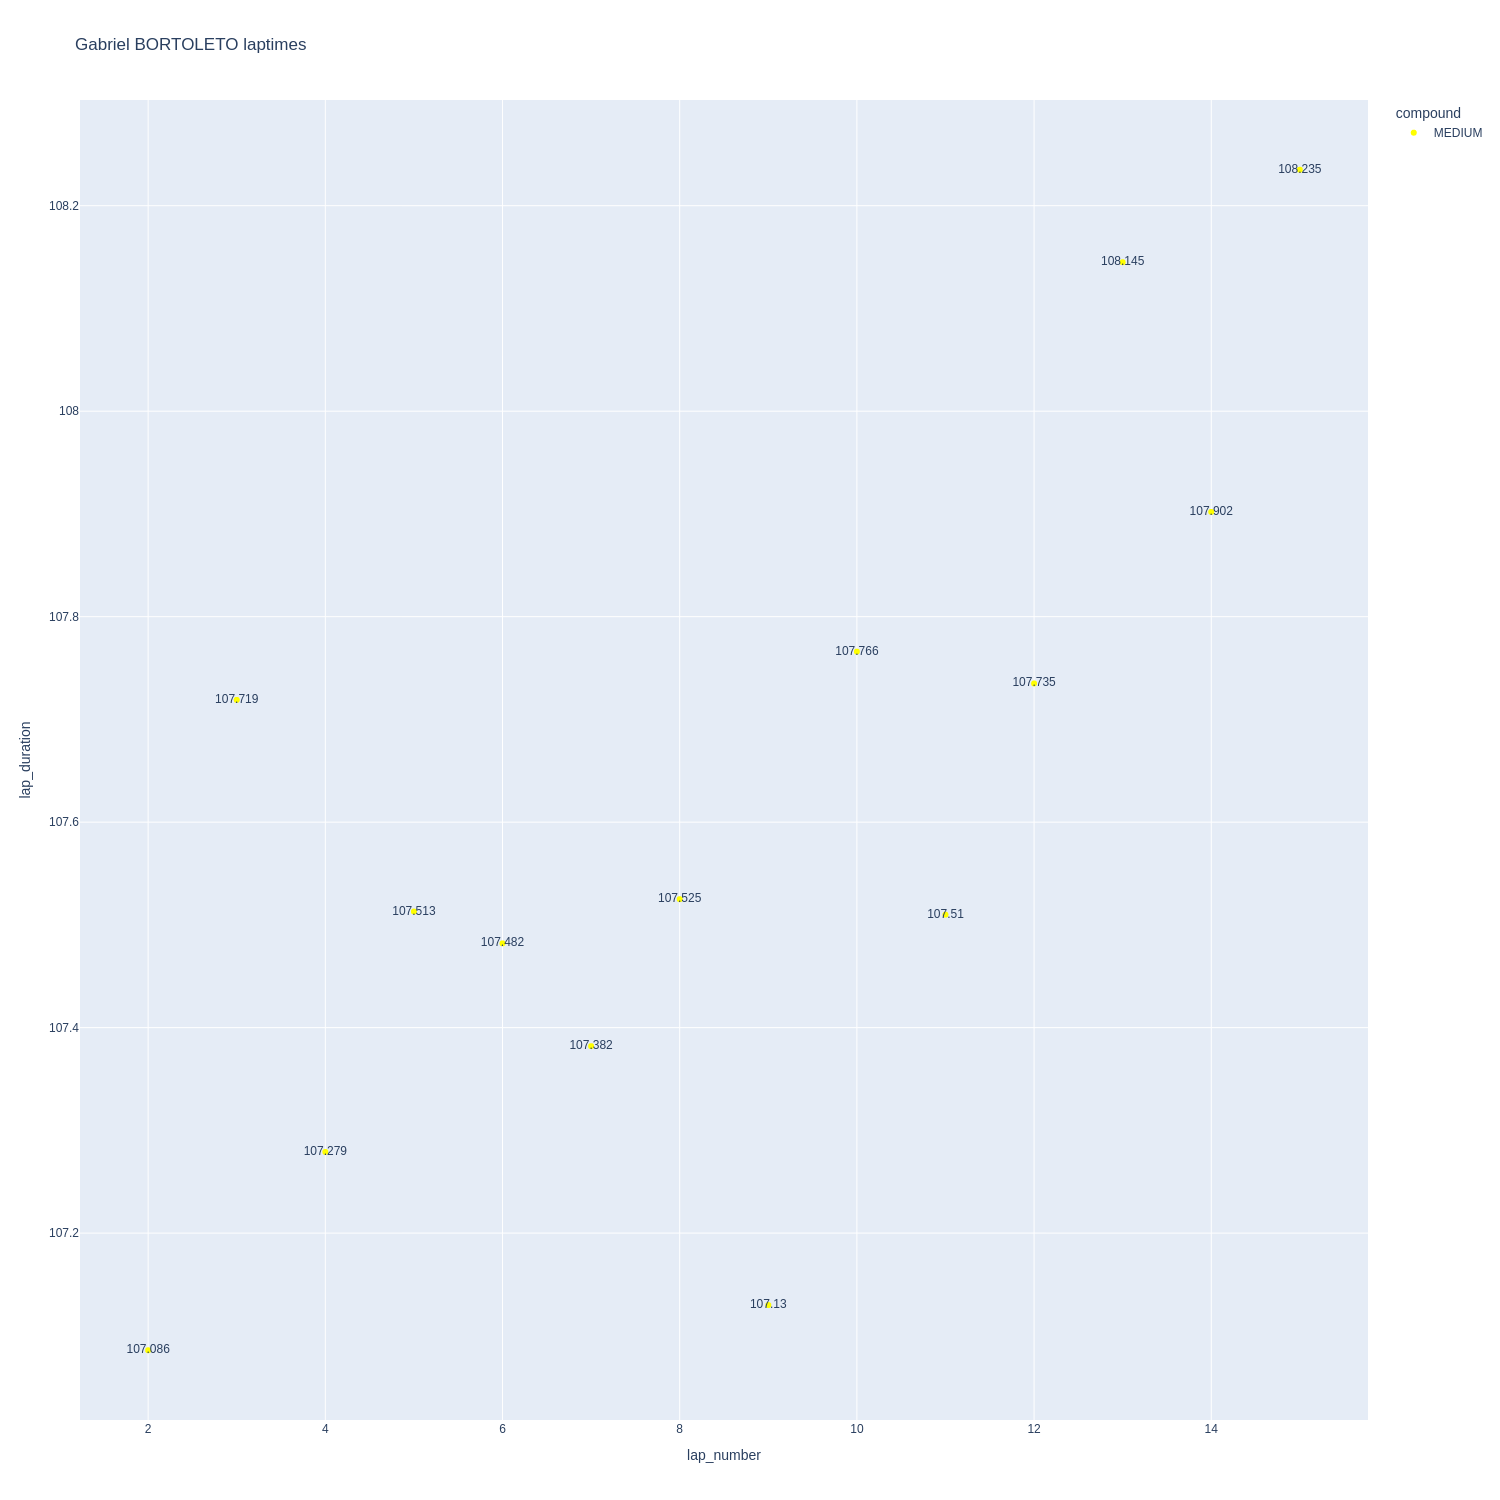

In [89]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

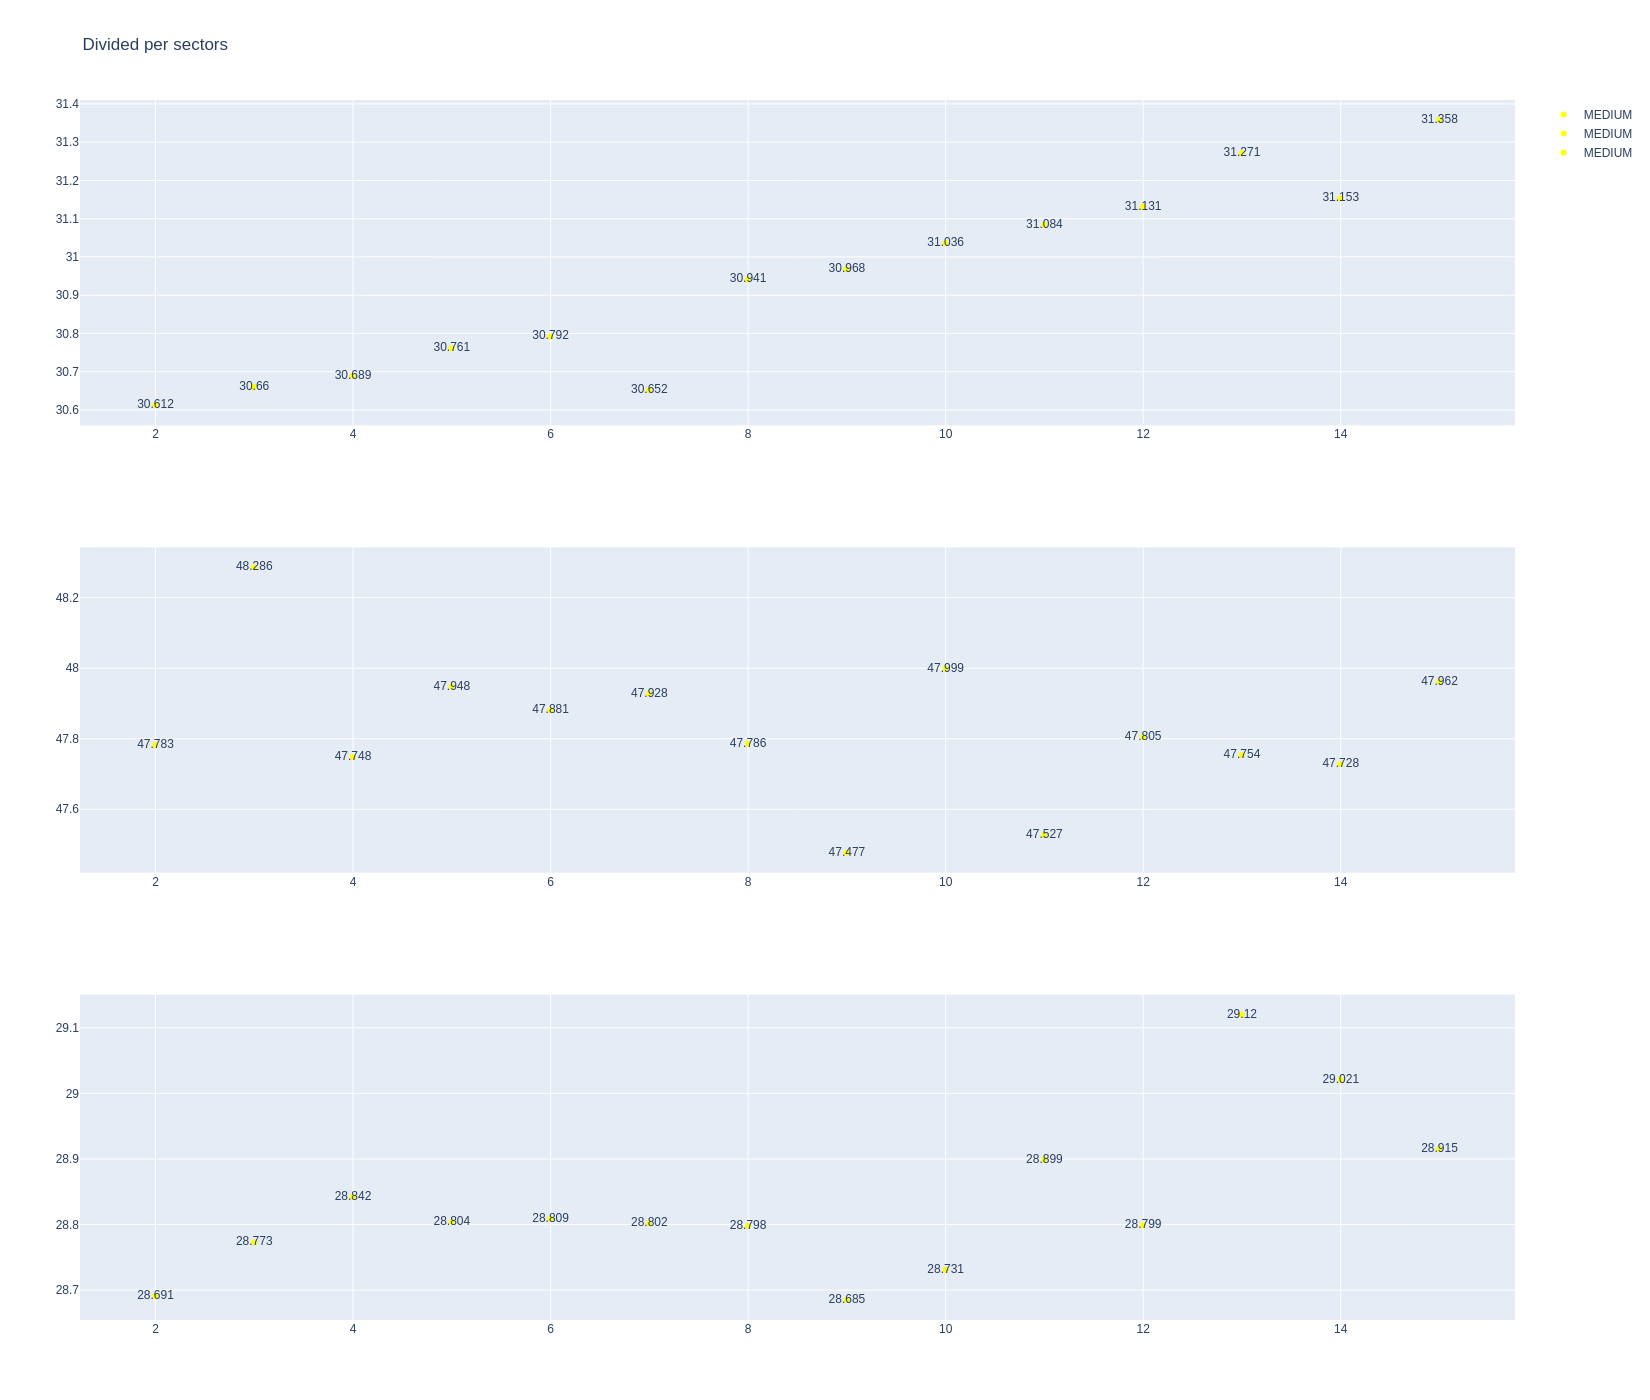

In [90]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [91]:
data = libraryDataF1.getinfolongruns(jointables,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
15   Nico HULKENBERG   MEDIUM  2025-07-26T10:05:49.420000+00:00           2   
34   Nico HULKENBERG   MEDIUM  2025-07-26T10:07:38.084000+00:00           3   
54   Nico HULKENBERG   MEDIUM  2025-07-26T10:09:26.745000+00:00           4   
74   Nico HULKENBERG   MEDIUM  2025-07-26T10:11:14.588000+00:00           5   
95   Nico HULKENBERG   MEDIUM  2025-07-26T10:13:02.897000+00:00           6   
115  Nico HULKENBERG   MEDIUM  2025-07-26T10:14:50.728000+00:00           7   
135  Nico HULKENBERG   MEDIUM  2025-07-26T10:16:38.380000+00:00           8   
155  Nico HULKENBERG   MEDIUM  2025-07-26T10:18:25.980000+00:00           9   
175  Nico HULKENBERG   MEDIUM  2025-07-26T10:20:13.905000+00:00          10   
195  Nico HULKENBERG   MEDIUM  2025-07-26T10:22:01.389000+00:00          11   
215  Nico HULKENBERG   MEDIUM  2025-07-26T10:23:49.405000+00:00          12   
235  Nico HULKENBERG   MEDIUM  2025-07-26T10:25:37.659000+00:00          13   
255  Nico HULKENBERG   MEDIUM  2025-07-26T10:27:26.044000+00:00          14   
275  Nico HULKENBERG   MEDIUM  2025-07-26T10:29:14.545000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
15              30.716             49.101             28.874       108.691  
34              30.764             48.432             29.427       108.623  
54              30.533             48.299             29.027       107.859  
74              30.965             48.424             28.948       108.337  
95              31.119             47.742             28.890       107.751  
115             31.091             47.738             28.882       107.711  
135             31.024             47.746             28.805       107.575  
155             30.912             48.020             28.862       107.794  
175             31.046             47.762             28.793       107.601  
195             30.964             47.981             28.999       107.944  
215             30.924             48.316             29.044       108.284  
235             31.114             48.144             29.114       108.372  
255             31.328             48.052             29.106       108.486  
275             30.992             48.821             28.884       108.697

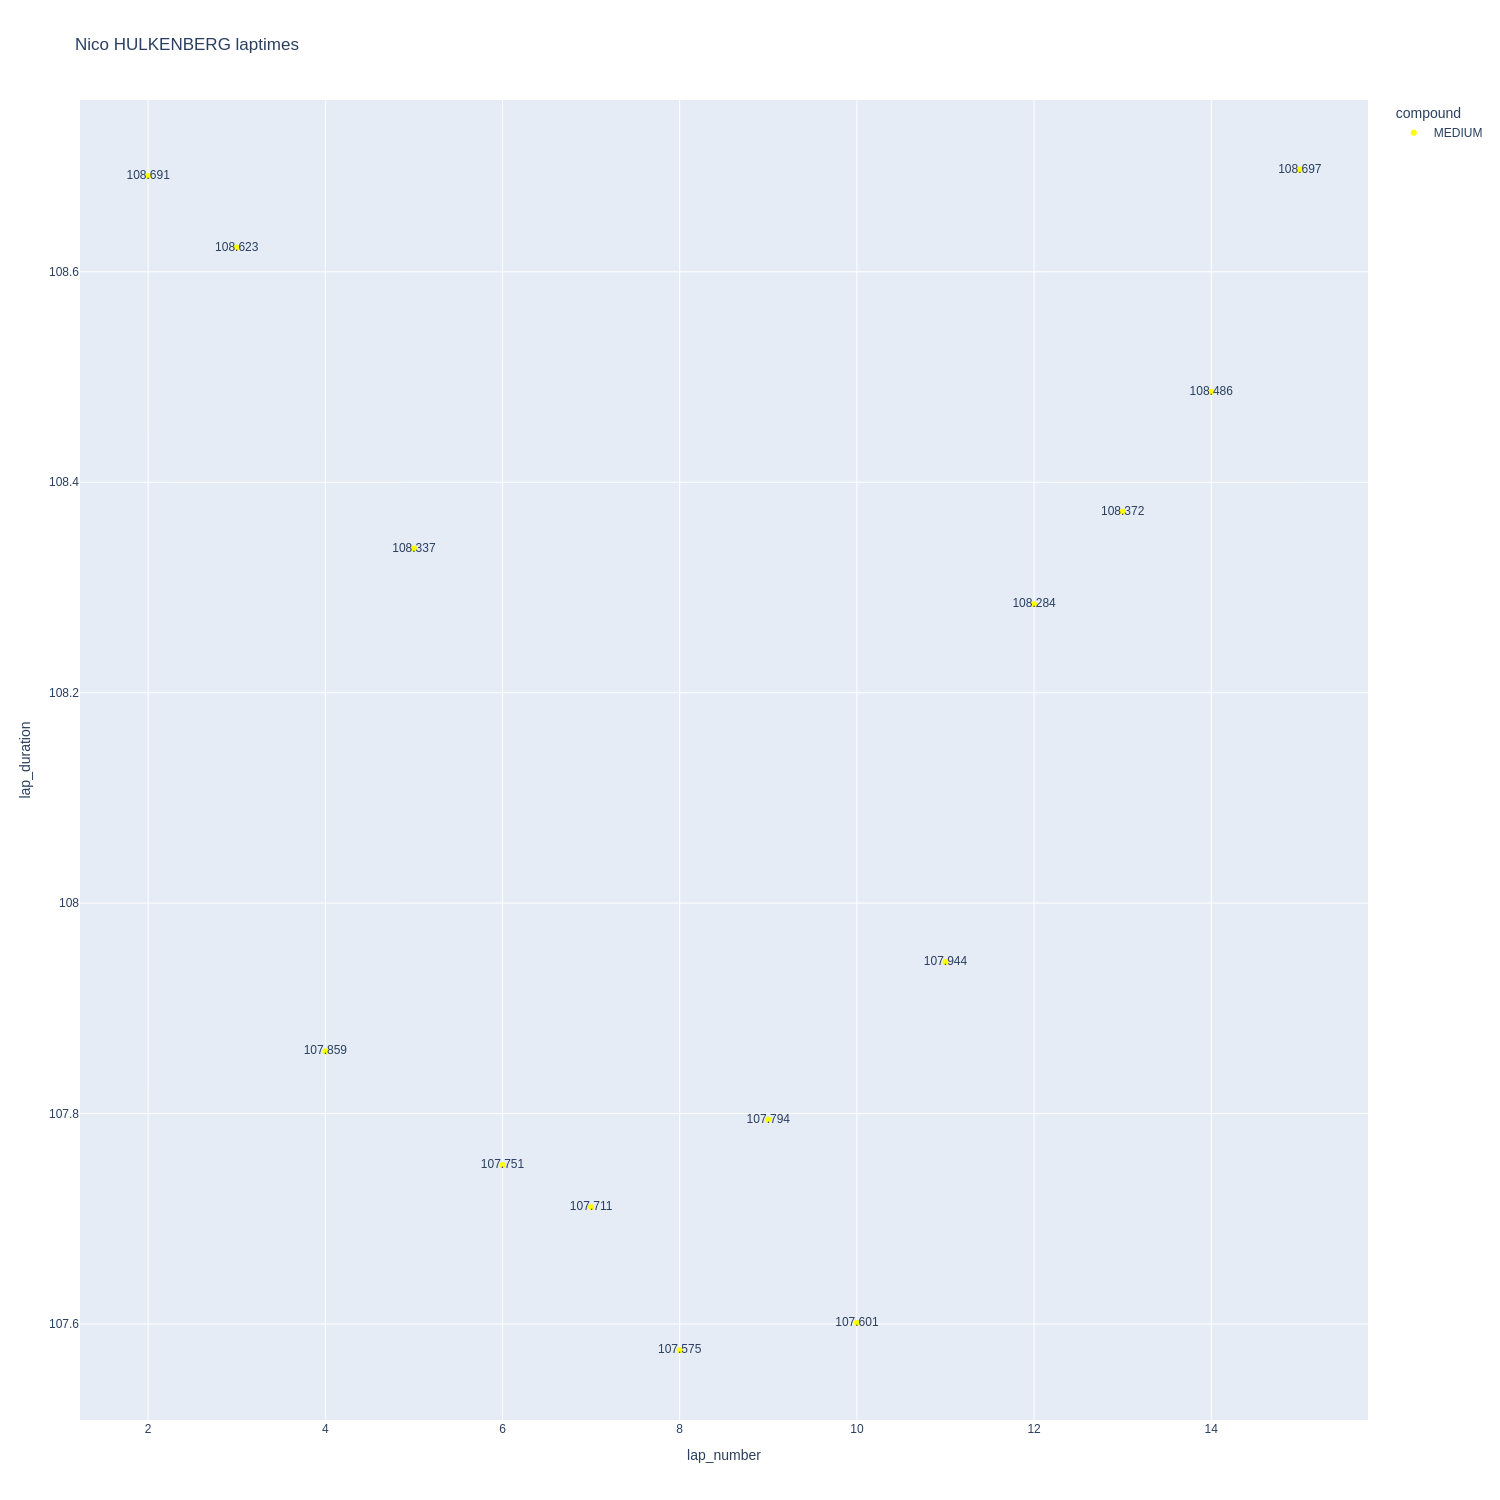

In [92]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

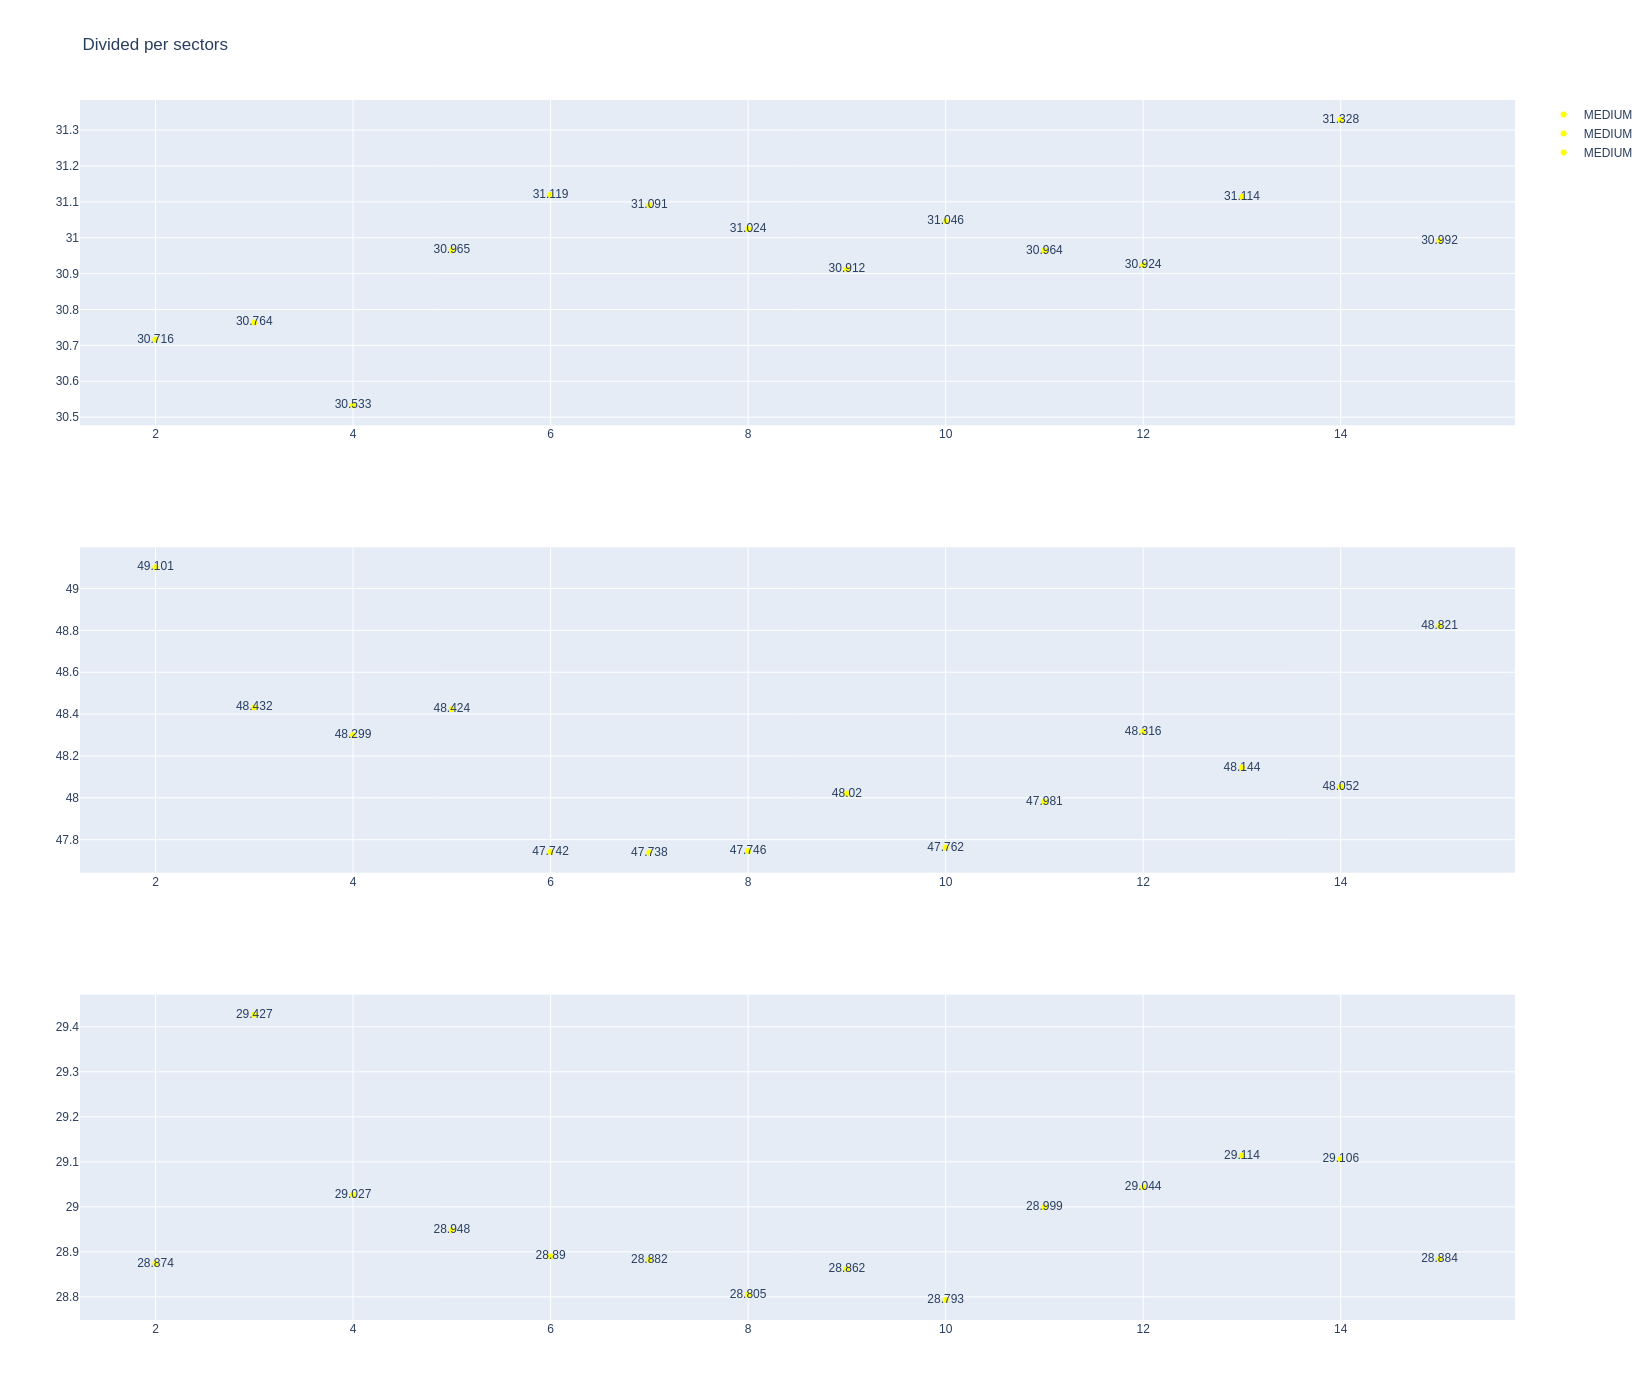

In [93]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [95]:
race_control = libraryDataF1.obtain_information('race_control',session_key=9935)

In [97]:
race_control.query('message.str.contains("DELETED")')

meeting_key  session_key                       date driver_number  \
9          1265         9935  2025-07-26T14:17:37+00:00          None   
12         1265         9935  2025-07-26T14:20:07+00:00          None   
16         1265         9935  2025-07-26T14:33:00+00:00          None   
26         1265         9935  2025-07-26T14:52:58+00:00          None   

   lap_number category  flag scope  sector  \
9        None    Other  None  None     NaN   
12       None    Other  None  None     NaN   
16       None    Other  None  None     NaN   
26       None    Other  None  None     NaN   

                                              message  
9   CAR 44 (HAM) TIME 4:36.382 DELETED - TRACK LIM...  
12  CAR 44 (HAM) TIME 1:41.664 DELETED - TRACK LIM...  
16  CAR 87 (BEA) LAP DELETED - TRACK LIMITS AT TUR...  
26  CAR 5 (BOR) TIME 1:42.955 DELETED - TRACK LIMI...

In [96]:
qualy_session = list(race_control.query('message.str.contains("GREEN")').date.str.split())
qualy_session

[['2025-07-26T14:00:00+00:00'],
 ['2025-07-26T14:25:00+00:00'],
 ['2025-07-26T14:48:00+00:00']]

### Obtain setup

In [98]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9935)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9935)
drivers = libraryDataF1.obtain_information('drivers',session_key=9935)
libraryDataF1.obtain_drivers_colours(drivers)

In [99]:
session = ff1.get_session(2025, 13, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

req         WARNING 	DEFAULT CACHE ENABLED! (4.54 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status d

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [100]:
laptimes_deleted = [101.664,102.955]
driver_number_lap_deleted = [44,5]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [101]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

Due to changing climate conditions, I will not apply the 107% rule to filter those laps that are within. So, I will choose the fastest laps of the last classified. Zhou was the slowest and the slowest of his fast attemps will be the threshold to filter those valid laps. The new threshold will be 1.57.775(117.775)

In [102]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 107.60")

In [103]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.
Aston changed the setup due to the rain and it did not work. Hamilton was knocked out in Q1 due to his fastest lap was deleted and Gasly passed thanks to his S1 time. Sainz had a problem in the sector 2 of Q2 being 2 tenths slower than Albon

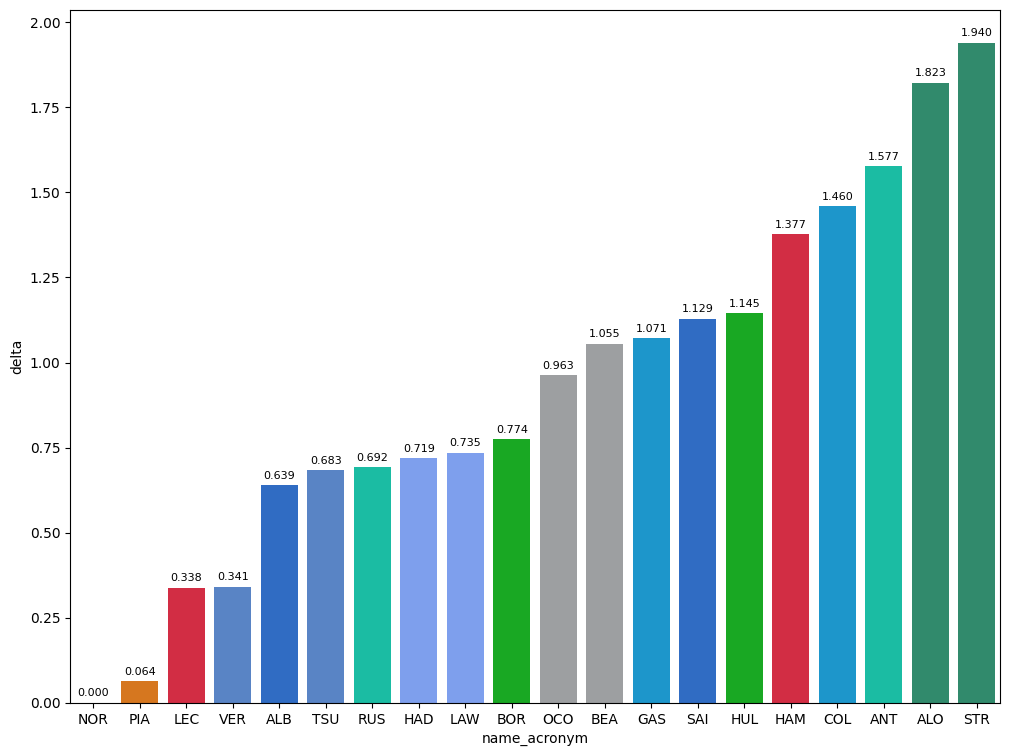

In [104]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap
AM configuration did not help them and drivers than OCO, RUS or both Alpime did not help them. Trusting in S2 as McLaren and Racing Bulls was the right election.

#### Maximum speed per drivers

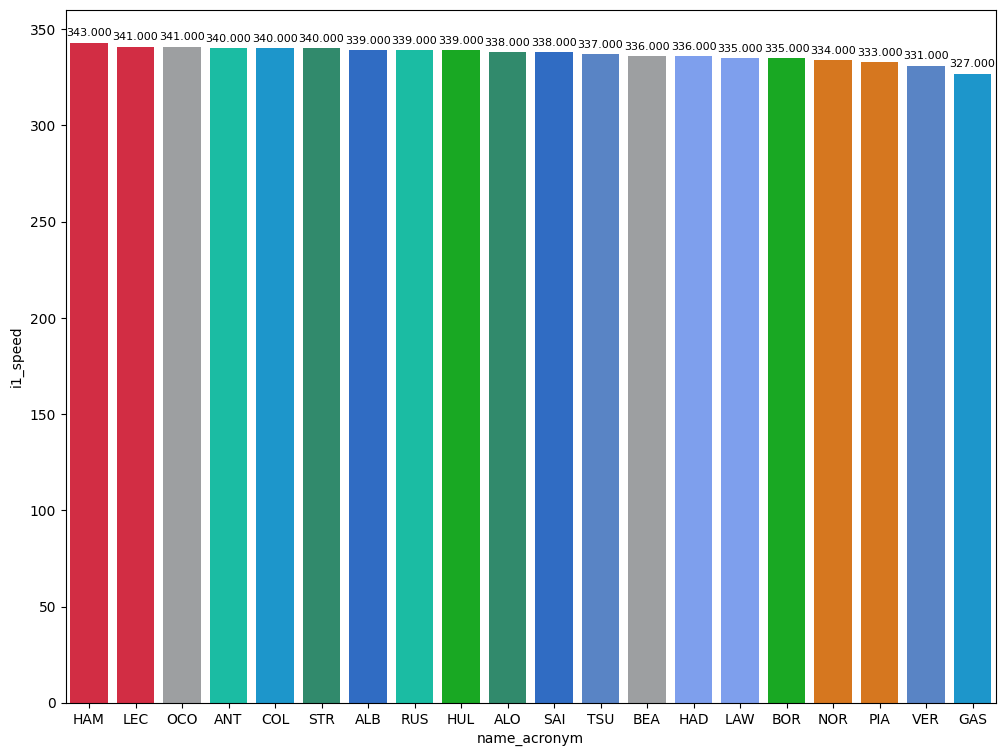

In [105]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

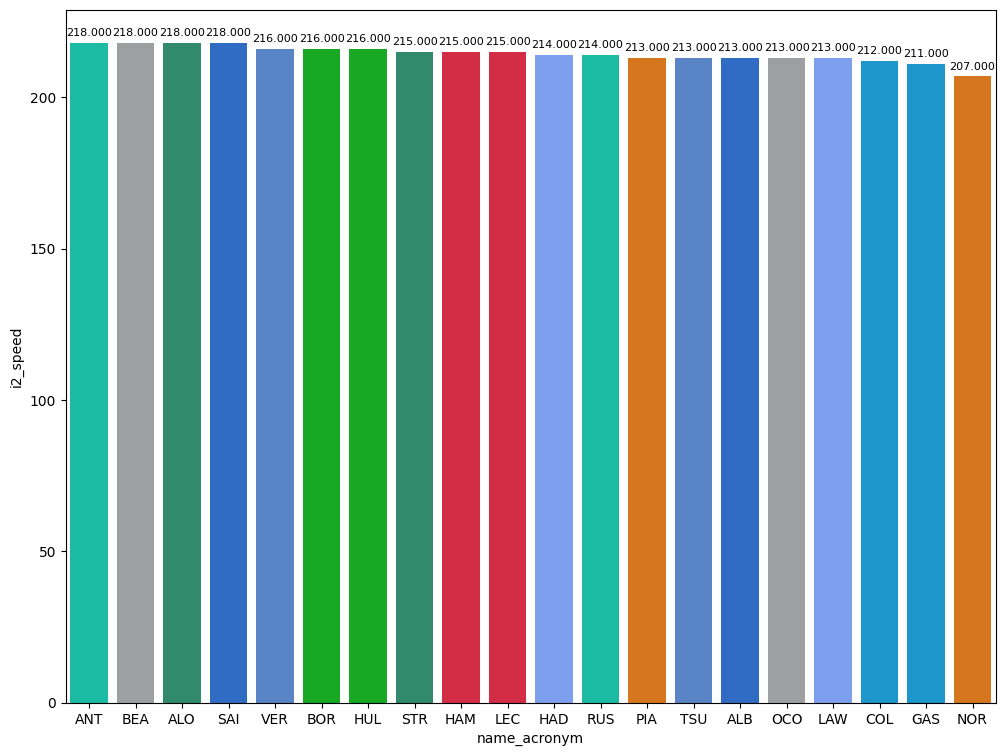

In [106]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

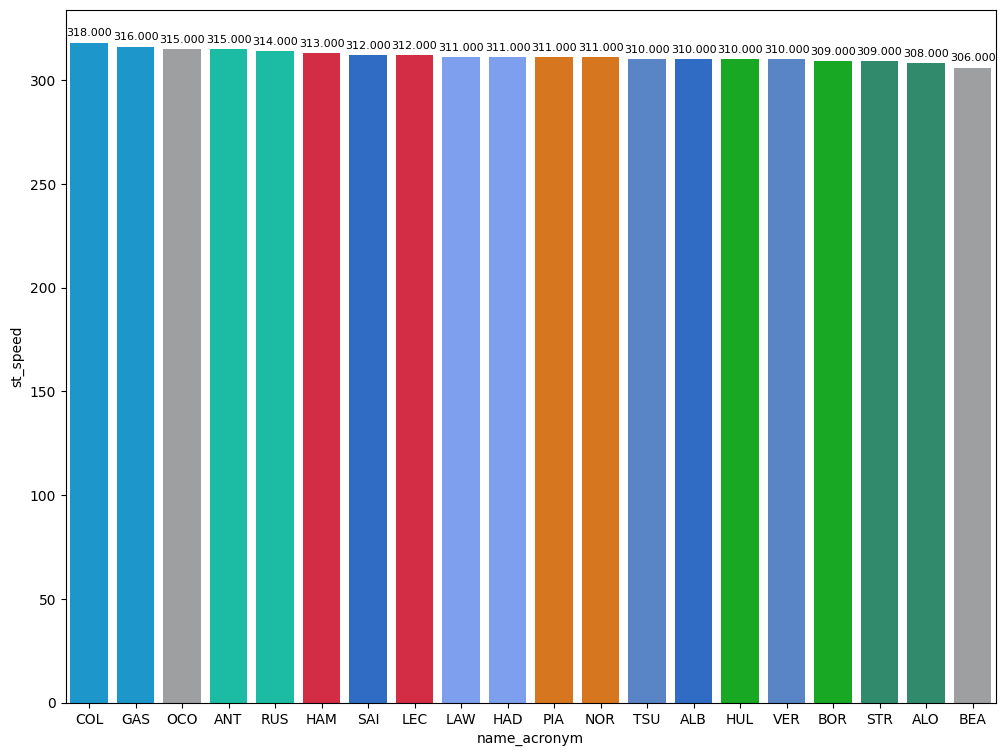

In [107]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

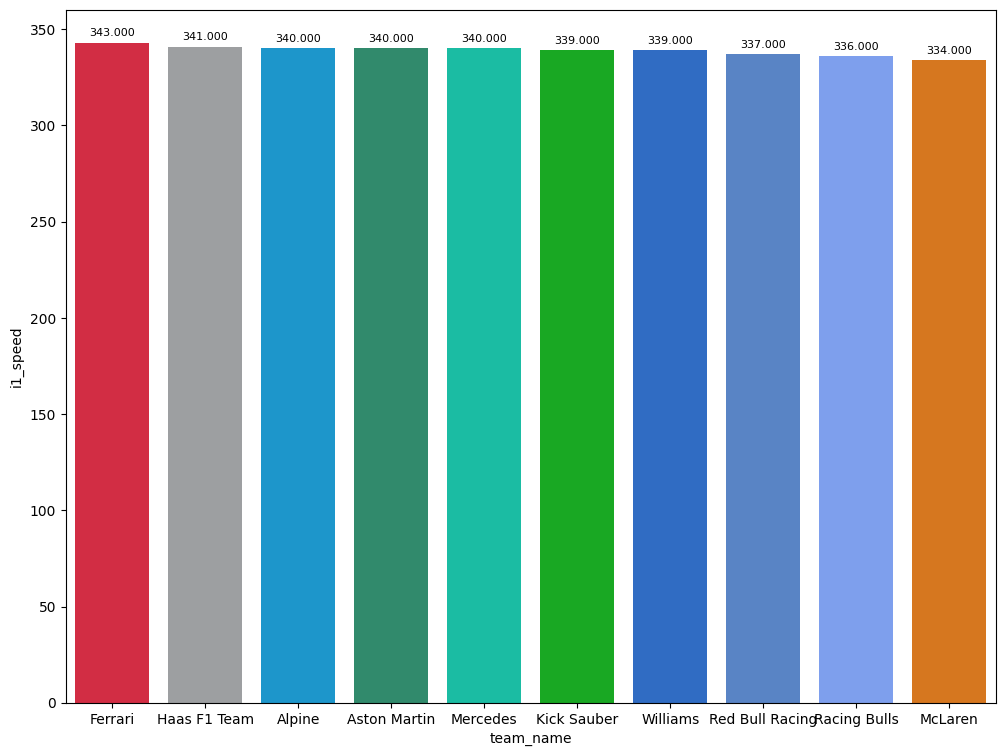

In [108]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

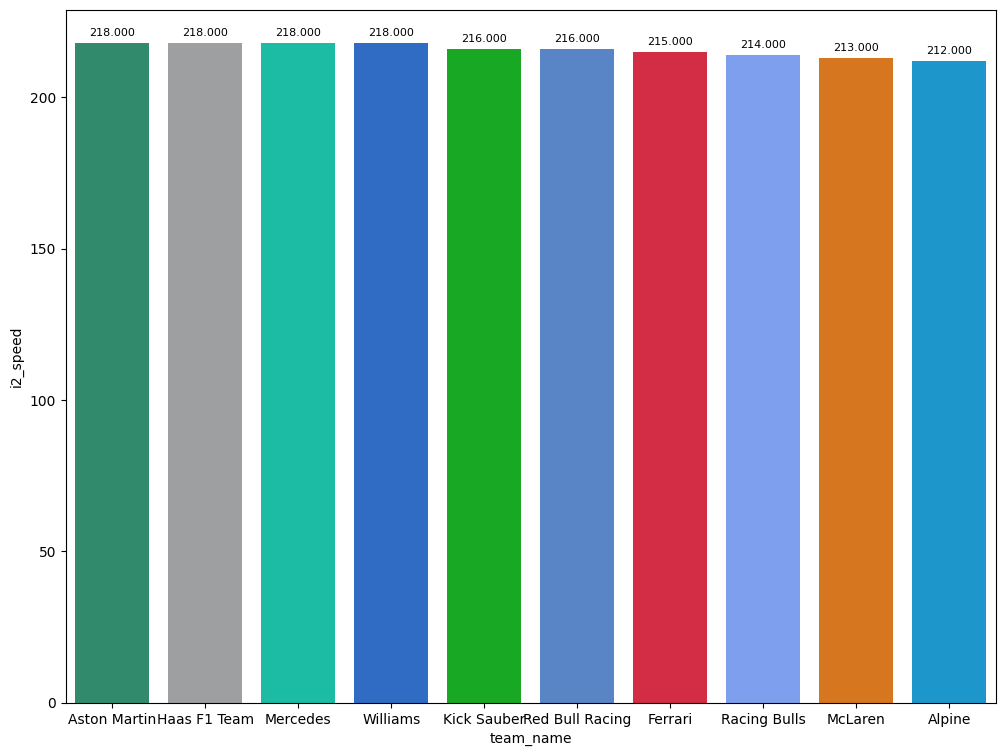

In [109]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

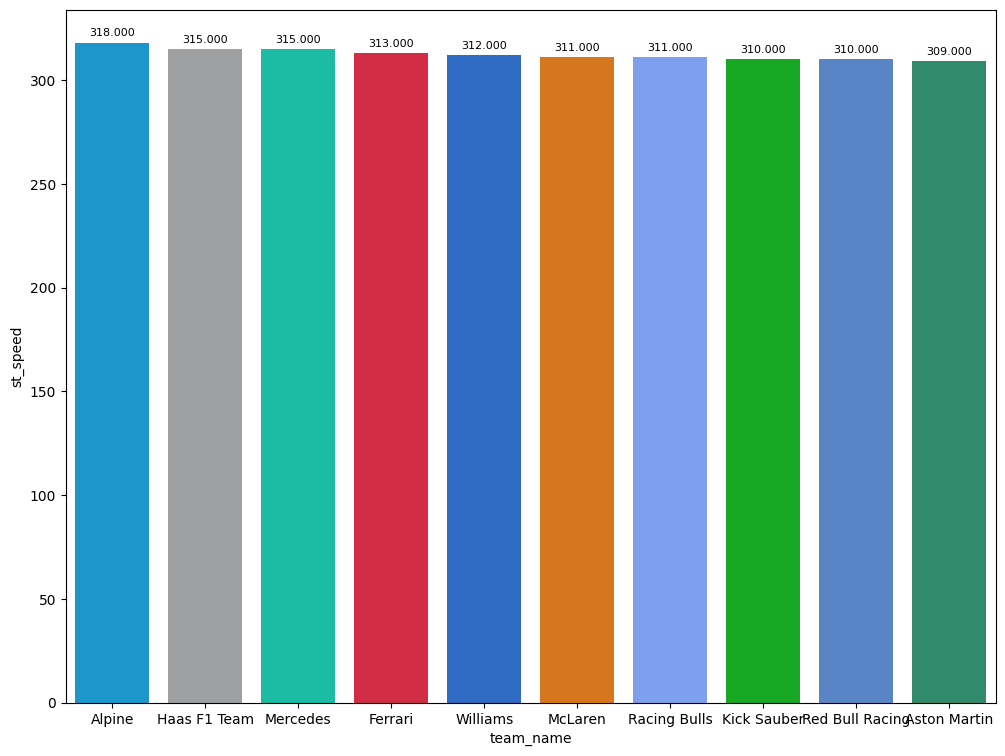

In [110]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [113]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [115]:
maximumDateQ1 = "date_start <'2025-07-26T14:25:00+00:00'"
maximumDateQ2 = "date_start <'2025-07-26T14:48:00+00:00' and date_start >'2025-07-26T14:25:00+00:00'"
maximumDateQ3 = "date_start >'2025-07-26T14:48:00+00:00'"

### Qualyfing 1


In [116]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
Bortoleto passed to Q2 thanks to his second sector where he was the 7th fastest. In sector 1, only PIA and VER were slower than BOR and in sector 3 was the 16th fastest, due to the setup.

In [117]:
#Reference
P15 = q1Data[14:15]

In [118]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Gabriel BORTOLETO Sector 1:  30.245 Sector 2:  43.479 Sector 3:  28.184


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [120]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             44         0.031               -0.271                0.329   
1             43         0.114               -0.238                0.570   
2             12         0.231               -0.189                0.721   
3             14         0.477               -0.060                0.528   
4             18         0.594               -0.023                0.569   

   difference_sector_3 name_acronym  
0               -0.027          HAM  
1               -0.218          COL  
2               -0.301          ANT  
3                0.009          ALO  
4                0.048          STR

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

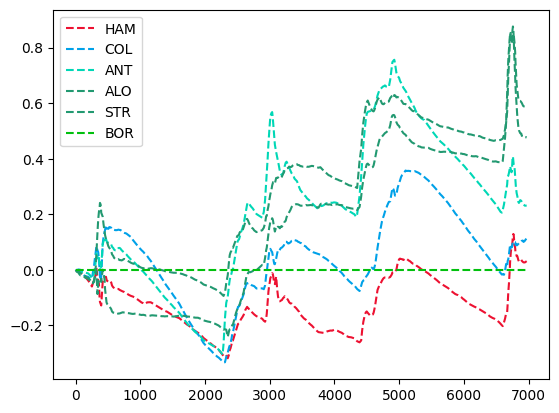

In [121]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [122]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0               4        -0.898               -0.022               -0.571   
1              81        -0.707                0.070               -0.594   
2               1        -0.574                0.005               -0.388   
3               6        -0.336               -0.147               -0.058   
4              87        -0.291               -0.098               -0.307   
5              16        -0.273               -0.244                0.068   
6              55        -0.217               -0.088                0.000   
7              30        -0.160               -0.075                0.040   
8              23        -0.136               -0.096                0.105   
9              63        -0.124               -0.302                0.452   
10             10        -0.108               -0.324                0.428   
11             22        -0.068               -0.092                0.051   
12             27        -0.064               -0.173                0.009   
13             31        -0.024               -0.263                0.389   

    difference_sector_3 name_acronym  
0                -0.305          NOR  
1                -0.183          PIA  
2                -0.191          VER  
3                -0.131          HAD  
4                 0.114          BEA  
5                -0.097          LEC  
6                -0.129          SAI  
7                -0.125          LAW  
8                -0.145          ALB  
9                -0.274          RUS  
10               -0.212          GAS  
11               -0.027          TSU  
12                0.100          HUL  
13               -0.150          OCO

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
Albon was able to pass Hulkenberg, but, unfortunately, his second sector was bad.

In [123]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0               4        -0.898               -0.022               -0.571   
1              81        -0.707                0.070               -0.594   
2               1        -0.574                0.005               -0.388   
3               6        -0.336               -0.147               -0.058   
4              87        -0.291               -0.098               -0.307   
5              16        -0.273               -0.244                0.068   
6              55        -0.217               -0.088                0.000   
7              30        -0.160               -0.075                0.040   
8              23        -0.136               -0.096                0.105   
9              63        -0.124               -0.302                0.452   
10             10        -0.108               -0.324                0.428   
11             22        -0.068               -0.092                0.051   
12             27        -0.064               -0.173                0.009   
13             31        -0.024               -0.263                0.389   

    difference_sector_3 name_acronym  
0                -0.305          NOR  
1                -0.183          PIA  
2                -0.191          VER  
3                -0.131          HAD  
4                 0.114          BEA  
5                -0.097          LEC  
6                -0.129          SAI  
7                -0.125          LAW  
8                -0.145          ALB  
9                -0.274          RUS  
10               -0.212          GAS  
11               -0.027          TSU  
12                0.100          HUL  
13               -0.150          OCO

#### Best sector per driver
In this section we can see the best sector of the session

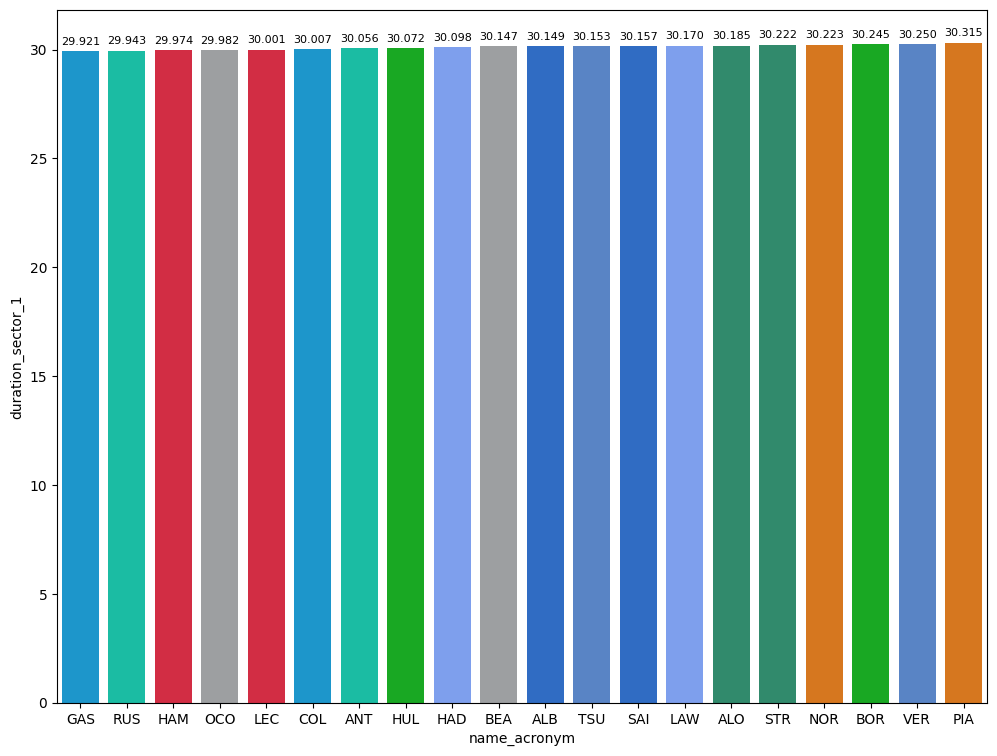

In [124]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

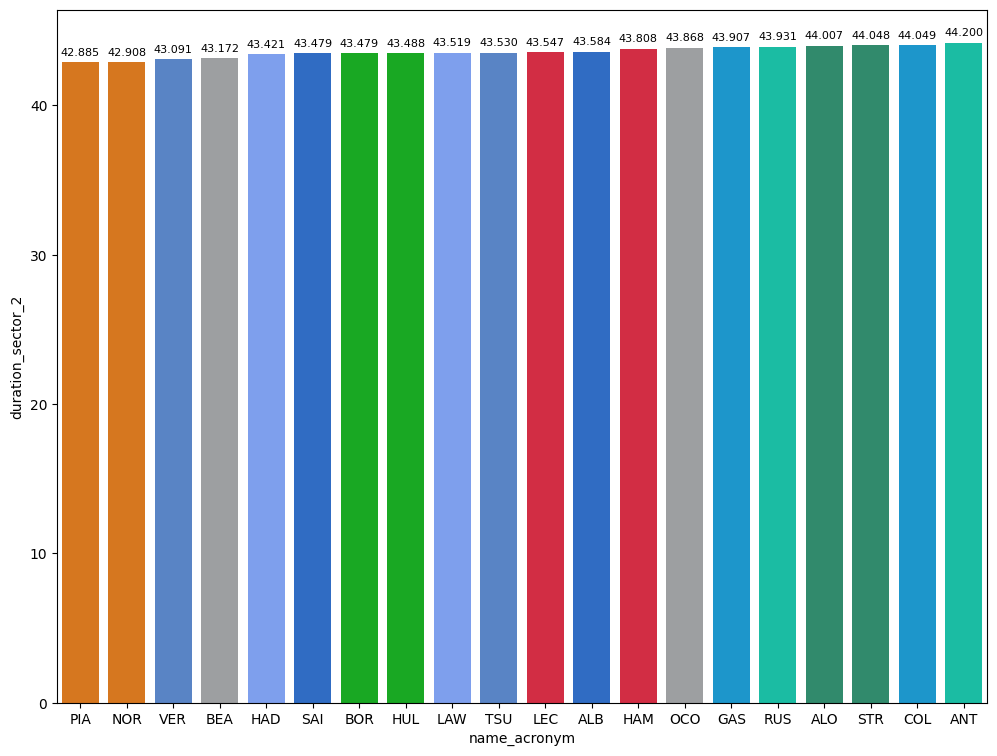

In [125]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

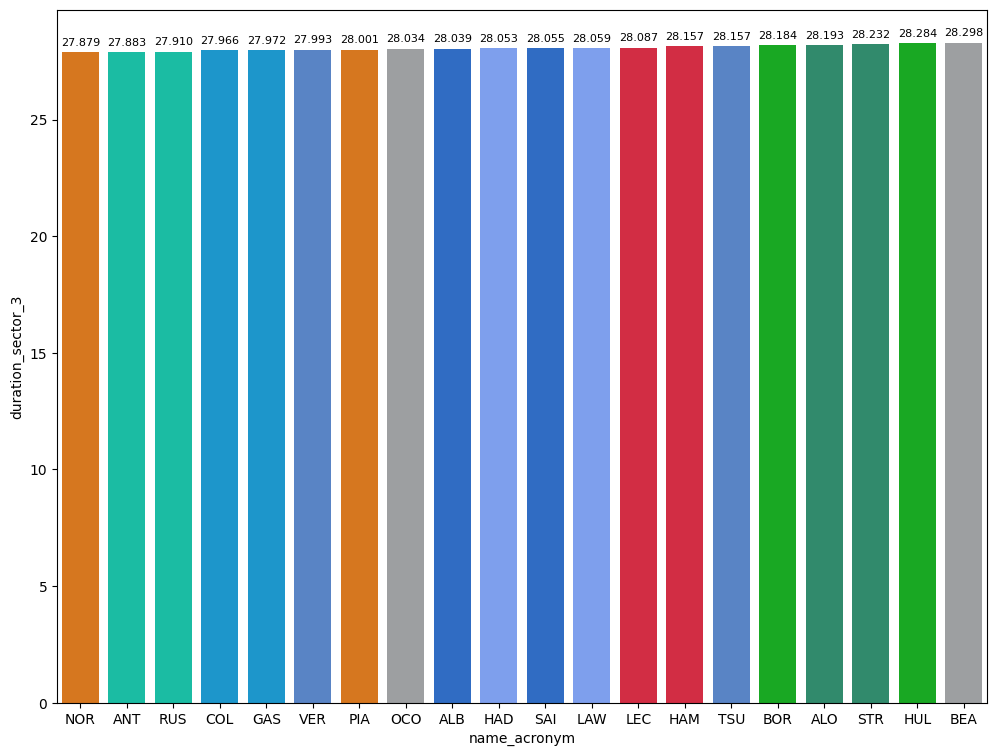

In [126]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2


In [127]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [128]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Alexander ALBON Sector 1:  30.17 Sector 2:  43.326 Sector 3:  28.009


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
ALB used a balanced configuration being 10th fastest in overall. OCO lost the 10th position for the second sector so betting for S2 was crucial

In [129]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             31         0.020               -0.342                0.423   
1             87         0.112                0.286               -0.447   
2             10         0.128               -0.161                0.293   
3             27         0.202               -0.006                0.081   
4             55         0.253               -0.048                0.230   

   difference_sector_3 name_acronym  
0               -0.061          OCO  
1                0.273          BEA  
2               -0.004          GAS  
3                0.127          HUL  
4                0.071          SAI

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

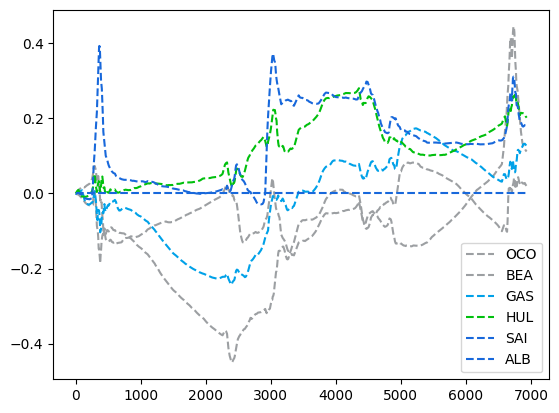

In [130]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk

In [131]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             81        -0.879               -0.036               -0.703   
1              4        -0.790               -0.051               -0.716   
2              1        -0.554               -0.007               -0.528   
3             16        -0.421               -0.157               -0.202   
4             22        -0.260               -0.083               -0.245   
5             63        -0.251               -0.271                0.159   
6              6        -0.224               -0.052               -0.154   
7             30        -0.208               -0.200                0.023   
8              5        -0.169               -0.087               -0.059   

   difference_sector_3 name_acronym  
0               -0.140          PIA  
1               -0.023          NOR  
2               -0.019          VER  
3               -0.062          LEC  
4                0.068          TSU  
5               -0.139          RUS  
6               -0.018          HAD  
7               -0.031          LAW  
8               -0.023          BOR

#### Best sector per driver
In this section we can see the best sector of the session

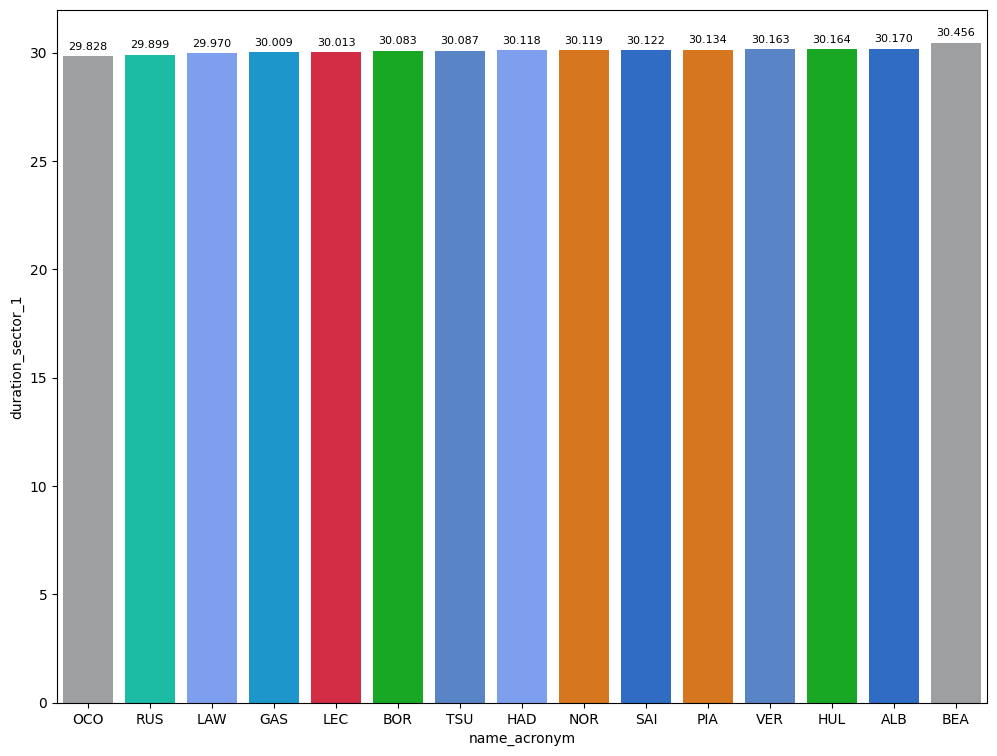

In [132]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

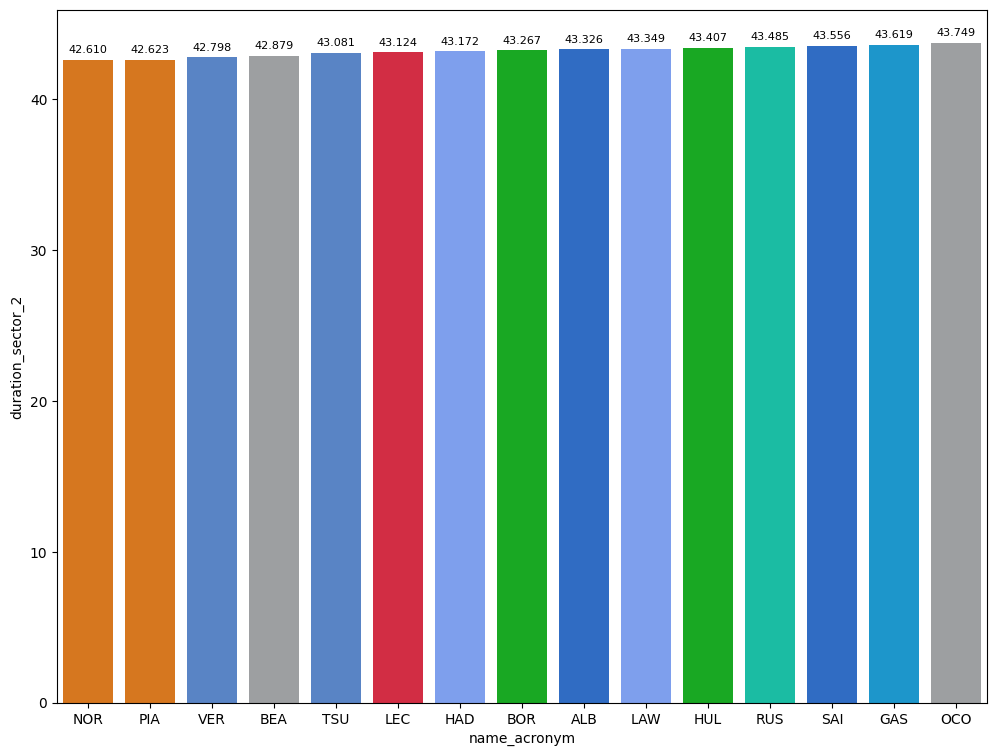

In [133]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

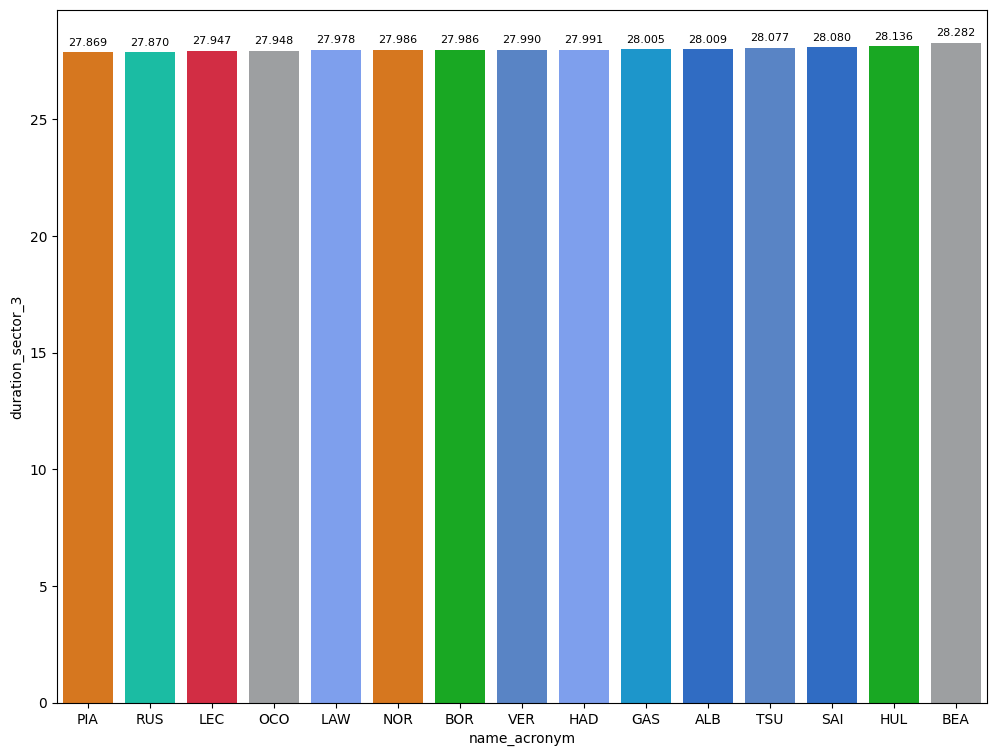

In [134]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [135]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [136]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Lando NORRIS Sector 1:  30.005 Sector 2:  42.579 Sector 3:  27.978


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
S2 was crucial and McLaren dominance in this sector was crucial for Pole

In [137]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             81         0.085               -0.022                0.062   
1             16         0.338               -0.186                0.470   
2              1         0.341                0.187                0.206   
3             23         0.639               -0.147                0.647   
4             63         0.698               -0.244                1.063   
5             22         0.722                0.014                0.606   
6              6         0.748                0.027                0.668   
7             30         0.766               -0.010                0.712   
8              5         1.825                0.046                1.524   

   difference_sector_3 name_acronym  
0                0.045          PIA  
1                0.054          LEC  
2               -0.052          VER  
3                0.139          ALB  
4               -0.121          RUS  
5                0.102          TSU  
6                0.053          HAD  
7                0.064          LAW  
8                0.255          BOR

#### Best sector per driver
In this section we can see the best sector of the session

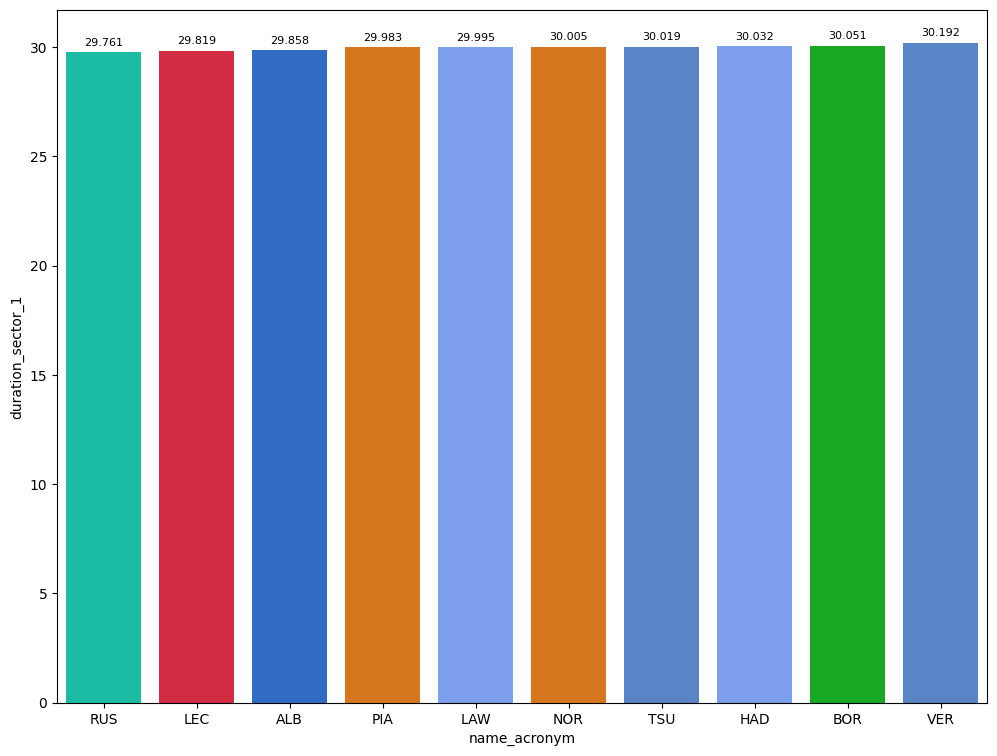

In [138]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

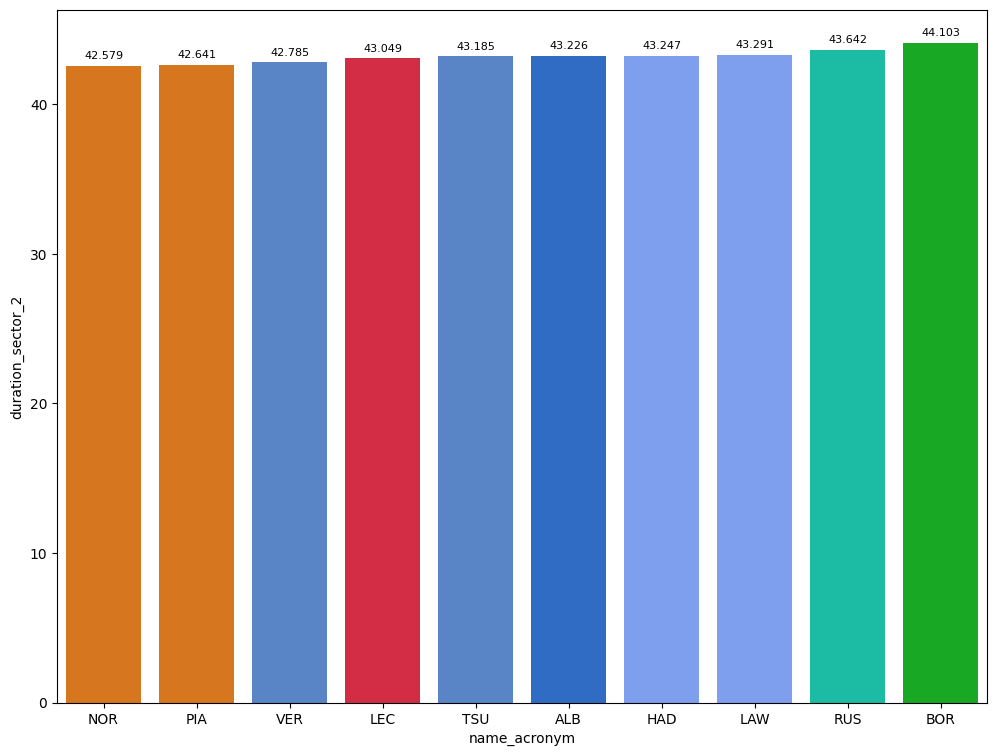

In [139]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

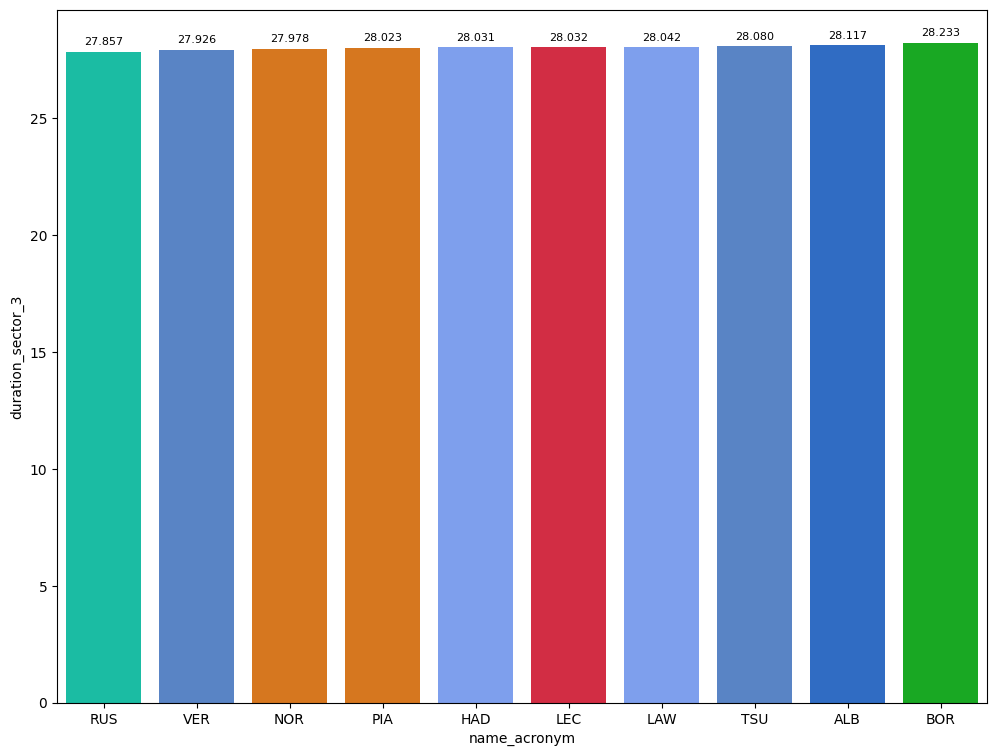

In [140]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

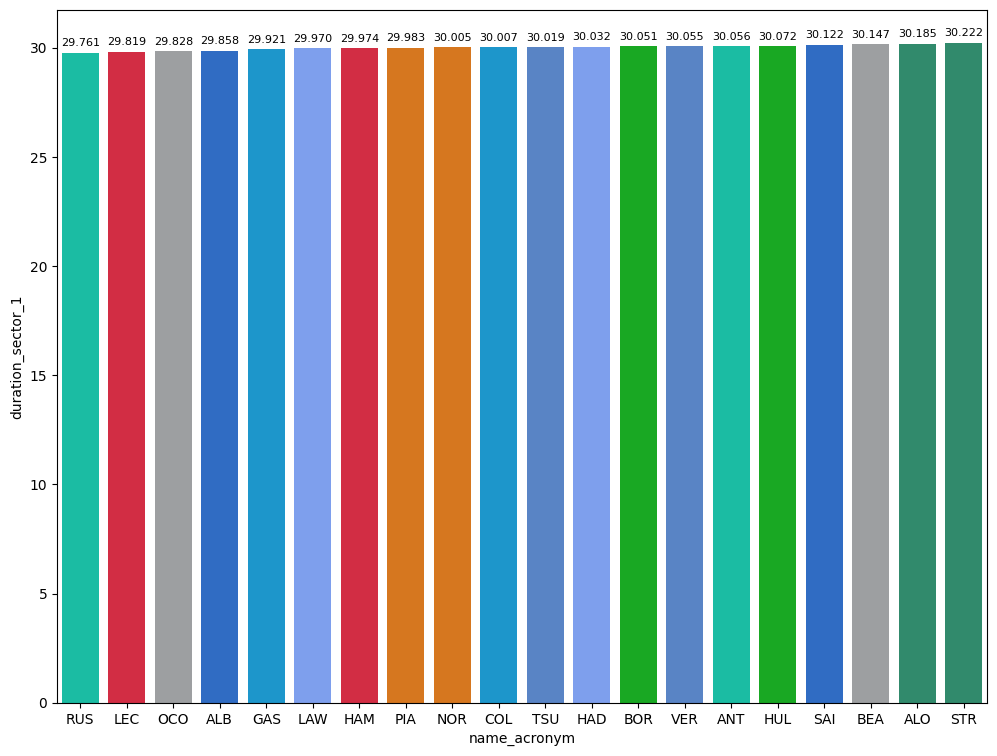

In [141]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

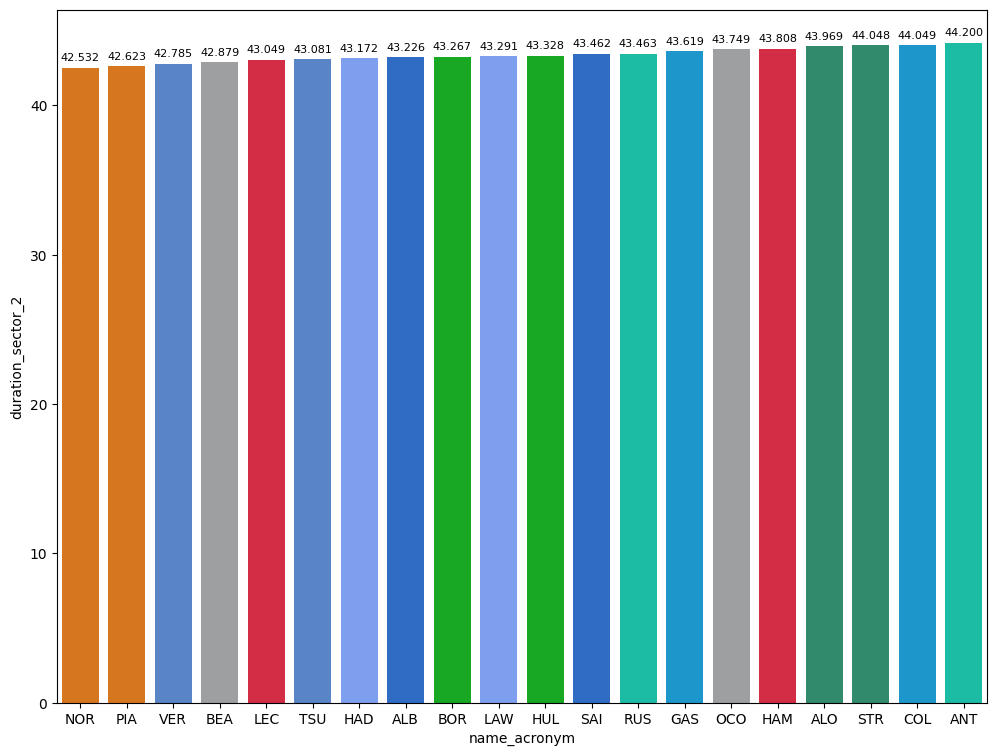

In [142]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

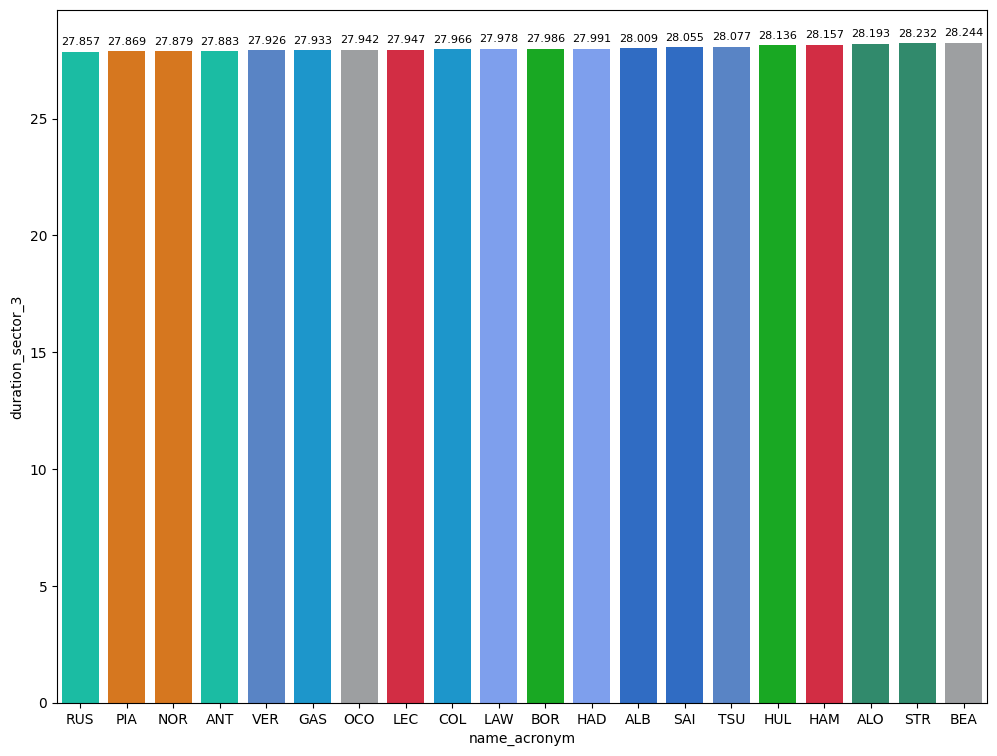

In [143]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

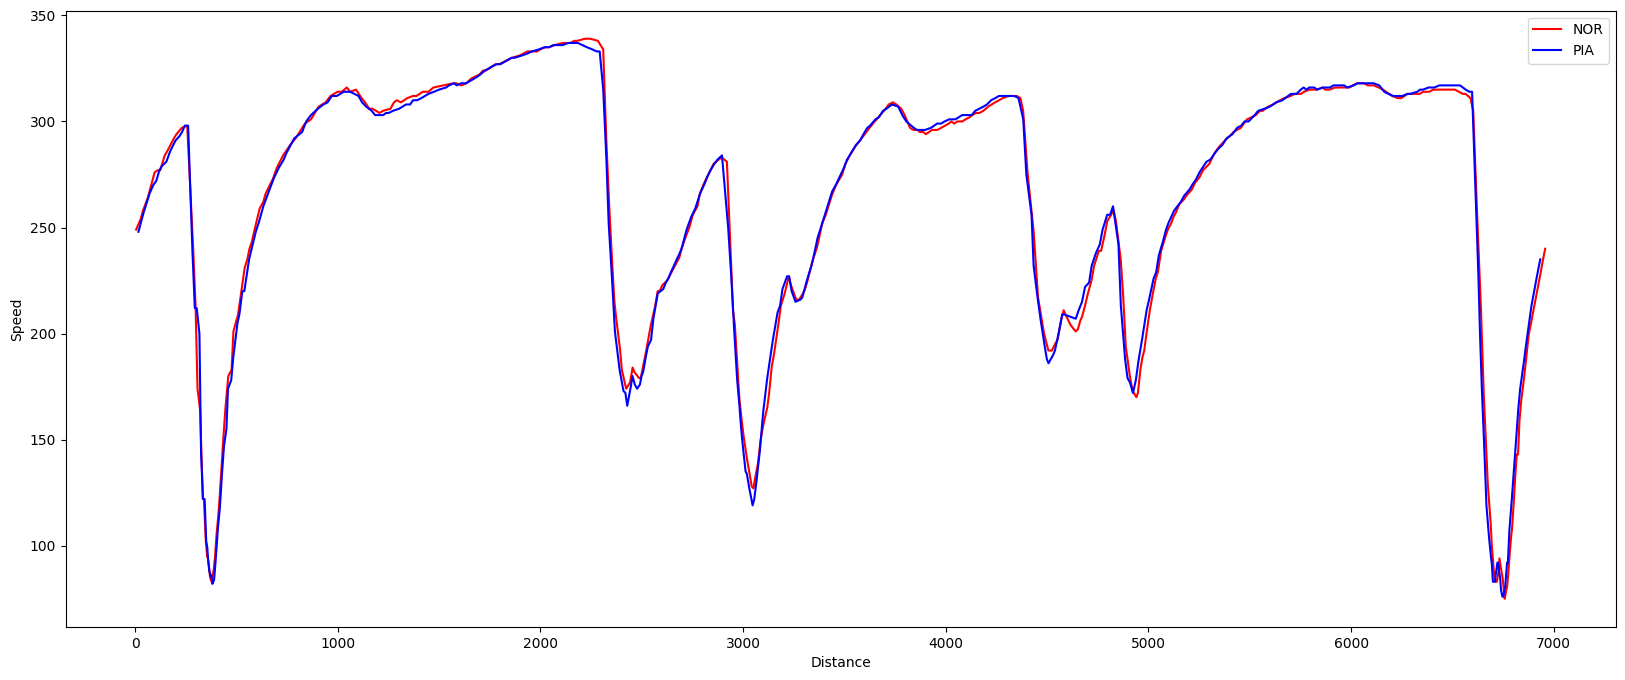

In [144]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

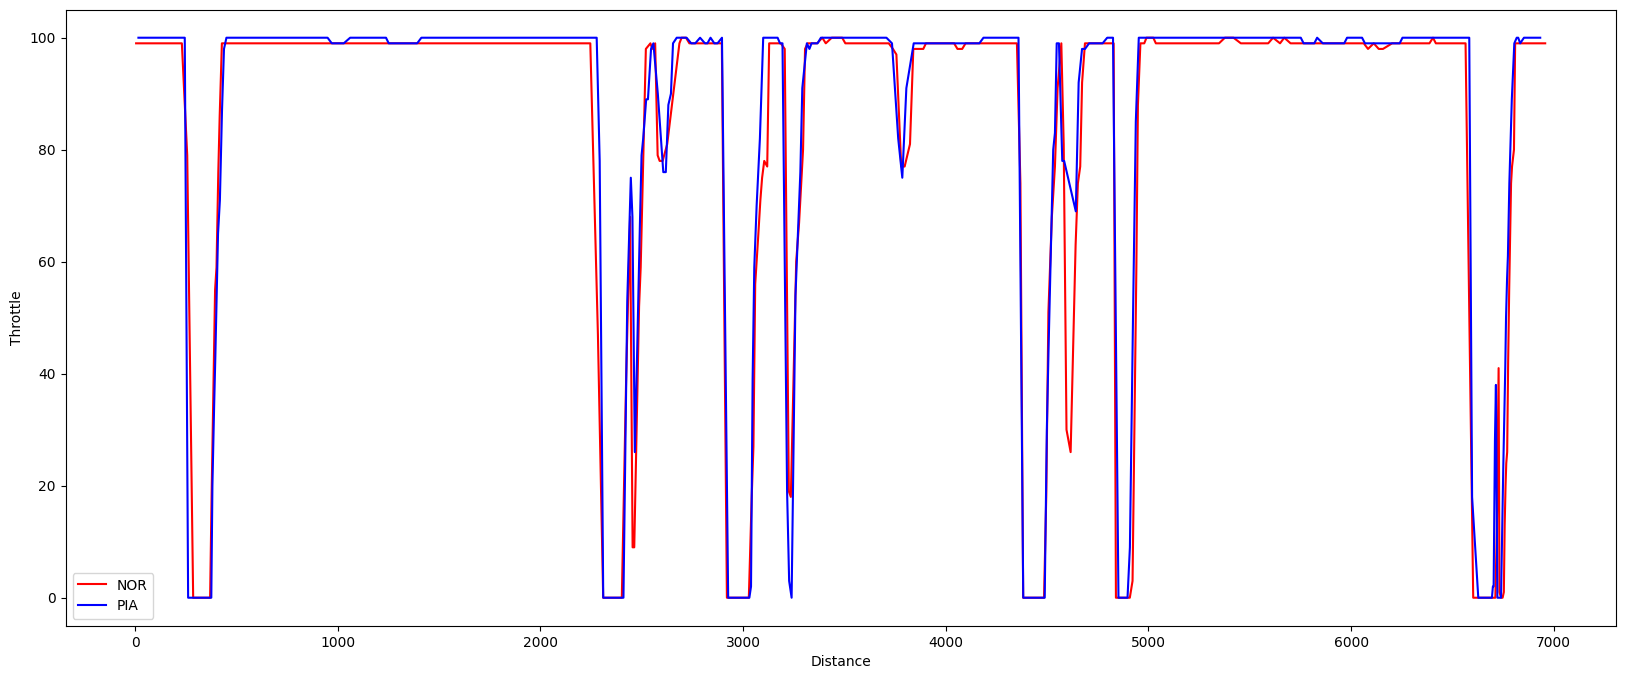

In [145]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

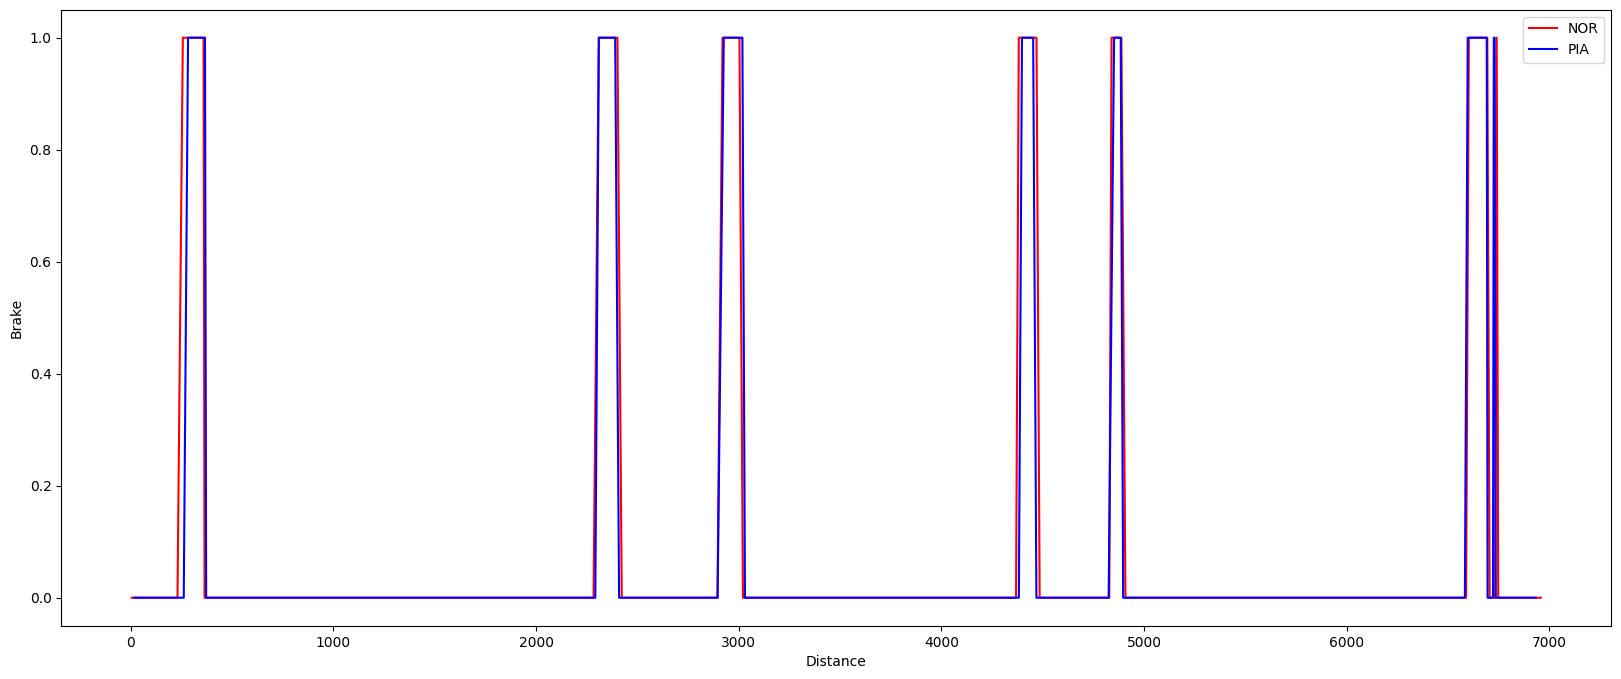

In [146]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

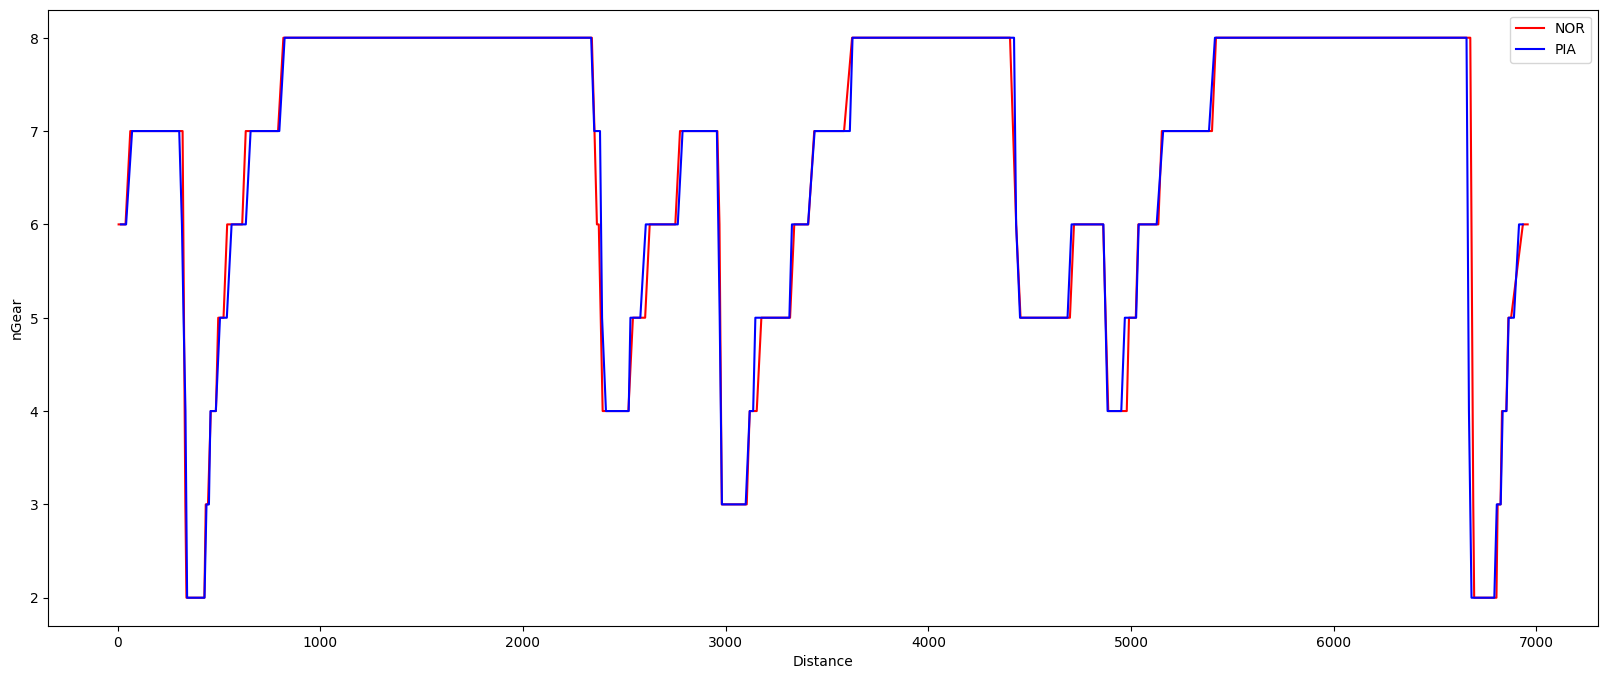

In [147]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9574)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9574)
drivers = libraryDataF1.obtain_information('drivers',session_key=9574)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >94 and lap_duration <=112.5").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 94
MAXIMUM_SECONDS = 112.5

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9574)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration